## Datasets & Params¶


In [1]:
# Choose alpha value between 0-1
# ALPHA = 1.0

# Choose Dataset

# Experiment 1
# DATASET_NAME ='COMPAS_RACE_AM'

# Experiment 2
#DATASET_NAME = 'COMPAS_SEX'

# Experiment 3
# DATASET_NAME = 'ADULT_RACE'

# Experiment 4
DATASET_NAME = 'ADULT_SEX'

# Experiment 5
# DATASET_NAME='CREDIT_SEX'

# Experiment 6
# DATASET_NAME = 'BANK_AGE'

# Experiment 7
#DATASET_NAME = 'RECRUIT_AGE'

# Experiment 8
#DATASET_NAME = 'RECRUIT_SEX'

# Experiment 9
#DATASET_NAME = 'DIABETES_SEX'

# Experiment 9
# DATASET_NAME = 'NURSERY'

# Experiment 9
# DATASET_NAME = 'DEFAULT_CREDIT'

In [2]:
# upload kaggle.json file using user prompt
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving adult.csv to adult.csv
User uploaded file "adult.csv" with length 4104734 bytes


## Imports

In [3]:
! pip install ctgan
! pip install --upgrade category_encoders

from sklearn.preprocessing import MinMaxScaler

import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import category_encoders as ce
import math
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score, confusion_matrix
import os
from statistics import mean
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedGroupKFold
from datetime import datetime
import pprint
import json



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

## Fairness metrics and functions


In [4]:
def print_metrics(y_gt, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_gt, y_pred).ravel()
    print('conf matrix:\n ', confusion_matrix(y_gt, y_pred) ,
          '\naccuracy: ', (tp+tn)/(tp+tn+fn+fp),
          'precision: ', tp/(tp+fp),
          'recall: ', tp/(tp+fn),
          'fpr: ', fp/(fp+tn),
          'tpr: ', tp /(tp + fn),
          'fn+fp', fn+fp)
    #returm fpr, tpr, accuracy
    return fp/(fp+tn), tp /(tp + fn), (tp+tn)/(tp+tn+fn+fp)

# bias metric - equal opportunity difference
def opportunity_diff_tpr(tpr1, tpr2):
    return abs(tpr1-tpr2)

# bias metric - equal opportunity difference
def opportunity_diff_fpr(fpr1, fpr2):
    return abs(fpr1-fpr2)

# bias metric - avarage absolute odds difference
def odds_diff(tpr1, tpr2, fpr1, fpr2):
    return 0.5*(abs(tpr2-tpr1) + abs(fpr2-fpr1))

# bias metric - statistical parity difference
def parity_diff(y_pred_0, y_pred_1):
    return abs(len(y_pred_0)/(len(y_pred_0)+len(y_pred_1)) - len(y_pred_1)/(len(y_pred_1)+len(y_pred_0)))


    # bias metric - Disparate impact
def disparate_impact(y_pred_0, y_pred_1):
    return 1
    #return min((len(y_pred_0)/len(y_pred_0+y_pred_1)) / (len(y_pred_1)/len(y_pred_1+len(y_pred_0)))
    #,(len(y_pred_1)/len(y_pred_0+y_pred_1)) / (len(y_pred_0)/len(y_pred_1+len(y_pred_0))))

def fairness_metrics_roc_auc_std(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)
    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_str, op_str, op_f_str ,od_str,par_dif_str , dis_imp_str

In [5]:
# calculate the bias of divided dataset by the privileged feature
def calc_bias(data,y, priv_feature,y_pred, experiment_text):
    data_full =  pd.concat([data, y], axis=1)
    data_full['y_pred'] = y_pred

    label = TARGET_COL
    # print('performance for whole ds:'+ experiment_text)
    fpr, tpr, acc = print_metrics(data_full[TARGET_COL], data_full['y_pred'] )

    feature_cat_list = list(data[priv_feature].unique())
    #print(feature_cat_list)
    valid_cat0 = data_full[data_full[priv_feature]==feature_cat_list[0]]
    valid_cat1 = data_full[data_full[priv_feature]==feature_cat_list[1]]
    # print('performance for 0 sub-group:')
    fpr_0, tpr_0 , acc_0 = print_metrics(valid_cat0[TARGET_COL], valid_cat0['y_pred'])
    # print('performance for 1 sub-group:')

    fpr_1, tpr_1, acc_1 = print_metrics(valid_cat1[TARGET_COL], valid_cat1['y_pred'])
    op_diff = opportunity_diff_tpr(tpr_0, tpr_1)
    op_diff_fpr = opportunity_diff_fpr(fpr_0, fpr_1)
    od_diff = odds_diff(tpr_0, tpr_1, fpr_0, fpr_1)
    par_diff = parity_diff(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    dis_impact = disparate_impact(valid_cat0[valid_cat0['y_pred']==1], valid_cat1[valid_cat1['y_pred']==1])
    # print('bias metrics:')
    # print('equal opportunity for tpr: (close to 0)', op_diff)
    # print('equal opportunity for fpr: (close to 0)', op_diff_fpr)
    # print('avarage absolute odds difference: (close to 0)',od_diff)
    # print('statistical parity difference: (close to 0) ',par_diff)
    # print('disparate_impact: (close to 1) ',dis_impact)


    return (op_diff,op_diff_fpr, od_diff,par_diff ,dis_impact,acc)

In [6]:
def fairness_metrics_roc_auc(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    std_op = np.std(op_list)
    op_str = f"{mean(op_list):.3f} ± {std_op:.3f}"

    std_op_f = np.std(op_f_list)
    op_f_str = f"{mean(op_f_list):.3f} ± {std_op_f:.3f}"

    std_od = np.std(od_list)
    od_str = f"{mean(od_list):.3f} ± {std_od:.3f}"

    std_par_dif = np.std(par_dif_list)
    par_dif_str = f"{mean(par_dif_list):.3f} ± {std_par_dif:.3f}"

    std_dis_impact = np.std(dis_impact_list)
    dis_imp_str = f"{mean(dis_impact_list):.3f} ± {std_dis_impact:.3f}"


    std_acc = np.std(acc_list)
    acc_str = f"{mean(acc_list):.3f} ± {std_acc:.3f}"
    time_elapsed_baseline = datetime.now() - start_time
    plot_roc_curve(fprs, tprs);
    pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])
    print('Accaracy list : ', acc_list)
    print('equal opportunity for tpr : ', op_list)
    print('equal opportunity for fpr : ',op_f_list)
    print('odds difference list : ' , od_list)
    print('The mean accuracy is ', acc_str)
    print('The mean equal opportunity for tpr: (close to 0)', op_str)
    print('The mean equal opportunity for fpr: (close to 0)', op_f_str)
    print('The mean odds difference: (close to 0)',od_str)
    print('The mean parity difference: (close to 0)', par_dif_str)
    print('The mean disperate impact: (close to 1)',dis_imp_str)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

In [7]:
def fairness_metrics_roc_auc_no_print(data , y):
    clf = RandomForestClassifier(n_estimators=10, max_depth=5,random_state=1234)

    cv = StratifiedKFold(n_splits=5, random_state=1234, shuffle=True)

    results = pd.DataFrame(columns=['training_score', 'test_score'])

    fprs, tprs, scores, op_list ,op_f_list, od_list ,par_dif_list,dis_impact_list, acc_list = [], [], [], [],[], [], [],[],[]

    start_time = datetime.now()
    for (train, test), i in zip(cv.split(data, y), range(5)):
        clf.fit(data.iloc[train], y.iloc[train])
        _, _, auc_score_train = compute_roc_auc(train,clf, data, y)
        fpr, tpr, auc_score = compute_roc_auc(test,clf, data, y)
        scores.append((auc_score_train, auc_score))
        fprs.append(fpr)
        tprs.append(tpr)
        y_pred = clf.predict(data.iloc[test])
        o_p, o_p_fpr, o_d ,par_dif, dis_impact, acc_ = calc_bias(data.iloc[test],  y.iloc[test], PRIV_FEATURE,y_pred, 'subexperiment - baseline Ensemble'+' model:'+str(i))
        acc_list.append(acc_)
        op_list.append(o_p)
        op_f_list.append(o_p_fpr)
        od_list.append(o_d)
        par_dif_list.append(par_dif)
        dis_impact_list.append(dis_impact)

    return acc_list, op_list, op_f_list ,od_list,par_dif_list , dis_impact_list

## Roc & AUC functions¶


In [8]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""

    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs, acc = [], []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))

    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index,clf ,data, y):
    y_predict = clf.predict_proba(data.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [9]:
if DATASET_NAME == 'ADULT_SEX':
    TARGET_COL = 'income'
    PRIV_FEATURE = "sex"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    privileged_groups = [{'sex': 1}] # Male
    unprivileged_groups = [{'sex': 0}] # Female

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']


elif DATASET_NAME == 'ADULT_RACE':
    TARGET_COL = 'income'
    PRIV_FEATURE = "black"
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 1
    orig_data = pd.read_csv('/content/adult.csv')
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == '<=50K' else 1)
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1,0)
    orig_data['black'] = np.where(orig_data['race'] == 'Black', 0,1)
    orig_data.replace('?',np.nan,inplace = True)
    orig_data.dropna(how='any',inplace = True)
    orig_data.drop_duplicates()
    orig_data.reset_index(inplace=True, drop=True)

    feature_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'black']

    CATEGORICAL = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'native.country']

elif DATASET_NAME =='COMPAS_RACE_AM':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'am'
#     PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']



elif DATASET_NAME =='COMPAS_SEX':
    orig_data = pd.read_csv('/content/compas-scores-two-years_v1.csv')
    orig_data = orig_data[((orig_data['days_b_screening_arrest'] <=30) &
      (orig_data['days_b_screening_arrest'] >= -30) &
      (orig_data['is_recid'] != -1) &
      (orig_data['c_charge_degree'] != 'O') &
      (orig_data['score_text'] != 'N/A')
     )]
    TARGET_COL = 'two_year_recid'
    orig_data['sex'] = np.where(orig_data['sex'] == 'Male', 1, 0)
    orig_data['am'] = np.where(orig_data['race'] == 'African-American', 1,0)
    PRIV_FEATURE = 'sex'
    PRIV_CLASS = 0
    PRIV_VALUE_FEATURE = 0
    feature_columns = ['age', 'c_charge_degree', 'race', 'age_cat', 'score_text', 'sex', 'priors_count',
               'days_b_screening_arrest', 'decile_score','am']
    CATEGORICAL = [ 'age_cat', 'race', 'c_charge_degree', 'score_text']


elif DATASET_NAME == 'CREDIT_SEX':
    orig_data = pd.read_csv('/content/german_credit_data.csv')
    TARGET_COL = 'Risk'
    PRIV_FEATURE = 'Sex'
    PRIV_CLASS = 1
    PRIV_VALUE_FEATURE = 0
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'bad' else 1)
    orig_data['Sex'] = np.where(orig_data['Sex'] == 'male', 0,1)
    orig_data = orig_data.drop(["Unnamed: 0"],axis=1)
    orig_data['young'] = orig_data['Age'].apply(lambda x: 0 if x < 25 else 1)
    CATEGORICAL = ['Housing', 'Saving accounts' , 'Checking account', 'Purpose']
    feature_columns = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Credit amount', 'Duration', 'Purpose']

elif DATASET_NAME =='BANK_AGE':
    orig_data = pd.read_csv('/content/bank.csv')
    TARGET_COL = 'deposit'
    orig_data[TARGET_COL] = orig_data[TARGET_COL].apply(lambda x: 0 if x == 'no' else 1)

    orig_data['age_cat'] = np.where(((pd.to_numeric(orig_data['age']) > 65) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)
    PRIV_FEATURE = 'age_cat'
    PRIV_VALUE_FEATURE = 0
    PRIV_CLASS = 1
    feature_columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'age_cat',
       'previous', 'poutcome']
    CATEGORICAL = [ 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

elif DATASET_NAME == 'RECRUIT_AGE':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'age'
    PRIV_VALUE_FEATURE = 1
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == 'RECRUIT_SEX':
    orig_data = pd.read_csv('/content/recruitmentdataset-2022-1.3.csv')
    TARGET_COL = 'decision'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 0
    orig_data = orig_data.drop(['Id'],axis=1)
    orig_data['age'] = np.where(((pd.to_numeric(orig_data['age']) > 32) |  (pd.to_numeric(orig_data['age']) < 25)), 0,1)


    PRIV_CLASS = 1
    orig_data['gender'] = np.where(orig_data['gender'] == 'male', 0,1)
    orig_data['decision'] = np.where(orig_data['decision'] == False, 0,1)
    CATEGORICAL = [ 'nationality', 'sport',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-exact_study', 'ind-degree',
       'company']
    feature_columns = ['gender', 'age', 'nationality', 'sport', 'ind-university_grade',
       'ind-debateclub', 'ind-programming_exp', 'ind-international_exp',
       'ind-entrepeneur_exp', 'ind-languages', 'ind-exact_study', 'ind-degree',
       'company']

elif DATASET_NAME == "DIABETES_SEX":
    orig_data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    TARGET_COL = 'diabetes'
    PRIV_FEATURE = 'gender'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data = orig_data[orig_data['gender'] != 'Other']
    orig_data['gender'] = np.where(orig_data['gender'] == 'Male', 0,1)

    feature_columns = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    CATEGORICAL = ['hypertension', 'heart_disease', 'smoking_history']


elif DATASET_NAME == "NURSERY":
    orig_data = pd.read_csv('/content/nursery.csv')
    TARGET_COL = 'class'
    PRIV_FEATURE = 'great_pret'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0
    orig_data['class'] = np.where(orig_data['class'] == 'spec_prior', 1,0)
    orig_data['great_pret'] = np.where(orig_data['parents'] == 'great_pret', 1,0)

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = ['has_nurs','form','children','housing','finance','social','health','parents']

elif DATASET_NAME == "DEFAULT_CREDIT":
    orig_data = pd.read_csv('/content/default of credit card clients.csv')
    TARGET_COL = 'default payment next month'
    PRIV_FEATURE = 'SEX'
    PRIV_VALUE_FEATURE = 1
    PRIV_CLASS = 0

    feature_columns = list(orig_data.columns)
    feature_columns.remove(TARGET_COL)
    CATEGORICAL = []

In [10]:
orig_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [11]:
orig_data.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Data_Visualization

In [12]:
#Based on class
orig_data_one , orig_data_zero = [x for _, x in orig_data.groupby(orig_data[TARGET_COL] == 0)]

#Based on priv feature
orig_data_one_priv, orig_data_one_non_priv = [x for _, x in orig_data_one.groupby(orig_data_one[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]
orig_data_zero_priv, orig_data_zero_non_priv = [x for _, x in orig_data_zero.groupby(orig_data_zero[PRIV_FEATURE] != PRIV_VALUE_FEATURE)]

print(orig_data_one_priv.shape,orig_data_one_non_priv.shape,orig_data_zero_priv.shape,orig_data_zero_non_priv.shape)

(6396, 15) (1112, 15) (13984, 15) (8670, 15)


In [13]:
orig_data_one_non_priv

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,3683,20,United-States,1
7,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,3004,35,United-States,1
9,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,0,0,2824,20,United-States,1
25,59,Self-emp-inc,107287,10th,6,Widowed,Exec-managerial,Unmarried,White,0,0,2559,50,United-States,1
29,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,0,0,2559,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30057,51,Local-gov,203334,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,0,0,0,45,United-States,1
30117,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,0,0,0,50,United-States,1
30125,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,0,0,0,22,United-States,1
30143,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,0,0,0,55,United-States,1


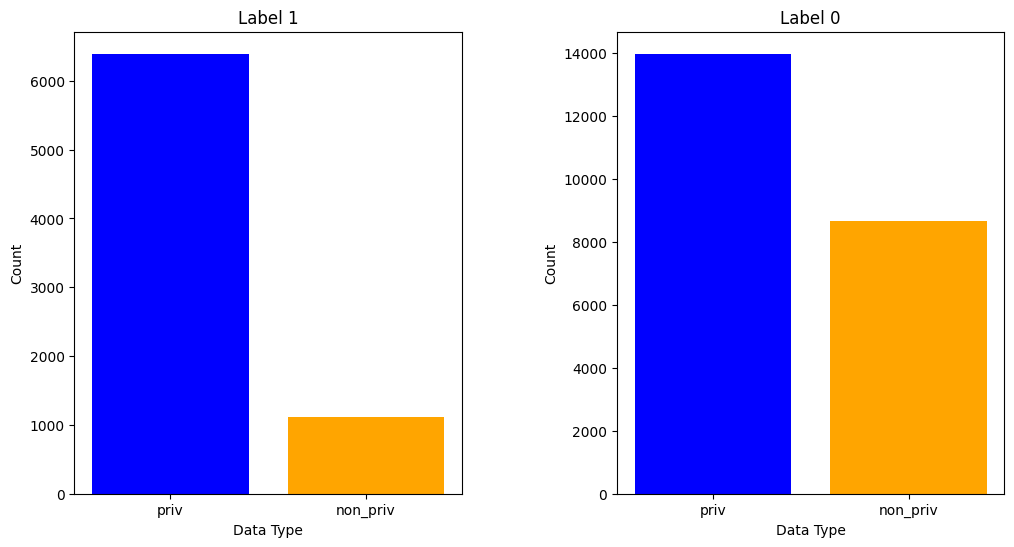

In [14]:
# Plot for orig_data_one_priv.shape[0] and orig_data_one_non_priv.shape[0]
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar colors
colors = ['blue', 'orange']

# Plot 1 - orig_data_one_priv and orig_data_one_non_priv
axs[0].bar(['priv', 'non_priv'], [orig_data_one_priv.shape[0], orig_data_one_non_priv.shape[0]], color=colors)
axs[0].set_xlabel('Data Type')
axs[0].set_ylabel('Count')
axs[0].set_title('Label 1')

# Plot 2 - orig_data_zero_priv and orig_data_zero_non_priv
axs[1].bar(['priv', 'non_priv'], [orig_data_zero_priv.shape[0], orig_data_zero_non_priv.shape[0]], color=colors)
axs[1].set_xlabel('Data Type')
axs[1].set_ylabel('Count')
axs[1].set_title('Label 0')


# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

plt.savefig('plot_original_ratios.jpg')


# Show the plots
plt.show()

In [15]:
orig_data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United-States,0
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,1,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,1,0,0,40,United-States,0
30158,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,0,38,United-States,0
30159,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,1,0,0,40,United-States,1
30160,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,0,40,United-States,0


In [16]:
# dataset for training
orig_data.dropna(thresh=len(feature_columns)/2, inplace=True)
orig_data.reset_index(drop=True, inplace=True)

y_orig = orig_data[TARGET_COL]
# y_orig = orig_data[TARGET_COL].to_frame()

y_orig.dropna(inplace=True)

orig_data = orig_data.loc[:, feature_columns]
# data = data[feature_columns]
encoder = ce.TargetEncoder(cols=CATEGORICAL)

encoder.fit(orig_data, y_orig)
orig_data_encoded = encoder.transform(orig_data)

In [17]:
orig_dataset = pd.concat([orig_data, y_orig], axis=1)


## Acc, fairness metrics and roc & auc for original dataset

conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
accuracy:  0.9218590398365679 precision:  0.8333333333333334 recall:  0.4148471615720524 fpr:  0.01098901098901099 tpr:  0.4148471615720524 fn+fp 153
conf matrix:
  [[2625  177]
 [ 584  689]] 
accuracy:  0.8132515337423313 precision:  0.7956120092378753 recall:  0.5412411626080126 fpr:  0.06316916488222699 tpr:  0.5412411626080126 fn+fp 761
conf matrix:
  [[4322  209]
 [ 763  739]] 
accuracy:  0.8388861263053208 precision:  0.7795358649789029 recall:  0.49201065246338216 fpr:  0.04612668285146767 tpr:  0.49201065246338216 fn+fp 972
conf matrix:
  [[1712   20]
 [ 142   68]] 
accuracy:  0.9165808444902163 precision:  0.7727272727272727 recall:  0.3238095238095238 fpr:  0.011547344110854504 tpr:  0.3238095238095238 fn+fp 162
conf matrix:
  [[2610  189]
 [ 621  671]] 
accura

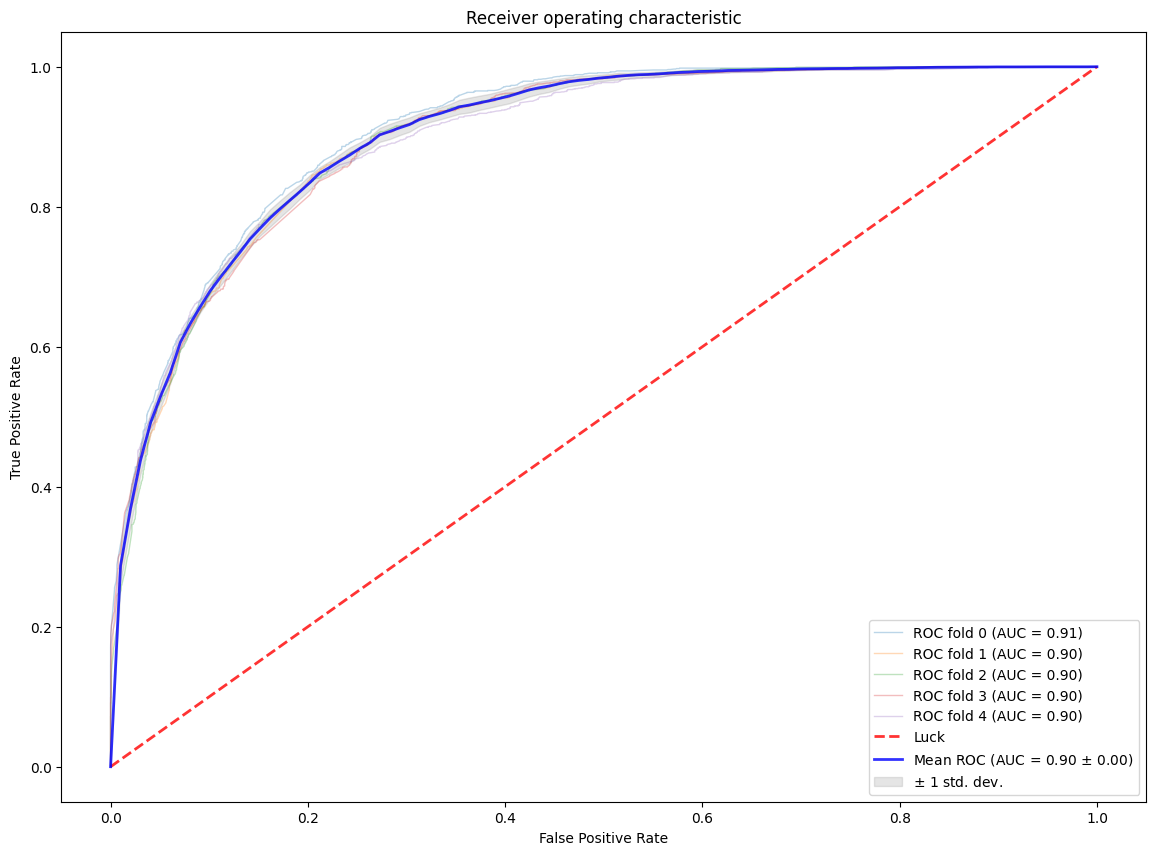

Accaracy list :  [0.848499917122493, 0.8388861263053208, 0.8420092838196287, 0.8446618037135278, 0.8444960212201591]
equal opportunity for tpr :  [0.12639400103596016, 0.19554032139171457, 0.1431478530513804, 0.09449612791121725, 0.09110068077864059]
equal opportunity for fpr :  [0.052180153893215994, 0.05597677164477251, 0.05420928658674141, 0.06033013214010466, 0.03765821608219208]
odds difference list :  [0.08928707746458808, 0.12575854651824353, 0.0986785698190609, 0.07741313002566096, 0.06437944843041633]
The mean accuracy is  0.844 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.130 ± 0.038
The mean equal opportunity for fpr: (close to 0) 0.052 ± 0.008
The mean odds difference: (close to 0) 0.091 ± 0.021
The mean parity difference: (close to 0) 0.773 ± 0.025
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [18]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

# CTGAN On Priv Target Group

In [19]:
orig_dataset[TARGET_COL] = orig_dataset[TARGET_COL].astype(int)

unprivileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
privileged_data_priv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] == PRIV_CLASS)]
print(unprivileged_data_priv_target.shape[0])
print(privileged_data_priv_target.shape[0])

1112
6396


In [20]:
unprivileged_data_priv_target

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,0,0,3683,20,United-States,1
7,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,0,0,3004,35,United-States,1
9,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,0,0,2824,20,United-States,1
25,59,Self-emp-inc,107287,10th,6,Widowed,Exec-managerial,Unmarried,White,0,0,2559,50,United-States,1
29,63,Federal-gov,39181,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,0,0,2559,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30057,51,Local-gov,203334,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,0,0,0,45,United-States,1
30117,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,0,0,0,50,United-States,1
30125,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,0,0,0,22,United-States,1
30143,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,0,0,0,55,United-States,1


In [21]:
from ctgan import CTGAN
if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)
else:
    ctgan_priv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_priv_target.fit(privileged_data_priv_target , CATEGORICAL, epochs = 200)


# from ctgan import CTGAN

# if unprivileged_data_priv_target.shape[0] < privileged_data_priv_target.shape[0]:
#     ctgan_priv_target = CTGAN(verbose=True)
#     # Fit the synthesizer to the unprivileged features
#     ctgan_priv_target.fit(unprivileged_data_priv_target , CATEGORICAL, epochs = 200)


Gen. (-1.00) | Discrim. (0.05): 100%|██████████| 200/200 [01:00<00:00,  3.29it/s]


# CTGAN On Unpriv Target Group

In [22]:
unprivileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] != PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]
privileged_data_unpriv_target = orig_dataset[(orig_dataset[PRIV_FEATURE] == PRIV_VALUE_FEATURE ) & (orig_dataset[TARGET_COL] != PRIV_CLASS)]

print(unprivileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0])
print(privileged_data_unpriv_target.shape[0]-unprivileged_data_unpriv_target.shape[0])

8670
13984
5314


In [23]:
from ctgan import CTGAN
if unprivileged_data_unpriv_target.shape[0] <= privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(unprivileged_data_unpriv_target , CATEGORICAL, epochs = 200)

if unprivileged_data_unpriv_target.shape[0] > privileged_data_unpriv_target.shape[0]:
    ctgan_unpriv_target = CTGAN(verbose=True)
    # Fit the synthesizer to the unprivileged features
    ctgan_unpriv_target.fit(privileged_data_unpriv_target , CATEGORICAL, epochs = 200)


Gen. (0.11) | Discrim. (0.03): 100%|██████████| 200/200 [07:59<00:00,  2.40s/it]


In [24]:
orig_dataset = pd.concat([orig_data_encoded, y_orig], axis=1)
orig_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,0.218792,132870,0.164329,9,0.096735,0.485220,0.106523,0.263718,0,0,4356,18,0.254327,0
1,54,0.218792,140359,0.062837,4,0.107262,0.124619,0.066314,0.263718,0,0,3900,40,0.254327,0
2,41,0.218792,264663,0.200060,10,0.070288,0.448489,0.014330,0.263718,0,0,3900,40,0.254327,0
3,34,0.218792,216864,0.164329,9,0.107262,0.041096,0.066314,0.263718,0,0,3770,45,0.254327,0
4,38,0.218792,150601,0.071951,6,0.070288,0.133835,0.066314,0.263718,1,0,3770,40,0.254327,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,22,0.218792,310152,0.200060,10,0.048324,0.326087,0.106523,0.263718,1,0,0,40,0.254327,0
30158,27,0.218792,257302,0.253968,12,0.454959,0.304825,0.493599,0.263718,0,0,0,38,0.254327,0
30159,40,0.218792,154374,0.164329,9,0.454959,0.124619,0.455669,0.263718,1,0,0,40,0.254327,1
30160,58,0.218792,151910,0.164329,9,0.096735,0.133835,0.066314,0.263718,0,0,0,40,0.254327,0


In [25]:
print(DATASET_NAME)

ADULT_SEX


Optuna FairUS

In [26]:
def Upsampling_Dataset(lambda_0, lambda_1):
    priv_target_samples = ctgan_priv_target.sample(math.floor(lambda_0 * (abs(privileged_data_priv_target.shape[0] - unprivileged_data_priv_target.shape[0]))))
    #print(priv_target_samples)
    # print('number of samples i added(lambda_0)', len(priv_target_samples))
    y_priv = priv_target_samples[TARGET_COL]
    priv_target_samples = priv_target_samples.loc[:, feature_columns]

    priv_target_samples = encoder.transform(priv_target_samples)
    priv_target_samples = pd.concat([priv_target_samples, y_priv], axis=1)

    unpriv_target_samples = ctgan_unpriv_target.sample(math.floor(lambda_1 * (abs(privileged_data_unpriv_target.shape[0] - unprivileged_data_unpriv_target.shape[0]))))
    # print('number of samples i added(lambda_1)', len(unpriv_target_samples))
    y_unpriv = unpriv_target_samples[TARGET_COL]
    unpriv_target_samples = unpriv_target_samples.loc[:, feature_columns]

    unpriv_target_samples = encoder.transform(unpriv_target_samples)
    unpriv_target_samples = pd.concat([unpriv_target_samples, y_unpriv], axis=1)

    if len((priv_target_samples)>0) and (len(unpriv_target_samples)==0):
        df_list = [orig_dataset, priv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(unpriv_target_samples)>0) and (len(priv_target_samples)==0):
        df_list = [orig_dataset, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_debias = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)>0) and (len(unpriv_target_samples)>0):
        df_list = [orig_dataset, priv_target_samples, unpriv_target_samples]  # List of your dataframes
        upsampled_df = pd.concat(df_list)
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    if (len(priv_target_samples)==0) and (len(unpriv_target_samples)==0):
        upsampled_df = orig_dataset
        y_upsampled = upsampled_df[TARGET_COL]
        upsampled_df_features = upsampled_df.loc[:, feature_columns]

    return upsampled_df


In [27]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.5 MB/s eta 0:00:00


In [28]:
!pip install cmaes


In [29]:
import optuna


In [30]:
all_upsampled_acc = []
all_upsampled_od_diff = []

def FairUS_Finding_Optimal_Lambdas_Optuna(trial):

    # Initialize original Equalized odds and Accuracy Scores
    orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact = fairness_metrics_roc_auc_no_print(orig_data_encoded, y_orig)

    OrigFair_score = mean(orig_od_diff)
    OrigAcc_score = mean(orig_acc)

    # Initialize matrices to store Fairness and Accuracy results
    #Fairness_Matrix = np.zeros((num_steps, num_steps))
    #Accuracy_Matrix = np.zeros((num_steps, num_steps))

    lambda_0 =  trial.suggest_float("lambda_0", 0, 2)
    lambda_1 =  trial.suggest_float("lambda_1", 0, 2)

    upsampled_df = Upsampling_Dataset(lambda_0, lambda_1)
    y_debias = upsampled_df[TARGET_COL]
    upsampled_df_features = upsampled_df.loc[:, feature_columns]

    upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact = fairness_metrics_roc_auc_no_print(upsampled_df_features, y_debias)

    CurrFair_score = mean(upsampled_od_diff)
    CurrAcc_score = mean(upsampled_acc)
    # if ALPHA == 1:
    #   optimization_objective = CurrFair_score/mean(orig_od_diff)
    # else:
      # optimization_objective = (ALPHA*CurrFair_score/mean(orig_od_diff)) - ((1-ALPHA)*CurrAcc_score/mean(orig_acc))
    optimization_objective = (CurrFair_score/mean(orig_od_diff)) - (CurrAcc_score/mean(orig_acc))
    # optimization_objective = (CurrFair_score) - (CurrAcc_score)

    # Update fairness matrix with Equalized odds subtraction
    #Fairness_Matrix[i, j] = -(CurrFair_score - OrigFair_score)
    # Update accuracy matrix with Minos accuracy subtraction
    #Accuracy_Matrix[i, j] = (CurrAcc_score - OrigAcc_score)


    #fairness_delta = np.max(Fairness_Matrix)-np.min(Fairness_Matrix)
    #acc_delta = np.max(Accuracy_Matrix)-np.min(Accuracy_Matrix)
    #fairness_factor = acc_delta / fairness_delta
    #scaled_fairness_matrix = fairness_factor * Fairness_Matrix


    #Accuracy_Matrix = -(Accuracy_Matrix)
    #scaled_fairness_matrix= -(scaled_fairness_matrix)
    print ('lambda_0:',lambda_0)
    print ('lambda_1:',lambda_1)
    #print ('fairness matrix before scaling: ',Fairness_Matrix)
    #print ('fairness matrix after scaling: ',scaled_fairness_matrix)
    #print ('acc matrix is: ', Accuracy_Matrix)

    # Save upsampled_acc and upsampled_op_diff as trial attributes
    upsampled_acc = mean(upsampled_acc)
    upsampled_od_diff = mean(upsampled_od_diff)
    trial.set_user_attr('upsampled_acc', upsampled_acc)
    trial.set_user_attr('upsampled_op_diff', upsampled_od_diff)
    print('---------------------------------------trail upsampled_acc is : ', trial.user_attrs.get('upsampled_acc'))
    print('---------------------------------------trail upsampled_op_diff is : ', trial.user_attrs.get('upsampled_op_diff'))
    all_upsampled_acc.append(upsampled_acc)
    all_upsampled_od_diff.append(upsampled_od_diff)

    # Return optimal dataset upsampled with lambda_0, lambda_1 values
    # return optimization_objective #scaled_fairness_matrix
    return CurrFair_score, CurrAcc_score #for multi objective


In [31]:
# Record the start time
start_time = time.time()

In [32]:
CME_flag = False

if CME_flag:
  from optuna.samplers import CmaEsSampler

  # Create an instance of CmaEsSampler
  # Create an instance of CmaEsSampler with specified parameters
  cma_es_sampler = CmaEsSampler(
      sigma0=0.01,  # Initial standard deviation of the distribution.
      n_startup_trials=10,  # The number of trials before using CMA-ES.
      independent_sampler=optuna.samplers.RandomSampler(seed=0)  # Sampler used for the first `n_startup_trials`.
  )


  # Pass the instance of CmaEsSampler to create_study
  # study = optuna.create_study(sampler=cma_es_sampler, direction='minimize')
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=400)
else:
  from optuna.samplers import TPESampler

  # Create an instance of TPESampler with custom parameters
  # You can adjust parameters like n_startup_trials, n_ei_candidates, etc.
  tpe_sampler = TPESampler(n_startup_trials=20, n_ei_candidates=24, multivariate=True)

  # Pass the instance of TPESampler to create_study
  # study = optuna.create_study(sampler=tpe_sampler, direction='minimize') #directions=['minimize', 'maximize']
  study = optuna.create_study(sampler=tpe_sampler, directions=['minimize', 'maximize']) #

  study.optimize(FairUS_Finding_Optimal_Lambdas_Optuna, n_trials=200)

/usr/local/lib/python3.10/dist-packages/optuna/samplers/_tpe/sampler.py:319: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2024-04-01 19:12:57,321] A new study created in memory with name: no-name-37c99bc6-6ed7-4134-8b13-73b1cfcbc3bf


conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
accuracy:  0.9218590398365679 precision:  0.8333333333333334 recall:  0.4148471615720524 fpr:  0.01098901098901099 tpr:  0.4148471615720524 fn+fp 153
conf matrix:
  [[2625  177]
 [ 584  689]] 
accuracy:  0.8132515337423313 precision:  0.7956120092378753 recall:  0.5412411626080126 fpr:  0.06316916488222699 tpr:  0.5412411626080126 fn+fp 761
conf matrix:
  [[4322  209]
 [ 763  739]] 
accuracy:  0.8388861263053208 precision:  0.7795358649789029 recall:  0.49201065246338216 fpr:  0.04612668285146767 tpr:  0.49201065246338216 fn+fp 972
conf matrix:
  [[1712   20]
 [ 142   68]] 
accuracy:  0.9165808444902163 precision:  0.7727272727272727 recall:  0.3238095238095238 fpr:  0.011547344110854504 tpr:  0.3238095238095238 fn+fp 162
conf matrix:
  [[2610  189]
 [ 621  671]] 
accura

[I 2024-04-01 19:13:00,930] Trial 0 finished with values: [0.22905111632256958, 0.8730643402399128] and parameters: {'lambda_0': 1.6161342373457768, 'lambda_1': 0.4825365380430624}. 


conf matrix:
  [[4800  243]
 [ 790 2420]] 
accuracy:  0.8748333939173634 precision:  0.9087495306045813 recall:  0.7538940809968847 fpr:  0.04818560380725759 tpr:  0.7538940809968847 fn+fp 1033
conf matrix:
  [[2609  191]
 [ 651  627]] 
accuracy:  0.7935262383521334 precision:  0.7665036674816625 recall:  0.49061032863849763 fpr:  0.06821428571428571 tpr:  0.49061032863849763 fn+fp 842
conf matrix:
  [[2191   52]
 [ 139 1793]] 
accuracy:  0.954251497005988 precision:  0.9718157181571816 recall:  0.9280538302277432 fpr:  0.0231832367365136 tpr:  0.9280538302277432 fn+fp 191
lambda_0: 1.6161342373457768
lambda_1: 0.4825365380430624
---------------------------------------trail upsampled_acc is :  0.8730643402399128
---------------------------------------trail upsampled_op_diff is :  0.22905111632256958
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:13:06,140] Trial 1 finished with values: [0.2374941376850205, 0.8813281104129066] and parameters: {'lambda_0': 1.7877014176021182, 'lambda_1': 0.8843492454021185}. 


conf matrix:
  [[5194  276]
 [ 829 2562]] 
accuracy:  0.8752962419591468 precision:  0.9027484143763214 recall:  0.75552934237688 fpr:  0.05045703839122486 tpr:  0.75552934237688 fn+fp 1105
conf matrix:
  [[2629   75]
 [ 144 1905]] 
accuracy:  0.9539238375762676 precision:  0.9621212121212122 recall:  0.9297218155197657 fpr:  0.027736686390532544 tpr:  0.9297218155197657 fn+fp 219
conf matrix:
  [[2565  201]
 [ 685  657]] 
accuracy:  0.7843232716650438 precision:  0.7657342657342657 recall:  0.48956780923994037 fpr:  0.07266811279826464 tpr:  0.48956780923994037 fn+fp 886
lambda_0: 1.7877014176021182
lambda_1: 0.8843492454021185
---------------------------------------trail upsampled_acc is :  0.8813281104129066
---------------------------------------trail upsampled_op_diff is :  0.2374941376850205
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:13:12,519] Trial 2 finished with values: [0.1722792839699932, 0.8514012164673664] and parameters: {'lambda_0': 0.561672592917138, 'lambda_1': 0.4003016840584588}. 


conf matrix:
  [[4708  248]
 [ 833 1262]] 
accuracy:  0.8466884129910651 precision:  0.8357615894039735 recall:  0.6023866348448688 fpr:  0.05004035512510089 tpr:  0.6023866348448688 fn+fp 1081
conf matrix:
  [[2095   29]
 [ 185  653]] 
accuracy:  0.9277515192437542 precision:  0.9574780058651027 recall:  0.779236276849642 fpr:  0.013653483992467044 tpr:  0.779236276849642 fn+fp 214
conf matrix:
  [[2613  219]
 [ 648  609]] 
accuracy:  0.7879677182685253 precision:  0.7355072463768116 recall:  0.48448687350835323 fpr:  0.07733050847457627 tpr:  0.48448687350835323 fn+fp 867
lambda_0: 0.561672592917138
lambda_1: 0.4003016840584588
---------------------------------------trail upsampled_acc is :  0.8514012164673664
---------------------------------------trail upsampled_op_diff is :  0.1722792839699932
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:13:19,628] Trial 3 finished with values: [0.2375120275987776, 0.8850755022204257] and parameters: {'lambda_0': 1.75709103874319, 'lambda_1': 1.262099110014135}. 


conf matrix:
  [[5632  240]
 [ 802 2556]] 
accuracy:  0.8871072589382448 precision:  0.9141630901287554 recall:  0.7611673615247171 fpr:  0.04087193460490463 tpr:  0.7611673615247171 fn+fp 1042
conf matrix:
  [[3021   48]
 [ 138 1877]] 
accuracy:  0.9634146341463414 precision:  0.9750649350649351 recall:  0.9315136476426799 fpr:  0.015640273704789834 tpr:  0.9315136476426799 fn+fp 186
conf matrix:
  [[2611  192]
 [ 664  679]] 
accuracy:  0.7935359382537386 precision:  0.7795637198622273 recall:  0.505584512285927 fpr:  0.06849803781662504 tpr:  0.505584512285927 fn+fp 856
lambda_0: 1.75709103874319
lambda_1: 1.262099110014135
---------------------------------------trail upsampled_acc is :  0.8850755022204257
---------------------------------------trail upsampled_op_diff is :  0.2375120275987776
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1

[I 2024-04-01 19:13:26,790] Trial 4 finished with values: [0.22368251373011666, 0.8815149179786415] and parameters: {'lambda_0': 1.225442685413205, 'lambda_1': 1.6520235743974958}. 


conf matrix:
  [[6009  277]
 [ 817 1980]] 
accuracy:  0.8795552130353408 precision:  0.8772707133362871 recall:  0.7079013228459063 fpr:  0.04406617881005409 tpr:  0.7079013228459063 fn+fp 1094
conf matrix:
  [[3464   45]
 [ 188 1334]] 
accuracy:  0.9536871397336514 precision:  0.9673676577229877 recall:  0.8764783180026281 fpr:  0.012824166429182103 tpr:  0.8764783180026281 fn+fp 233
conf matrix:
  [[2545  232]
 [ 629  646]] 
accuracy:  0.7875123395853899 precision:  0.7357630979498861 recall:  0.5066666666666667 fpr:  0.08354339214980194 tpr:  0.5066666666666667 fn+fp 861
lambda_0: 1.225442685413205
lambda_1: 1.6520235743974958
---------------------------------------trail upsampled_acc is :  0.8815149179786415
---------------------------------------trail upsampled_op_diff is :  0.22368251373011666
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:13:34,253] Trial 5 finished with values: [0.2375605104822922, 0.8820111825086768] and parameters: {'lambda_0': 1.8957816543759356, 'lambda_1': 0.9273412841713948}. 


conf matrix:
  [[5259  257]
 [ 860 2645]] 
accuracy:  0.8761778073384325 precision:  0.9114403859407305 recall:  0.7546362339514978 fpr:  0.04659173313995649 tpr:  0.7546362339514978 fn+fp 1117
conf matrix:
  [[2693   49]
 [ 183 1969]] 
accuracy:  0.9525950143032285 precision:  0.9757185332011893 recall:  0.9149628252788105 fpr:  0.01787016776075857 tpr:  0.9149628252788105 fn+fp 232
conf matrix:
  [[2566  208]
 [ 677  676]] 
accuracy:  0.7855585170826266 precision:  0.7647058823529411 recall:  0.49963045084996305 fpr:  0.07498197548666186 tpr:  0.49963045084996305 fn+fp 885
lambda_0: 1.8957816543759356
lambda_1: 0.9273412841713948
---------------------------------------trail upsampled_acc is :  0.8820111825086768
---------------------------------------trail upsampled_op_diff is :  0.2375605104822922
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:13:39,034] Trial 6 finished with values: [0.2326047521689024, 0.8708940742006317] and parameters: {'lambda_0': 1.59709781215903, 'lambda_1': 0.46410235045629866}. 


conf matrix:
  [[4741  283]
 [ 745 2444]] 
accuracy:  0.8748325824911726 precision:  0.8962229556288962 recall:  0.766384446534964 fpr:  0.056329617834394906 tpr:  0.766384446534964 fn+fp 1028
conf matrix:
  [[2605  222]
 [ 588  664]] 
accuracy:  0.8014219171365531 precision:  0.7494356659142212 recall:  0.5303514376996805 fpr:  0.07852847541563494 tpr:  0.5303514376996805 fn+fp 810
conf matrix:
  [[2136   61]
 [ 157 1780]] 
accuracy:  0.9472665699080793 precision:  0.9668658337859859 recall:  0.9189468249870935 fpr:  0.027765134274010013 tpr:  0.9189468249870935 fn+fp 218
lambda_0: 1.59709781215903
lambda_1: 0.46410235045629866
---------------------------------------trail upsampled_acc is :  0.8708940742006317
---------------------------------------trail upsampled_op_diff is :  0.2326047521689024
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:13:41,590] Trial 7 finished with values: [0.1216930289612716, 0.8620319347476583] and parameters: {'lambda_0': 0.34046368236774915, 'lambda_1': 0.8093716001672853}. 


conf matrix:
  [[5130  261]
 [ 745 1116]] 
accuracy:  0.8612796469939327 precision:  0.8104575163398693 recall:  0.599677592692101 fpr:  0.048414023372287146 tpr:  0.599677592692101 fn+fp 1006
conf matrix:
  [[2532  223]
 [ 569  698]] 
accuracy:  0.8030830432620587 precision:  0.757871878393051 recall:  0.5509076558800315 fpr:  0.0809437386569873 tpr:  0.5509076558800315 fn+fp 792
conf matrix:
  [[2598   38]
 [ 176  418]] 
accuracy:  0.9337461300309597 precision:  0.9166666666666666 recall:  0.7037037037037037 fpr:  0.014415781487101669 tpr:  0.7037037037037037 fn+fp 214
lambda_0: 0.34046368236774915
lambda_1: 0.8093716001672853
---------------------------------------trail upsampled_acc is :  0.8620319347476583
---------------------------------------trail upsampled_op_diff is :  0.1216930289612716
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:13:44,624] Trial 8 finished with values: [0.06125248347073227, 0.8768387833144581] and parameters: {'lambda_0': 0.10610904160773016, 'lambda_1': 1.8308918196167157}. 


conf matrix:
  [[6262  214]
 [ 765  849]] 
accuracy:  0.8789864029666254 precision:  0.7986829727187206 recall:  0.5260223048327137 fpr:  0.03304508956145769 tpr:  0.5260223048327137 fn+fp 979
conf matrix:
  [[3683   28]
 [ 169  164]] 
accuracy:  0.9512858555885262 precision:  0.8541666666666666 recall:  0.4924924924924925 fpr:  0.00754513608191862 tpr:  0.4924924924924925 fn+fp 197
conf matrix:
  [[2579  186]
 [ 596  685]] 
accuracy:  0.8067226890756303 precision:  0.7864523536165328 recall:  0.5347384855581577 fpr:  0.06726943942133816 tpr:  0.5347384855581577 fn+fp 782
lambda_0: 0.10610904160773016
lambda_1: 1.8308918196167157
---------------------------------------trail upsampled_acc is :  0.8768387833144581
---------------------------------------trail upsampled_op_diff is :  0.06125248347073227
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:13:48,068] Trial 9 finished with values: [0.20426860646310868, 0.864554900219731] and parameters: {'lambda_0': 0.8808888412559146, 'lambda_1': 0.8328502284444366}. 


conf matrix:
  [[5142  273]
 [ 828 1605]] 
accuracy:  0.8597094801223242 precision:  0.854632587859425 recall:  0.6596794081381011 fpr:  0.050415512465373964 tpr:  0.6596794081381011 fn+fp 1101
conf matrix:
  [[2562   59]
 [ 168  933]] 
accuracy:  0.9390112842557765 precision:  0.9405241935483871 recall:  0.8474114441416893 fpr:  0.022510492178557804 tpr:  0.8474114441416893 fn+fp 227
conf matrix:
  [[2580  214]
 [ 660  672]] 
accuracy:  0.7881725642268541 precision:  0.7584650112866818 recall:  0.5045045045045045 fpr:  0.07659269863994274 tpr:  0.5045045045045045 fn+fp 874
lambda_0: 0.8808888412559146
lambda_1: 0.8328502284444366
---------------------------------------trail upsampled_acc is :  0.864554900219731
---------------------------------------trail upsampled_op_diff is :  0.20426860646310868
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:13:50,781] Trial 10 finished with values: [0.16208065106264222, 0.8652711070695862] and parameters: {'lambda_0': 0.5446245464829269, 'lambda_1': 1.1911250939076468}. 


conf matrix:
  [[5533  263]
 [ 856 1221]] 
accuracy:  0.8578686650577925 precision:  0.8227762803234502 recall:  0.5878671160327396 fpr:  0.045376121463077984 tpr:  0.5878671160327396 fn+fp 1119
conf matrix:
  [[2978   37]
 [ 183  566]] 
accuracy:  0.9415515409139213 precision:  0.9386401326699834 recall:  0.7556742323097463 fpr:  0.012271973466003316 tpr:  0.7556742323097463 fn+fp 220
conf matrix:
  [[2555  226]
 [ 673  655]] 
accuracy:  0.7812119737162326 precision:  0.7434733257661748 recall:  0.4932228915662651 fpr:  0.08126573175116865 tpr:  0.4932228915662651 fn+fp 899
lambda_0: 0.5446245464829269
lambda_1: 1.1911250939076468
---------------------------------------trail upsampled_acc is :  0.8652711070695862
---------------------------------------trail upsampled_op_diff is :  0.16208065106264222
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:13:53,633] Trial 11 finished with values: [0.21733352033694658, 0.8701683723931175] and parameters: {'lambda_0': 1.111815963186403, 'lambda_1': 0.9646202522232239}. 


conf matrix:
  [[5270  285]
 [ 833 1844]] 
accuracy:  0.8641885325558795 precision:  0.8661343353687178 recall:  0.6888307807246918 fpr:  0.05130513051305131 tpr:  0.6888307807246918 fn+fp 1118
conf matrix:
  [[2541  243]
 [ 656  652]] 
accuracy:  0.7803030303030303 precision:  0.7284916201117319 recall:  0.4984709480122324 fpr:  0.08728448275862069 tpr:  0.4984709480122324 fn+fp 899
conf matrix:
  [[2729   42]
 [ 177 1192]] 
accuracy:  0.9471014492753623 precision:  0.965964343598055 recall:  0.870708546384222 fpr:  0.015156983038614218 tpr:  0.870708546384222 fn+fp 219
lambda_0: 1.111815963186403
lambda_1: 0.9646202522232239
---------------------------------------trail upsampled_acc is :  0.8701683723931175
---------------------------------------trail upsampled_op_diff is :  0.21733352033694658
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:13:56,437] Trial 12 finished with values: [0.20843174949984578, 0.8595609768785514] and parameters: {'lambda_0': 0.8506350170116166, 'lambda_1': 0.6714026662016237}. 


conf matrix:
  [[4952  292]
 [ 796 1604]] 
accuracy:  0.8576661433804291 precision:  0.8459915611814346 recall:  0.6683333333333333 fpr:  0.05568268497330282 tpr:  0.6683333333333333 fn+fp 1088
conf matrix:
  [[2419   40]
 [ 178  986]] 
accuracy:  0.9398288711012973 precision:  0.9610136452241715 recall:  0.8470790378006873 fpr:  0.016266775111834077 tpr:  0.8470790378006873 fn+fp 218
conf matrix:
  [[2533  252]
 [ 618  618]] 
accuracy:  0.7836359114648097 precision:  0.7103448275862069 recall:  0.5 fpr:  0.09048473967684022 tpr:  0.5 fn+fp 870
lambda_0: 0.8506350170116166
lambda_1: 0.6714026662016237
---------------------------------------trail upsampled_acc is :  0.8595609768785514
---------------------------------------trail upsampled_op_diff is :  0.20843174949984578
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 

[I 2024-04-01 19:13:59,658] Trial 13 finished with values: [0.19812150349663107, 0.8598664278192578] and parameters: {'lambda_0': 0.7964286419885507, 'lambda_1': 0.5313458063424892}. 


conf matrix:
  [[4877  218]
 [ 721 1622]] 
accuracy:  0.8737563861253025 precision:  0.8815217391304347 recall:  0.6922748612889458 fpr:  0.04278704612365064 tpr:  0.6922748612889458 fn+fp 939
conf matrix:
  [[2258   38]
 [ 133  946]] 
accuracy:  0.9493333333333334 precision:  0.9613821138211383 recall:  0.8767377201112141 fpr:  0.016550522648083623 tpr:  0.8767377201112141 fn+fp 171
conf matrix:
  [[2619  180]
 [ 588  676]] 
accuracy:  0.8109771105094757 precision:  0.7897196261682243 recall:  0.5348101265822784 fpr:  0.06430868167202572 tpr:  0.5348101265822784 fn+fp 768
lambda_0: 0.7964286419885507
lambda_1: 0.5313458063424892
---------------------------------------trail upsampled_acc is :  0.8598664278192578
---------------------------------------trail upsampled_op_diff is :  0.19812150349663107
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:14:02,455] Trial 14 finished with values: [0.23321105291445868, 0.8725695844924531] and parameters: {'lambda_0': 1.3546590471615032, 'lambda_1': 0.8172724673248746}. 


conf matrix:
  [[5125  274]
 [ 802 2131]] 
accuracy:  0.870859337493999 precision:  0.8860706860706861 recall:  0.7265598363450392 fpr:  0.050750138914613815 tpr:  0.7265598363450392 fn+fp 1076
conf matrix:
  [[2566   54]
 [ 148 1478]] 
accuracy:  0.9524258125294395 precision:  0.9647519582245431 recall:  0.9089790897908979 fpr:  0.020610687022900764 tpr:  0.9089790897908979 fn+fp 202
conf matrix:
  [[2559  220]
 [ 654  653]] 
accuracy:  0.7860988742046011 precision:  0.7479954180985109 recall:  0.4996174445294568 fpr:  0.07916516732637639 tpr:  0.4996174445294568 fn+fp 874
lambda_0: 1.3546590471615032
lambda_1: 0.8172724673248746
---------------------------------------trail upsampled_acc is :  0.8725695844924531
---------------------------------------trail upsampled_op_diff is :  0.23321105291445868
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:14:04,930] Trial 15 finished with values: [0.18990664879628025, 0.8528656820566175] and parameters: {'lambda_0': 0.6889851766305783, 'lambda_1': 0.3640152830987158}. 


conf matrix:
  [[4649  268]
 [ 794 1436]] 
accuracy:  0.8514061844130404 precision:  0.8427230046948356 recall:  0.6439461883408072 fpr:  0.0545047793369941 tpr:  0.6439461883408072 fn+fp 1062
conf matrix:
  [[2090   30]
 [ 167  793]] 
accuracy:  0.936038961038961 precision:  0.9635479951397327 recall:  0.8260416666666667 fpr:  0.014150943396226415 tpr:  0.8260416666666667 fn+fp 197
conf matrix:
  [[2559  238]
 [ 627  643]] 
accuracy:  0.7873125153675928 precision:  0.7298524404086265 recall:  0.5062992125984253 fpr:  0.08509116910976046 tpr:  0.5062992125984253 fn+fp 865
lambda_0: 0.6889851766305783
lambda_1: 0.3640152830987158
---------------------------------------trail upsampled_acc is :  0.8528656820566175
---------------------------------------trail upsampled_op_diff is :  0.18990664879628025
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:14:07,963] Trial 16 finished with values: [0.21273775436995176, 0.8849184477135646] and parameters: {'lambda_0': 1.1898283203154123, 'lambda_1': 1.740663575038916}. 


conf matrix:
  [[6085  295]
 [ 743 2016]] 
accuracy:  0.8864208337892548 precision:  0.8723496321938555 recall:  0.730699528814788 fpr:  0.04623824451410658 tpr:  0.730699528814788 fn+fp 1038
conf matrix:
  [[3515   47]
 [ 177 1326]] 
accuracy:  0.9557749259624877 precision:  0.965768390386016 recall:  0.8822355289421158 fpr:  0.013194834362717574 tpr:  0.8822355289421158 fn+fp 224
conf matrix:
  [[2570  248]
 [ 566  690]] 
accuracy:  0.8001963672066765 precision:  0.7356076759061834 recall:  0.5493630573248408 fpr:  0.0880056777856636 tpr:  0.5493630573248408 fn+fp 814
lambda_0: 1.1898283203154123
lambda_1: 1.740663575038916
---------------------------------------trail upsampled_acc is :  0.8849184477135646
---------------------------------------trail upsampled_op_diff is :  0.21273775436995176
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:14:10,545] Trial 17 finished with values: [0.20123427787288478, 0.8514989253281314] and parameters: {'lambda_0': 0.774302600306765, 'lambda_1': 0.013347470685324936}. 


conf matrix:
  [[4203  341]
 [ 664 1656]] 
accuracy:  0.853583916083916 precision:  0.829243865798698 recall:  0.7137931034482758 fpr:  0.07504401408450705 tpr:  0.7137931034482758 fn+fp 1005
conf matrix:
  [[1711   50]
 [ 127  928]] 
accuracy:  0.9371448863636364 precision:  0.9488752556237219 recall:  0.8796208530805687 fpr:  0.028392958546280524 tpr:  0.8796208530805687 fn+fp 177
conf matrix:
  [[2492  291]
 [ 537  728]] 
accuracy:  0.7954545454545454 precision:  0.7144259077526988 recall:  0.5754940711462451 fpr:  0.10456342076895436 tpr:  0.5754940711462451 fn+fp 828
lambda_0: 0.774302600306765
lambda_1: 0.013347470685324936
---------------------------------------trail upsampled_acc is :  0.8514989253281314
---------------------------------------trail upsampled_op_diff is :  0.20123427787288478
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:14:13,414] Trial 18 finished with values: [0.08979758002591538, 0.8502770324939132] and parameters: {'lambda_0': 0.21825646910243468, 'lambda_1': 0.2897875370677476}. 


conf matrix:
  [[4587  251]
 [ 722 1010]] 
accuracy:  0.8519025875190259 precision:  0.8009516256938938 recall:  0.5831408775981525 fpr:  0.05188094253823894 tpr:  0.5831408775981525 fn+fp 973
conf matrix:
  [[2036   39]
 [ 151  330]] 
accuracy:  0.9256651017214398 precision:  0.8943089430894309 recall:  0.6860706860706861 fpr:  0.018795180722891568 tpr:  0.6860706860706861 fn+fp 190
conf matrix:
  [[2551  212]
 [ 571  680]] 
accuracy:  0.804932735426009 precision:  0.7623318385650224 recall:  0.5435651478816946 fpr:  0.07672819399203765 tpr:  0.5435651478816946 fn+fp 783
lambda_0: 0.21825646910243468
lambda_1: 0.2897875370677476
---------------------------------------trail upsampled_acc is :  0.8502770324939132
---------------------------------------trail upsampled_op_diff is :  0.08979758002591538
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:14:15,991] Trial 19 finished with values: [0.09049371802604327, 0.8602022440781272] and parameters: {'lambda_0': 0.24311074192323234, 'lambda_1': 0.8749137300686824}. 


conf matrix:
  [[5235  225]
 [ 779  980]] 
accuracy:  0.8609225654522787 precision:  0.8132780082987552 recall:  0.557134735645253 fpr:  0.04120879120879121 tpr:  0.557134735645253 fn+fp 1004
conf matrix:
  [[2621   25]
 [ 161  303]] 
accuracy:  0.940192926045016 precision:  0.9237804878048781 recall:  0.6530172413793104 fpr:  0.00944822373393802 tpr:  0.6530172413793104 fn+fp 186
conf matrix:
  [[2614  200]
 [ 618  677]] 
accuracy:  0.8009247992212217 precision:  0.7719498289623717 recall:  0.5227799227799228 fpr:  0.07107320540156362 tpr:  0.5227799227799228 fn+fp 818
lambda_0: 0.24311074192323234
lambda_1: 0.8749137300686824
---------------------------------------trail upsampled_acc is :  0.8602022440781272
---------------------------------------trail upsampled_op_diff is :  0.09049371802604327
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:14:18,837] Trial 20 finished with values: [0.11899691900618217, 0.8745209989552687] and parameters: {'lambda_0': 0.3659318751495646, 'lambda_1': 1.8173886709486333}. 


conf matrix:
  [[6224  238]
 [ 791 1097]] 
accuracy:  0.8767664670658682 precision:  0.8217228464419476 recall:  0.5810381355932204 fpr:  0.03683070256886413 tpr:  0.5810381355932204 fn+fp 1029
conf matrix:
  [[3585   44]
 [ 182  454]] 
accuracy:  0.947010550996483 precision:  0.9116465863453815 recall:  0.7138364779874213 fpr:  0.01212455221824194 tpr:  0.7138364779874213 fn+fp 226
conf matrix:
  [[2639  194]
 [ 609  643]] 
accuracy:  0.8034271725826193 precision:  0.7682198327359617 recall:  0.5135782747603834 fpr:  0.06847864454641722 tpr:  0.5135782747603834 fn+fp 803
lambda_0: 0.3659318751495646
lambda_1: 1.8173886709486333
---------------------------------------trail upsampled_acc is :  0.8745209989552687
---------------------------------------trail upsampled_op_diff is :  0.11899691900618217
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:14:21,596] Trial 21 finished with values: [0.07596724729874495, 0.8763522798251093] and parameters: {'lambda_0': 0.08640478513671987, 'lambda_1': 1.7702825693476696}. 


conf matrix:
  [[6169  243]
 [ 729  864]] 
accuracy:  0.8785758900687071 precision:  0.7804878048780488 recall:  0.5423728813559322 fpr:  0.037897691827822835 tpr:  0.5423728813559322 fn+fp 972
conf matrix:
  [[3528   22]
 [ 182  146]] 
accuracy:  0.9473955647240846 precision:  0.8690476190476191 recall:  0.4451219512195122 fpr:  0.006197183098591549 tpr:  0.4451219512195122 fn+fp 204
conf matrix:
  [[2641  221]
 [ 547  718]] 
accuracy:  0.8139084080445844 precision:  0.7646432374866879 recall:  0.5675889328063242 fpr:  0.07721872816212438 tpr:  0.5675889328063242 fn+fp 768
lambda_0: 0.08640478513671987
lambda_1: 1.7702825693476696
---------------------------------------trail upsampled_acc is :  0.8763522798251093
---------------------------------------trail upsampled_op_diff is :  0.07596724729874495
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:14:25,231] Trial 22 finished with values: [0.11087165556198542, 0.8728723010292853] and parameters: {'lambda_0': 0.030056848067713304, 'lambda_1': 1.5136073293098133}. 


conf matrix:
  [[5885  254]
 [ 740  793]] 
accuracy:  0.8704379562043796 precision:  0.7574021012416428 recall:  0.5172863666014351 fpr:  0.04137481674539827 tpr:  0.5172863666014351 fn+fp 994
conf matrix:
  [[2581  224]
 [ 574  694]] 
accuracy:  0.8040756199361649 precision:  0.7559912854030502 recall:  0.5473186119873817 fpr:  0.07985739750445633 tpr:  0.5473186119873817 fn+fp 798
conf matrix:
  [[3304   30]
 [ 166   99]] 
accuracy:  0.945540427896638 precision:  0.7674418604651163 recall:  0.37358490566037733 fpr:  0.008998200359928014 tpr:  0.37358490566037733 fn+fp 196
lambda_0: 0.030056848067713304
lambda_1: 1.5136073293098133
---------------------------------------trail upsampled_acc is :  0.8728723010292853
---------------------------------------trail upsampled_op_diff is :  0.11087165556198542
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:14:28,250] Trial 23 finished with values: [0.19201837722723913, 0.8763360169745797] and parameters: {'lambda_0': 0.7816362355338264, 'lambda_1': 1.6987408620513067}. 


conf matrix:
  [[6080  256]
 [ 816 1511]] 
accuracy:  0.8762553387971834 precision:  0.855121675155631 recall:  0.6493339063171465 fpr:  0.04040404040404041 tpr:  0.6493339063171465 fn+fp 1072
conf matrix:
  [[3496   43]
 [ 180  845]] 
accuracy:  0.9511393514461 precision:  0.9515765765765766 recall:  0.824390243902439 fpr:  0.012150324950551003 tpr:  0.824390243902439 fn+fp 223
conf matrix:
  [[2584  213]
 [ 636  666]] 
accuracy:  0.7928763112954379 precision:  0.757679180887372 recall:  0.511520737327189 fpr:  0.07615302109402931 tpr:  0.511520737327189 fn+fp 849
lambda_0: 0.7816362355338264
lambda_1: 1.6987408620513067
---------------------------------------trail upsampled_acc is :  0.8763360169745797
---------------------------------------trail upsampled_op_diff is :  0.19201837722723913
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710

[I 2024-04-01 19:14:31,734] Trial 24 finished with values: [0.23755130502811247, 0.8893910223933529] and parameters: {'lambda_0': 1.6272496394141651, 'lambda_1': 1.991932785400038}. 


conf matrix:
  [[6384  263]
 [ 821 2401]] 
accuracy:  0.8901611105481811 precision:  0.9012762762762763 recall:  0.7451893234016139 fpr:  0.03956672182939672 tpr:  0.7451893234016139 fn+fp 1084
conf matrix:
  [[3812   37]
 [ 172 1818]] 
accuracy:  0.964206199691728 precision:  0.9800539083557952 recall:  0.91356783919598 fpr:  0.009612886464016628 tpr:  0.91356783919598 fn+fp 209
conf matrix:
  [[2572  226]
 [ 649  583]] 
accuracy:  0.78287841191067 precision:  0.7206427688504327 recall:  0.4732142857142857 fpr:  0.08077197998570407 tpr:  0.4732142857142857 fn+fp 875
lambda_0: 1.6272496394141651
lambda_1: 1.991932785400038
---------------------------------------trail upsampled_acc is :  0.8893910223933529
---------------------------------------trail upsampled_op_diff is :  0.23755130502811247
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[171

[I 2024-04-01 19:14:35,422] Trial 25 finished with values: [0.24394935722570418, 0.8891775756970121] and parameters: {'lambda_0': 1.8276055716148782, 'lambda_1': 1.9224962861230979}. 


conf matrix:
  [[6293  281]
 [ 810 2623]] 
accuracy:  0.8909763165783952 precision:  0.903236914600551 recall:  0.7640547625983105 fpr:  0.04274414359598418 tpr:  0.7640547625983105 fn+fp 1091
conf matrix:
  [[3699   47]
 [ 185 1987]] 
accuracy:  0.9607975667455222 precision:  0.9768928220255654 recall:  0.9148250460405156 fpr:  0.012546716497597437 tpr:  0.9148250460405156 fn+fp 232
conf matrix:
  [[2594  234]
 [ 625  636]] 
accuracy:  0.7899241868427488 precision:  0.7310344827586207 recall:  0.5043616177636796 fpr:  0.08274398868458274 tpr:  0.5043616177636796 fn+fp 859
lambda_0: 1.8276055716148782
lambda_1: 1.9224962861230979
---------------------------------------trail upsampled_acc is :  0.8891775756970121
---------------------------------------trail upsampled_op_diff is :  0.24394935722570418
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:14:38,796] Trial 26 finished with values: [0.10299551898720699, 0.8802575291651218] and parameters: {'lambda_0': 0.02950294980405685, 'lambda_1': 1.9185366552790675}. 


conf matrix:
  [[6337  232]
 [ 743  790]] 
accuracy:  0.8796593433720069 precision:  0.7729941291585127 recall:  0.5153294194390085 fpr:  0.035317399908661895 tpr:  0.5153294194390085 fn+fp 975
conf matrix:
  [[3735   26]
 [ 156  107]] 
accuracy:  0.9547713717693836 precision:  0.8045112781954887 recall:  0.4068441064638783 fpr:  0.0069130550385535765 tpr:  0.4068441064638783 fn+fp 182
conf matrix:
  [[2602  206]
 [ 587  683]] 
accuracy:  0.8055419323197646 precision:  0.7682789651293588 recall:  0.5377952755905512 fpr:  0.07336182336182336 tpr:  0.5377952755905512 fn+fp 793
lambda_0: 0.02950294980405685
lambda_1: 1.9185366552790675
---------------------------------------trail upsampled_acc is :  0.8802575291651218
---------------------------------------trail upsampled_op_diff is :  0.10299551898720699
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:14:41,726] Trial 27 finished with values: [0.11573166107429453, 0.8771494320225014] and parameters: {'lambda_0': 0.36148187681165805, 'lambda_1': 1.9759188858330268}. 


conf matrix:
  [[6389  241]
 [ 801 1083]] 
accuracy:  0.8776133427296218 precision:  0.81797583081571 recall:  0.5748407643312102 fpr:  0.036349924585218706 tpr:  0.5748407643312102 fn+fp 1042
conf matrix:
  [[3814   37]
 [ 215  402]] 
accuracy:  0.9435989256938228 precision:  0.9157175398633257 recall:  0.6515397082658023 fpr:  0.0096078940534926 tpr:  0.6515397082658023 fn+fp 252
conf matrix:
  [[2575  204]
 [ 586  681]] 
accuracy:  0.8047454275827979 precision:  0.7694915254237288 recall:  0.5374901341752171 fpr:  0.07340770061173084 tpr:  0.5374901341752171 fn+fp 790
lambda_0: 0.36148187681165805
lambda_1: 1.9759188858330268
---------------------------------------trail upsampled_acc is :  0.8771494320225014
---------------------------------------trail upsampled_op_diff is :  0.11573166107429453
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:14:44,733] Trial 28 finished with values: [0.039248336362849315, 0.8786281588447653] and parameters: {'lambda_0': 0.14608480604991905, 'lambda_1': 1.9979506583160065}. 


conf matrix:
  [[6435  219]
 [ 768  888]] 
accuracy:  0.8812274368231047 precision:  0.8021680216802168 recall:  0.5362318840579711 fpr:  0.032912533814247066 tpr:  0.5362318840579711 fn+fp 987
conf matrix:
  [[2586  188]
 [ 587  678]] 
accuracy:  0.8081208219856401 precision:  0.7829099307159353 recall:  0.5359683794466403 fpr:  0.06777217015140591 tpr:  0.5359683794466403 fn+fp 775
conf matrix:
  [[3849   31]
 [ 181  210]] 
accuracy:  0.9503629126668227 precision:  0.8713692946058091 recall:  0.5370843989769821 fpr:  0.007989690721649484 tpr:  0.5370843989769821 fn+fp 212
lambda_0: 0.14608480604991905
lambda_1: 1.9979506583160065
---------------------------------------trail upsampled_acc is :  0.8786281588447653
---------------------------------------trail upsampled_op_diff is :  0.039248336362849315
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:14:47,851] Trial 29 finished with values: [0.18654125701897872, 0.8771838907636541] and parameters: {'lambda_0': 0.717113356489133, 'lambda_1': 1.980169292112093}. 


conf matrix:
  [[6397  238]
 [ 842 1417]] 
accuracy:  0.8785698223521475 precision:  0.8561933534743202 recall:  0.6272687029659141 fpr:  0.035870384325546345 tpr:  0.6272687029659141 fn+fp 1080
conf matrix:
  [[3799   38]
 [ 211  798]] 
accuracy:  0.9486174164259182 precision:  0.9545454545454546 recall:  0.7908820614469773 fpr:  0.009903570497784727 tpr:  0.7908820614469773 fn+fp 249
conf matrix:
  [[2598  200]
 [ 631  619]] 
accuracy:  0.7947134387351779 precision:  0.7557997557997558 recall:  0.4952 fpr:  0.07147962830593281 tpr:  0.4952 fn+fp 831
lambda_0: 0.717113356489133
lambda_1: 1.980169292112093
---------------------------------------trail upsampled_acc is :  0.8771838907636541
---------------------------------------trail upsampled_op_diff is :  0.18654125701897872
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   

[I 2024-04-01 19:14:51,463] Trial 30 finished with values: [0.11775167257419383, 0.8791564147627416] and parameters: {'lambda_0': 0.37955320249415847, 'lambda_1': 1.9775158899168161}. 


conf matrix:
  [[6365  267]
 [ 744 1159]] 
accuracy:  0.8815465729349736 precision:  0.8127629733520336 recall:  0.6090383604834472 fpr:  0.04025934861278649 tpr:  0.6090383604834472 fn+fp 1011
conf matrix:
  [[3768   29]
 [ 178  451]] 
accuracy:  0.9532309082693177 precision:  0.9395833333333333 recall:  0.7170111287758346 fpr:  0.0076376086383987355 tpr:  0.7170111287758346 fn+fp 207
conf matrix:
  [[2597  238]
 [ 566  708]] 
accuracy:  0.8043319542467754 precision:  0.7484143763213531 recall:  0.5557299843014128 fpr:  0.08395061728395062 tpr:  0.5557299843014128 fn+fp 804
lambda_0: 0.37955320249415847
lambda_1: 1.9775158899168161
---------------------------------------trail upsampled_acc is :  0.8791564147627416
---------------------------------------trail upsampled_op_diff is :  0.11775167257419383
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:14:54,316] Trial 31 finished with values: [0.24571569046029773, 0.865296295393461] and parameters: {'lambda_0': 1.6864845550893848, 'lambda_1': 0.05286291703719148}. 


conf matrix:
  [[4336  250]
 [ 737 2547]] 
accuracy:  0.874587039390089 precision:  0.9106185198426886 recall:  0.77557856272838 fpr:  0.054513737461840385 tpr:  0.77557856272838 fn+fp 987
conf matrix:
  [[1741   48]
 [ 125 1893]] 
accuracy:  0.9545573942737063 precision:  0.9752704791344667 recall:  0.9380574826560951 fpr:  0.026830631637786474 tpr:  0.9380574826560951 fn+fp 173
conf matrix:
  [[2595  202]
 [ 612  654]] 
accuracy:  0.7996554270243662 precision:  0.764018691588785 recall:  0.5165876777251185 fpr:  0.07222023596710761 tpr:  0.5165876777251185 fn+fp 814
lambda_0: 1.6864845550893848
lambda_1: 0.05286291703719148
---------------------------------------trail upsampled_acc is :  0.865296295393461
---------------------------------------trail upsampled_op_diff is :  0.24571569046029773
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1

[I 2024-04-01 19:14:57,358] Trial 32 finished with values: [0.0743195637647521, 0.8811492613865565] and parameters: {'lambda_0': 0.08095323014250391, 'lambda_1': 1.9785260262854942}. 


conf matrix:
  [[6416  217]
 [ 783  804]] 
accuracy:  0.878345498783455 precision:  0.7874632713026445 recall:  0.5066162570888468 fpr:  0.03271521181968943 tpr:  0.5066162570888468 fn+fp 1000
conf matrix:
  [[3809   27]
 [ 171  127]] 
accuracy:  0.9521044992743106 precision:  0.8246753246753247 recall:  0.4261744966442953 fpr:  0.007038581856100104 tpr:  0.4261744966442953 fn+fp 198
conf matrix:
  [[2607  190]
 [ 612  677]] 
accuracy:  0.8037200195790504 precision:  0.7808535178777394 recall:  0.5252133436772692 fpr:  0.06792992491955667 tpr:  0.5252133436772692 fn+fp 802
lambda_0: 0.08095323014250391
lambda_1: 1.9785260262854942
---------------------------------------trail upsampled_acc is :  0.8811492613865565
---------------------------------------trail upsampled_op_diff is :  0.0743195637647521
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:15:00,313] Trial 33 finished with values: [0.05373667599450478, 0.8798801363934348] and parameters: {'lambda_0': 0.11679134903595467, 'lambda_1': 1.9926357042384977}. 


conf matrix:
  [[6428  220]
 [ 750  875]] 
accuracy:  0.8827511180950078 precision:  0.7990867579908676 recall:  0.5384615384615384 fpr:  0.03309265944645006 tpr:  0.5384615384615384 fn+fp 970
conf matrix:
  [[3816   21]
 [ 184  174]] 
accuracy:  0.9511323003575686 precision:  0.8923076923076924 recall:  0.4860335195530726 fpr:  0.00547302580140735 tpr:  0.4860335195530726 fn+fp 205
conf matrix:
  [[2612  199]
 [ 566  701]] 
accuracy:  0.812408043158411 precision:  0.7788888888888889 recall:  0.55327545382794 fpr:  0.07079331198861614 tpr:  0.55327545382794 fn+fp 765
lambda_0: 0.11679134903595467
lambda_1: 1.9926357042384977
---------------------------------------trail upsampled_acc is :  0.8798801363934348
---------------------------------------trail upsampled_op_diff is :  0.05373667599450478
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1

[I 2024-04-01 19:15:03,709] Trial 34 finished with values: [0.10049517885287128, 0.8808708321913044] and parameters: {'lambda_0': 0.04103555823566114, 'lambda_1': 1.9843106290132972}. 


conf matrix:
  [[6419  220]
 [ 760  785]] 
accuracy:  0.8802541544477028 precision:  0.7810945273631841 recall:  0.5080906148867314 fpr:  0.03313752071095044 tpr:  0.5080906148867314 fn+fp 980
conf matrix:
  [[3834   22]
 [ 167  105]] 
accuracy:  0.9542151162790697 precision:  0.8267716535433071 recall:  0.3860294117647059 fpr:  0.005705394190871369 tpr:  0.3860294117647059 fn+fp 189
conf matrix:
  [[2585  198]
 [ 593  680]] 
accuracy:  0.8049802761341223 precision:  0.7744874715261959 recall:  0.5341712490180676 fpr:  0.07114624505928854 tpr:  0.5341712490180676 fn+fp 791
lambda_0: 0.04103555823566114
lambda_1: 1.9843106290132972
---------------------------------------trail upsampled_acc is :  0.8808708321913044
---------------------------------------trail upsampled_op_diff is :  0.10049517885287128
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:15:07,032] Trial 35 finished with values: [0.23115961404899807, 0.8861850469026166] and parameters: {'lambda_0': 1.4280321919320866, 'lambda_1': 1.9054924663652355}. 


conf matrix:
  [[6255  300]
 [ 758 2253]] 
accuracy:  0.8893999581852394 precision:  0.882491186839013 recall:  0.7482563932248423 fpr:  0.04576659038901602 tpr:  0.7482563932248423 fn+fp 1058
conf matrix:
  [[3661   42]
 [ 150 1599]] 
accuracy:  0.9647835656639765 precision:  0.9744058500914077 recall:  0.9142367066895368 fpr:  0.011342155009451797 tpr:  0.9142367066895368 fn+fp 192
conf matrix:
  [[2594  258]
 [ 608  654]] 
accuracy:  0.7894992707826932 precision:  0.7171052631578947 recall:  0.5182250396196514 fpr:  0.09046283309957924 tpr:  0.5182250396196514 fn+fp 866
lambda_0: 1.4280321919320866
lambda_1: 1.9054924663652355
---------------------------------------trail upsampled_acc is :  0.8861850469026166
---------------------------------------trail upsampled_op_diff is :  0.23115961404899807
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:15:09,924] Trial 36 finished with values: [0.13167214963469517, 0.873301241985633] and parameters: {'lambda_0': 0.43666940611880045, 'lambda_1': 1.6030545847895898}. 


conf matrix:
  [[5960  274]
 [ 820 1143]] 
accuracy:  0.8665365377577162 precision:  0.8066337332392378 recall:  0.5822720326031584 fpr:  0.0439525184472249 tpr:  0.5822720326031584 fn+fp 1094
conf matrix:
  [[3377   32]
 [ 204  497]] 
accuracy:  0.9425790754257908 precision:  0.9395085066162571 recall:  0.7089871611982882 fpr:  0.009386916984452919 tpr:  0.7089871611982882 fn+fp 236
conf matrix:
  [[2583  242]
 [ 616  646]] 
accuracy:  0.790066063126988 precision:  0.7274774774774775 recall:  0.5118858954041204 fpr:  0.0856637168141593 tpr:  0.5118858954041204 fn+fp 858
lambda_0: 0.43666940611880045
lambda_1: 1.6030545847895898
---------------------------------------trail upsampled_acc is :  0.873301241985633
---------------------------------------trail upsampled_op_diff is :  0.13167214963469517
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:15:13,615] Trial 37 finished with values: [0.2411875345907517, 0.8865412256384985] and parameters: {'lambda_0': 1.9289962986173539, 'lambda_1': 1.392422386205146}. 


conf matrix:
  [[5750  260]
 [ 849 2691]] 
accuracy:  0.8838743455497382 precision:  0.9118942731277533 recall:  0.7601694915254237 fpr:  0.04326123128119801 tpr:  0.7601694915254237 fn+fp 1109
conf matrix:
  [[3169   80]
 [ 155 2070]] 
accuracy:  0.9570697844355134 precision:  0.9627906976744186 recall:  0.9303370786516854 fpr:  0.024622960911049555 tpr:  0.9303370786516854 fn+fp 235
conf matrix:
  [[2581  180]
 [ 694  621]] 
accuracy:  0.7855740922473012 precision:  0.7752808988764045 recall:  0.47224334600760454 fpr:  0.06519377037305324 tpr:  0.47224334600760454 fn+fp 874
lambda_0: 1.9289962986173539
lambda_1: 1.392422386205146
---------------------------------------trail upsampled_acc is :  0.8865412256384985
---------------------------------------trail upsampled_op_diff is :  0.2411875345907517
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:15:17,289] Trial 38 finished with values: [0.10569451189568445, 0.8743252366954255] and parameters: {'lambda_0': 0.022437969895800117, 'lambda_1': 1.412977163315986}. 


conf matrix:
  [[5846  186]
 [ 759  766]] 
accuracy:  0.8749503771337832 precision:  0.8046218487394958 recall:  0.5022950819672131 fpr:  0.03083554376657825 tpr:  0.5022950819672131 fn+fp 945
conf matrix:
  [[3202   20]
 [ 145  124]] 
accuracy:  0.9527356058435978 precision:  0.8611111111111112 recall:  0.46096654275092935 fpr:  0.006207324643078833 tpr:  0.46096654275092935 fn+fp 165
conf matrix:
  [[2644  166]
 [ 614  642]] 
accuracy:  0.8081652729955731 precision:  0.7945544554455446 recall:  0.5111464968152867 fpr:  0.05907473309608541 tpr:  0.5111464968152867 fn+fp 780
lambda_0: 0.022437969895800117
lambda_1: 1.412977163315986
---------------------------------------trail upsampled_acc is :  0.8743252366954255
---------------------------------------trail upsampled_op_diff is :  0.10569451189568445
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:15:20,288] Trial 39 finished with values: [0.13968512700032643, 0.8727102210375131] and parameters: {'lambda_0': 0.43956086153916996, 'lambda_1': 1.6841128129565706}. 


conf matrix:
  [[6080  240]
 [ 747 1219]] 
accuracy:  0.8808834178131788 precision:  0.8355037697052776 recall:  0.6200406917599186 fpr:  0.0379746835443038 tpr:  0.6200406917599186 fn+fp 987
conf matrix:
  [[3495   24]
 [ 180  517]] 
accuracy:  0.9516129032258065 precision:  0.955637707948244 recall:  0.7417503586800573 fpr:  0.0068201193520886615 tpr:  0.7417503586800573 fn+fp 204
conf matrix:
  [[2585  216]
 [ 567  702]] 
accuracy:  0.8076167076167076 precision:  0.7647058823529411 recall:  0.5531914893617021 fpr:  0.07711531595858621 tpr:  0.5531914893617021 fn+fp 783
lambda_0: 0.43956086153916996
lambda_1: 1.6841128129565706
---------------------------------------trail upsampled_acc is :  0.8727102210375131
---------------------------------------trail upsampled_op_diff is :  0.13968512700032643
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:15:23,274] Trial 40 finished with values: [0.1386120654087883, 0.876037065603238] and parameters: {'lambda_0': 0.4314821409766507, 'lambda_1': 1.9470904628013297}. 


conf matrix:
  [[6348  252]
 [ 808 1149]] 
accuracy:  0.8761248100969966 precision:  0.8201284796573876 recall:  0.5871231476750127 fpr:  0.038181818181818185 tpr:  0.5871231476750127 fn+fp 1060
conf matrix:
  [[3735   30]
 [ 192  484]] 
accuracy:  0.9500112587255123 precision:  0.9416342412451362 recall:  0.7159763313609467 fpr:  0.00796812749003984 tpr:  0.7159763313609467 fn+fp 222
conf matrix:
  [[2613  222]
 [ 616  665]] 
accuracy:  0.7964042759961127 precision:  0.7497181510710259 recall:  0.5191256830601093 fpr:  0.07830687830687831 tpr:  0.5191256830601093 fn+fp 838
lambda_0: 0.4314821409766507
lambda_1: 1.9470904628013297
---------------------------------------trail upsampled_acc is :  0.876037065603238
---------------------------------------trail upsampled_op_diff is :  0.1386120654087883
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:15:26,491] Trial 41 finished with values: [0.11522118178181613, 0.8823630769230769] and parameters: {'lambda_0': 0.006875085509201739, 'lambda_1': 1.9621777079572895}. 


conf matrix:
  [[6396  220]
 [ 768  741]] 
accuracy:  0.8784 precision:  0.7710718002081165 recall:  0.49105367793240556 fpr:  0.03325272067714631 tpr:  0.49105367793240556 fn+fp 988
conf matrix:
  [[3799   21]
 [ 143   87]] 
accuracy:  0.9595061728395061 precision:  0.8055555555555556 recall:  0.3782608695652174 fpr:  0.00549738219895288 tpr:  0.3782608695652174 fn+fp 164
conf matrix:
  [[2597  199]
 [ 625  654]] 
accuracy:  0.7977914110429448 precision:  0.7667057444314185 recall:  0.5113369820172009 fpr:  0.07117310443490701 tpr:  0.5113369820172009 fn+fp 824
lambda_0: 0.006875085509201739
lambda_1: 1.9621777079572895
---------------------------------------trail upsampled_acc is :  0.8823630769230769
---------------------------------------trail upsampled_op_diff is :  0.11522118178181613
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710 

[I 2024-04-01 19:15:29,571] Trial 42 finished with values: [0.10617035247459078, 0.8790320994721526] and parameters: {'lambda_0': 0.03301604485468233, 'lambda_1': 1.8813970677620815}. 


conf matrix:
  [[6302  228]
 [ 735  801]] 
accuracy:  0.880609967765931 precision:  0.7784256559766763 recall:  0.521484375 fpr:  0.034915773353751914 tpr:  0.521484375 fn+fp 963
conf matrix:
  [[2554  200]
 [ 561  695]] 
accuracy:  0.8102244389027431 precision:  0.776536312849162 recall:  0.553343949044586 fpr:  0.07262164124909223 tpr:  0.553343949044586 fn+fp 761
conf matrix:
  [[3748   28]
 [ 174  106]] 
accuracy:  0.9501972386587771 precision:  0.7910447761194029 recall:  0.37857142857142856 fpr:  0.007415254237288136 tpr:  0.37857142857142856 fn+fp 202
lambda_0: 0.03301604485468233
lambda_1: 1.8813970677620815
---------------------------------------trail upsampled_acc is :  0.8790320994721526
---------------------------------------trail upsampled_op_diff is :  0.10617035247459078
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]

[I 2024-04-01 19:15:33,708] Trial 43 finished with values: [0.2179764727813212, 0.8742746143307678] and parameters: {'lambda_0': 1.0997710925552848, 'lambda_1': 1.272800448821458}. 


conf matrix:
  [[5663  220]
 [ 839 1825]] 
accuracy:  0.8760968760968761 precision:  0.8924205378973105 recall:  0.68506006006006 fpr:  0.03739588645249023 tpr:  0.68506006006006 fn+fp 1059
conf matrix:
  [[3080   32]
 [ 187 1185]] 
accuracy:  0.9511596788581623 precision:  0.9737058340180772 recall:  0.8637026239067055 fpr:  0.010282776349614395 tpr:  0.8637026239067055 fn+fp 219
conf matrix:
  [[2583  188]
 [ 652  640]] 
accuracy:  0.7932562146197392 precision:  0.7729468599033816 recall:  0.4953560371517028 fpr:  0.06784554312522555 tpr:  0.4953560371517028 fn+fp 840
lambda_0: 1.0997710925552848
lambda_1: 1.272800448821458
---------------------------------------trail upsampled_acc is :  0.8742746143307678
---------------------------------------trail upsampled_op_diff is :  0.2179764727813212
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1

[I 2024-04-01 19:15:37,969] Trial 44 finished with values: [0.054614267827911775, 0.8786076354027423] and parameters: {'lambda_0': 0.19705598531048038, 'lambda_1': 1.9459716119333221}. 


conf matrix:
  [[6332  266]
 [ 761  949]] 
accuracy:  0.8763842079922965 precision:  0.7810699588477367 recall:  0.5549707602339181 fpr:  0.04031524704455896 tpr:  0.5549707602339181 fn+fp 1027
conf matrix:
  [[2579  234]
 [ 564  702]] 
accuracy:  0.804363814660456 precision:  0.75 recall:  0.5545023696682464 fpr:  0.08318521151795237 tpr:  0.5545023696682464 fn+fp 798
conf matrix:
  [[3753   32]
 [ 197  247]] 
accuracy:  0.9458500827618822 precision:  0.8853046594982079 recall:  0.5563063063063063 fpr:  0.00845442536327609 tpr:  0.5563063063063063 fn+fp 229
lambda_0: 0.19705598531048038
lambda_1: 1.9459716119333221
---------------------------------------trail upsampled_acc is :  0.8786076354027423
---------------------------------------trail upsampled_op_diff is :  0.054614267827911775
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19

[I 2024-04-01 19:15:41,669] Trial 45 finished with values: [0.23417728908490418, 0.8812110890083316] and parameters: {'lambda_0': 1.5326265474907823, 'lambda_1': 1.4766753322741164}. 


conf matrix:
  [[5817  283]
 [ 817 2304]] 
accuracy:  0.880707081661425 precision:  0.8906068805566293 recall:  0.7382249279077219 fpr:  0.04639344262295082 tpr:  0.7382249279077219 fn+fp 1100
conf matrix:
  [[3273   60]
 [ 179 1628]] 
accuracy:  0.9535019455252919 precision:  0.9644549763033176 recall:  0.9009407858328722 fpr:  0.018001800180018002 tpr:  0.9009407858328722 fn+fp 239
conf matrix:
  [[2544  223]
 [ 638  676]] 
accuracy:  0.7890222984562607 precision:  0.7519466073414905 recall:  0.5144596651445966 fpr:  0.08059269967473798 tpr:  0.5144596651445966 fn+fp 861
lambda_0: 1.5326265474907823
lambda_1: 1.4766753322741164
---------------------------------------trail upsampled_acc is :  0.8812110890083316
---------------------------------------trail upsampled_op_diff is :  0.23417728908490418
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:15:44,692] Trial 46 finished with values: [0.08417178907213509, 0.878356691498209] and parameters: {'lambda_0': 0.24340301096546962, 'lambda_1': 1.9517984628701694}. 


conf matrix:
  [[6336  269]
 [ 761  997]] 
accuracy:  0.8768384550998446 precision:  0.7875197472353871 recall:  0.5671217292377702 fpr:  0.04072672218016654 tpr:  0.5671217292377702 fn+fp 1030
conf matrix:
  [[3718   30]
 [ 172  327]] 
accuracy:  0.9524370143630798 precision:  0.9159663865546218 recall:  0.655310621242485 fpr:  0.0080042689434365 tpr:  0.655310621242485 fn+fp 202
conf matrix:
  [[2618  239]
 [ 589  670]] 
accuracy:  0.7988338192419825 precision:  0.7370737073707371 recall:  0.5321683876092137 fpr:  0.08365418270913545 tpr:  0.5321683876092137 fn+fp 828
lambda_0: 0.24340301096546962
lambda_1: 1.9517984628701694
---------------------------------------trail upsampled_acc is :  0.878356691498209
---------------------------------------trail upsampled_op_diff is :  0.08417178907213509
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:15:47,592] Trial 47 finished with values: [0.24989674145656957, 0.8740717813264828] and parameters: {'lambda_0': 1.9243994827083937, 'lambda_1': 0.31732241552346174}. 


conf matrix:
  [[4637  231]
 [ 842 2693]] 
accuracy:  0.8723075092228966 precision:  0.9209986320109439 recall:  0.7618104667609618 fpr:  0.04745275267050123 tpr:  0.7618104667609618 fn+fp 1073
conf matrix:
  [[2024   56]
 [ 167 2103]] 
accuracy:  0.948735632183908 precision:  0.9740620657711904 recall:  0.926431718061674 fpr:  0.026923076923076925 tpr:  0.926431718061674 fn+fp 223
conf matrix:
  [[2613  175]
 [ 675  590]] 
accuracy:  0.7902788058228473 precision:  0.7712418300653595 recall:  0.466403162055336 fpr:  0.06276901004304161 tpr:  0.466403162055336 fn+fp 850
lambda_0: 1.9243994827083937
lambda_1: 0.31732241552346174
---------------------------------------trail upsampled_acc is :  0.8740717813264828
---------------------------------------trail upsampled_op_diff is :  0.24989674145656957
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:15:50,607] Trial 48 finished with values: [0.08867980389695856, 0.8782962288060499] and parameters: {'lambda_0': 0.055159700140774634, 'lambda_1': 1.8984956707964205}. 


conf matrix:
  [[6393  155]
 [ 771  789]] 
accuracy:  0.8857918105574741 precision:  0.8358050847457628 recall:  0.5057692307692307 fpr:  0.023671350030543676 tpr:  0.5057692307692307 fn+fp 926
conf matrix:
  [[3752   26]
 [ 167  110]] 
accuracy:  0.9524044389642417 precision:  0.8088235294117647 recall:  0.3971119133574007 fpr:  0.006881948120698782 tpr:  0.3971119133574007 fn+fp 193
conf matrix:
  [[2641  129]
 [ 604  679]] 
accuracy:  0.8191463113742906 precision:  0.8403465346534653 recall:  0.5292283710054559 fpr:  0.04657039711191336 tpr:  0.5292283710054559 fn+fp 733
lambda_0: 0.055159700140774634
lambda_1: 1.8984956707964205
---------------------------------------trail upsampled_acc is :  0.8782962288060499
---------------------------------------trail upsampled_op_diff is :  0.08867980389695856
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:15:54,120] Trial 49 finished with values: [0.06876839973353167, 0.8788254823908561] and parameters: {'lambda_0': 0.21960984986694937, 'lambda_1': 1.9949614319791527}. 


conf matrix:
  [[6440  211]
 [ 790  943]] 
accuracy:  0.8806059160305344 precision:  0.817157712305026 recall:  0.5441431044431622 fpr:  0.03172455269884228 tpr:  0.5441431044431622 fn+fp 1001
conf matrix:
  [[3895   21]
 [ 182  296]] 
accuracy:  0.9538006372325899 precision:  0.9337539432176656 recall:  0.6192468619246861 fpr:  0.005362614913176711 tpr:  0.6192468619246861 fn+fp 203
conf matrix:
  [[2545  190]
 [ 608  647]] 
accuracy:  0.8 precision:  0.7729988052568698 recall:  0.5155378486055777 fpr:  0.06946983546617916 tpr:  0.5155378486055777 fn+fp 798
lambda_0: 0.21960984986694937
lambda_1: 1.9949614319791527
---------------------------------------trail upsampled_acc is :  0.8788254823908561
---------------------------------------trail upsampled_op_diff is :  0.06876839973353167
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]

[I 2024-04-01 19:15:56,588] Trial 50 finished with values: [0.10322900467127212, 0.8538889868580991] and parameters: {'lambda_0': 0.020023412275777863, 'lambda_1': 0.45950930197092443}. 


conf matrix:
  [[4829  190]
 [ 759  763]] 
accuracy:  0.854915150588595 precision:  0.8006295907660022 recall:  0.5013140604467805 fpr:  0.03785614664275752 tpr:  0.5013140604467805 fn+fp 949
conf matrix:
  [[2194   19]
 [ 152   79]] 
accuracy:  0.9300327332242226 precision:  0.8061224489795918 recall:  0.341991341991342 fpr:  0.00858563036601898 tpr:  0.341991341991342 fn+fp 171
conf matrix:
  [[2635  171]
 [ 607  684]] 
accuracy:  0.8101049548450086 precision:  0.8 recall:  0.5298218435321457 fpr:  0.06094084105488239 tpr:  0.5298218435321457 fn+fp 778
lambda_0: 0.020023412275777863
lambda_1: 0.45950930197092443
---------------------------------------trail upsampled_acc is :  0.8538889868580991
---------------------------------------trail upsampled_op_diff is :  0.10322900467127212
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 

[I 2024-04-01 19:15:59,881] Trial 51 finished with values: [0.20935969707190183, 0.8853473188483356] and parameters: {'lambda_0': 1.125903040837791, 'lambda_1': 1.995487064074775}. 


conf matrix:
  [[6381  270]
 [ 821 1871]] 
accuracy:  0.8832280851974741 precision:  0.8738907052779075 recall:  0.6950222882615156 fpr:  0.04059539918809202 tpr:  0.6950222882615156 fn+fp 1091
conf matrix:
  [[3801   38]
 [ 188 1232]] 
accuracy:  0.9570260505799582 precision:  0.9700787401574803 recall:  0.8676056338028169 fpr:  0.00989841104454285 tpr:  0.8676056338028169 fn+fp 226
conf matrix:
  [[2580  232]
 [ 633  639]] 
accuracy:  0.7881978452497551 precision:  0.7336394948335246 recall:  0.5023584905660378 fpr:  0.08250355618776671 tpr:  0.5023584905660378 fn+fp 865
lambda_0: 1.125903040837791
lambda_1: 1.995487064074775
---------------------------------------trail upsampled_acc is :  0.8853473188483356
---------------------------------------trail upsampled_op_diff is :  0.20935969707190183
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:16:02,580] Trial 52 finished with values: [0.21438124491915844, 0.8659912552628458] and parameters: {'lambda_0': 1.1530071017487646, 'lambda_1': 0.3661806029022603}. 


conf matrix:
  [[4649  270]
 [ 754 1966]] 
accuracy:  0.8659510407121351 precision:  0.8792486583184258 recall:  0.7227941176470588 fpr:  0.05488920512299248 tpr:  0.7227941176470588 fn+fp 1024
conf matrix:
  [[2051   49]
 [ 146 1312]] 
accuracy:  0.945193929173693 precision:  0.9639970609845702 recall:  0.8998628257887518 fpr:  0.023333333333333334 tpr:  0.8998628257887518 fn+fp 195
conf matrix:
  [[2598  221]
 [ 608  654]] 
accuracy:  0.7968635138446459 precision:  0.7474285714285714 recall:  0.5182250396196514 fpr:  0.07839659453706989 tpr:  0.5182250396196514 fn+fp 829
lambda_0: 1.1530071017487646
lambda_1: 0.3661806029022603
---------------------------------------trail upsampled_acc is :  0.8659912552628458
---------------------------------------trail upsampled_op_diff is :  0.21438124491915844
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:06,087] Trial 53 finished with values: [0.11230435224523165, 0.8825871877318823] and parameters: {'lambda_0': 0.004263903691894888, 'lambda_1': 1.9282549564668336}. 


conf matrix:
  [[6345  235]
 [ 717  789]] 
accuracy:  0.8822656443235222 precision:  0.7705078125 recall:  0.5239043824701195 fpr:  0.03571428571428571 tpr:  0.5239043824701195 fn+fp 952
conf matrix:
  [[3757   17]
 [ 159   95]] 
accuracy:  0.9563058589870904 precision:  0.8482142857142857 recall:  0.37401574803149606 fpr:  0.0045045045045045045 tpr:  0.37401574803149606 fn+fp 176
conf matrix:
  [[2588  218]
 [ 558  694]] 
accuracy:  0.8087727944800395 precision:  0.7609649122807017 recall:  0.5543130990415336 fpr:  0.07769066286528867 tpr:  0.5543130990415336 fn+fp 776
lambda_0: 0.004263903691894888
lambda_1: 1.9282549564668336
---------------------------------------trail upsampled_acc is :  0.8825871877318823
---------------------------------------trail upsampled_op_diff is :  0.11230435224523165
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:16:09,030] Trial 54 finished with values: [0.13008899597702164, 0.8762913520301825] and parameters: {'lambda_0': 0.42302430631337706, 'lambda_1': 1.9550575879121528}. 


conf matrix:
  [[6335  273]
 [ 786 1163]] 
accuracy:  0.8762416734836975 precision:  0.8098885793871866 recall:  0.5967162647511545 fpr:  0.0413135593220339 tpr:  0.5967162647511545 fn+fp 1059
conf matrix:
  [[2579  240]
 [ 612  677]] 
accuracy:  0.7925998052580331 precision:  0.7382769901853872 recall:  0.5252133436772692 fpr:  0.08513657325292658 tpr:  0.5252133436772692 fn+fp 852
conf matrix:
  [[3756   33]
 [ 174  486]] 
accuracy:  0.9534726904922455 precision:  0.9364161849710982 recall:  0.7363636363636363 fpr:  0.00870942201108472 tpr:  0.7363636363636363 fn+fp 207
lambda_0: 0.42302430631337706
lambda_1: 1.9550575879121528
---------------------------------------trail upsampled_acc is :  0.8762913520301825
---------------------------------------trail upsampled_op_diff is :  0.13008899597702164
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:12,005] Trial 55 finished with values: [0.23678244116771996, 0.881342846434046] and parameters: {'lambda_0': 1.9591060900690707, 'lambda_1': 0.8023854692890277}. 


conf matrix:
  [[5101  282]
 [ 822 2750]] 
accuracy:  0.876716917922948 precision:  0.9069920844327177 recall:  0.7698768197088466 fpr:  0.05238714471484302 tpr:  0.7698768197088466 fn+fp 1104
conf matrix:
  [[2507   74]
 [ 151 2089]] 
accuracy:  0.9533291848164281 precision:  0.965788257050393 recall:  0.9325892857142857 fpr:  0.028671057729562185 tpr:  0.9325892857142857 fn+fp 225
conf matrix:
  [[2594  208]
 [ 671  661]] 
accuracy:  0.7873730043541364 precision:  0.760644418872267 recall:  0.49624624624624625 fpr:  0.07423269093504639 tpr:  0.49624624624624625 fn+fp 879
lambda_0: 1.9591060900690707
lambda_1: 0.8023854692890277
---------------------------------------trail upsampled_acc is :  0.881342846434046
---------------------------------------trail upsampled_op_diff is :  0.23678244116771996
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:16:14,806] Trial 56 finished with values: [0.19599166951009553, 0.8658732744573211] and parameters: {'lambda_0': 0.7162132862081413, 'lambda_1': 1.2360857618547922}. 


conf matrix:
  [[5559  285]
 [ 884 1374]] 
accuracy:  0.8557146383608986 precision:  0.8282097649186256 recall:  0.608503100088574 fpr:  0.048767967145790556 tpr:  0.608503100088574 fn+fp 1169
conf matrix:
  [[2994   45]
 [ 175  755]] 
accuracy:  0.9445704207608969 precision:  0.94375 recall:  0.8118279569892473 fpr:  0.014807502467917079 tpr:  0.8118279569892473 fn+fp 220
conf matrix:
  [[2565  240]
 [ 709  619]] 
accuracy:  0.7703847084442293 precision:  0.7206053550640279 recall:  0.4661144578313253 fpr:  0.0855614973262032 tpr:  0.4661144578313253 fn+fp 949
lambda_0: 0.7162132862081413
lambda_1: 1.2360857618547922
---------------------------------------trail upsampled_acc is :  0.8658732744573211
---------------------------------------trail upsampled_op_diff is :  0.19599166951009553
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   1

[I 2024-04-01 19:16:18,654] Trial 57 finished with values: [0.20773239740424884, 0.8824814329401486] and parameters: {'lambda_0': 1.1102047060687095, 'lambda_1': 1.8351568732852015}. 


conf matrix:
  [[6201  280]
 [ 846 1829]] 
accuracy:  0.8770205329838358 precision:  0.8672356567093409 recall:  0.6837383177570093 fpr:  0.04320320938126832 tpr:  0.6837383177570093 fn+fp 1126
conf matrix:
  [[3678   29]
 [ 208 1188]] 
accuracy:  0.9535567313345091 precision:  0.9761709120788825 recall:  0.8510028653295129 fpr:  0.007823037496628 tpr:  0.8510028653295129 fn+fp 237
conf matrix:
  [[2523  251]
 [ 638  641]] 
accuracy:  0.7806563039723662 precision:  0.718609865470852 recall:  0.5011727912431587 fpr:  0.09048305695746214 tpr:  0.5011727912431587 fn+fp 889
lambda_0: 1.1102047060687095
lambda_1: 1.8351568732852015
---------------------------------------trail upsampled_acc is :  0.8824814329401486
---------------------------------------trail upsampled_op_diff is :  0.20773239740424884
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:16:21,150] Trial 58 finished with values: [0.22275314539958418, 0.8578352376230688] and parameters: {'lambda_0': 1.1123287030311741, 'lambda_1': 0.01394721198397697}. 


conf matrix:
  [[4315  230]
 [ 782 1895]] 
accuracy:  0.8598726114649682 precision:  0.8917647058823529 recall:  0.7078819574150168 fpr:  0.050605060506050605 tpr:  0.7078819574150168 fn+fp 1012
conf matrix:
  [[1704   28]
 [ 150 1251]] 
accuracy:  0.943185445260134 precision:  0.9781078967943706 recall:  0.892933618843683 fpr:  0.016166281755196306 tpr:  0.892933618843683 fn+fp 178
conf matrix:
  [[2611  202]
 [ 632  644]] 
accuracy:  0.7960381511371973 precision:  0.7612293144208038 recall:  0.5047021943573667 fpr:  0.07180945609669392 tpr:  0.5047021943573667 fn+fp 834
lambda_0: 1.1123287030311741
lambda_1: 0.01394721198397697
---------------------------------------trail upsampled_acc is :  0.8578352376230688
---------------------------------------trail upsampled_op_diff is :  0.22275314539958418
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:23,444] Trial 59 finished with values: [0.12450372331287278, 0.8452798242250734] and parameters: {'lambda_0': 0.31809045349265475, 'lambda_1': 0.06986112226470165}. 


conf matrix:
  [[1792   34]
 [ 146  399]] 
accuracy:  0.9240826655419654 precision:  0.9214780600461894 recall:  0.7321100917431193 fpr:  0.018619934282584884 tpr:  0.7321100917431193 fn+fp 180
conf matrix:
  [[2565  214]
 [ 592  700]] 
accuracy:  0.8020142471137313 precision:  0.7658643326039387 recall:  0.541795665634675 fpr:  0.07700611730838432 tpr:  0.541795665634675 fn+fp 806
lambda_0: 0.31809045349265475
lambda_1: 0.06986112226470165
---------------------------------------trail upsampled_acc is :  0.8452798242250734
---------------------------------------trail upsampled_op_diff is :  0.12450372331287278
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
accuracy:  0.9218590398365679 precision:  0.8333333333333334 recall:  0.4148471615720524 fpr:  0.01098901098901099 tpr:  0.4148471615720524 fn+fp 153
conf matrix:


[I 2024-04-01 19:16:26,321] Trial 60 finished with values: [0.11665492922152729, 0.8716804066390283] and parameters: {'lambda_0': 0.35659313595592645, 'lambda_1': 1.5588396391506696}. 


conf matrix:
  [[5943  244]
 [ 798 1080]] 
accuracy:  0.8707997520148791 precision:  0.8157099697885196 recall:  0.5750798722044729 fpr:  0.03943753030547923 tpr:  0.5750798722044729 fn+fp 1042
conf matrix:
  [[3352   40]
 [ 181  420]] 
accuracy:  0.9446531430002504 precision:  0.9130434782608695 recall:  0.6988352745424293 fpr:  0.01179245283018868 tpr:  0.6988352745424293 fn+fp 221
conf matrix:
  [[2591  204]
 [ 617  660]] 
accuracy:  0.7983791748526523 precision:  0.7638888888888888 recall:  0.5168363351605325 fpr:  0.07298747763864043 tpr:  0.5168363351605325 fn+fp 821
lambda_0: 0.35659313595592645
lambda_1: 1.5588396391506696
---------------------------------------trail upsampled_acc is :  0.8716804066390283
---------------------------------------trail upsampled_op_diff is :  0.11665492922152729
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:16:29,923] Trial 61 finished with values: [0.2367775505528834, 0.8753504184162181] and parameters: {'lambda_0': 1.4832987877781219, 'lambda_1': 0.9715169352674291}. 


conf matrix:
  [[5295  268]
 [ 832 2237]] 
accuracy:  0.8725671918443003 precision:  0.8930139720558882 recall:  0.7289019224503095 fpr:  0.04817544490382887 tpr:  0.7289019224503095 fn+fp 1100
conf matrix:
  [[2675   40]
 [ 176 1607]] 
accuracy:  0.9519786571809693 precision:  0.9757134183363692 recall:  0.9012899607403253 fpr:  0.014732965009208104 tpr:  0.9012899607403253 fn+fp 216
conf matrix:
  [[2620  228]
 [ 656  630]] 
accuracy:  0.7861635220125787 precision:  0.7342657342657343 recall:  0.48989113530326595 fpr:  0.0800561797752809 tpr:  0.48989113530326595 fn+fp 884
lambda_0: 1.4832987877781219
lambda_1: 0.9715169352674291
---------------------------------------trail upsampled_acc is :  0.8753504184162181
---------------------------------------trail upsampled_op_diff is :  0.2367775505528834
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:16:32,688] Trial 62 finished with values: [0.11230684979742171, 0.8786637159348434] and parameters: {'lambda_0': 0.03596880061264457, 'lambda_1': 1.6785232478880103}. 


conf matrix:
  [[6112  202]
 [ 777  763]] 
accuracy:  0.8753501400560224 precision:  0.7906735751295336 recall:  0.4954545454545455 fpr:  0.031992397846056383 tpr:  0.4954545454545455 fn+fp 979
conf matrix:
  [[3479   19]
 [ 169  102]] 
accuracy:  0.950119395065004 precision:  0.8429752066115702 recall:  0.3763837638376384 fpr:  0.005431675242995998 tpr:  0.3763837638376384 fn+fp 188
conf matrix:
  [[2633  183]
 [ 608  661]] 
accuracy:  0.8063647490820074 precision:  0.783175355450237 recall:  0.5208825847123719 fpr:  0.06498579545454546 tpr:  0.5208825847123719 fn+fp 791
lambda_0: 0.03596880061264457
lambda_1: 1.6785232478880103
---------------------------------------trail upsampled_acc is :  0.8786637159348434
---------------------------------------trail upsampled_op_diff is :  0.11230684979742171
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:35,931] Trial 63 finished with values: [0.21225382244081892, 0.8812464400887944] and parameters: {'lambda_0': 1.1219713974233203, 'lambda_1': 1.9828106726091346}. 


conf matrix:
  [[6302  336]
 [ 755 1932]] 
accuracy:  0.8830026809651474 precision:  0.8518518518518519 recall:  0.7190174916263491 fpr:  0.05061765592045797 tpr:  0.7190174916263491 fn+fp 1091
conf matrix:
  [[3813   53]
 [ 182 1260]] 
accuracy:  0.9557272042200452 precision:  0.9596344249809596 recall:  0.8737864077669902 fpr:  0.013709260217278842 tpr:  0.8737864077669902 fn+fp 235
conf matrix:
  [[2489  283]
 [ 573  672]] 
accuracy:  0.7869056509833209 precision:  0.7036649214659686 recall:  0.5397590361445783 fpr:  0.1020923520923521 tpr:  0.5397590361445783 fn+fp 856
lambda_0: 1.1219713974233203
lambda_1: 1.9828106726091346
---------------------------------------trail upsampled_acc is :  0.8812464400887944
---------------------------------------trail upsampled_op_diff is :  0.21225382244081892
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:39,646] Trial 64 finished with values: [0.08410941879963137, 0.8798450079032737] and parameters: {'lambda_0': 0.24650617786930445, 'lambda_1': 1.993000612915579}. 


conf matrix:
  [[6416  232]
 [ 762 1000]] 
accuracy:  0.8818073721759809 precision:  0.8116883116883117 recall:  0.5675368898978433 fpr:  0.03489771359807461 tpr:  0.5675368898978433 fn+fp 994
conf matrix:
  [[3818   26]
 [ 165  324]] 
accuracy:  0.9559196861297022 precision:  0.9257142857142857 recall:  0.6625766871165644 fpr:  0.006763787721123829 tpr:  0.6625766871165644 fn+fp 191
conf matrix:
  [[2598  206]
 [ 597  676]] 
accuracy:  0.8030414520480745 precision:  0.7664399092970522 recall:  0.5310290652003142 fpr:  0.07346647646219687 tpr:  0.5310290652003142 fn+fp 803
lambda_0: 0.24650617786930445
lambda_1: 1.993000612915579
---------------------------------------trail upsampled_acc is :  0.8798450079032737
---------------------------------------trail upsampled_op_diff is :  0.08410941879963137
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:16:46,880] Trial 65 finished with values: [0.23834199190874078, 0.888478060845823] and parameters: {'lambda_0': 1.5680619363447703, 'lambda_1': 1.9242294304687146}. 


conf matrix:
  [[6309  266]
 [ 863 2296]] 
accuracy:  0.8840147935072941 precision:  0.8961748633879781 recall:  0.7268122823678379 fpr:  0.04045627376425855 tpr:  0.7268122823678379 fn+fp 1129
conf matrix:
  [[3740   33]
 [ 203 1720]] 
accuracy:  0.9585674157303371 precision:  0.9811751283513976 recall:  0.8944357774310973 fpr:  0.008746355685131196 tpr:  0.8944357774310973 fn+fp 236
conf matrix:
  [[2569  233]
 [ 660  576]] 
accuracy:  0.7788509162951956 precision:  0.7119901112484549 recall:  0.46601941747572817 fpr:  0.08315488936473947 tpr:  0.46601941747572817 fn+fp 893
lambda_0: 1.5680619363447703
lambda_1: 1.9242294304687146
---------------------------------------trail upsampled_acc is :  0.888478060845823
---------------------------------------trail upsampled_op_diff is :  0.23834199190874078
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:16:49,900] Trial 66 finished with values: [0.07680119926588282, 0.8793779084006857] and parameters: {'lambda_0': 0.07362932087780834, 'lambda_1': 1.9343824843525006}. 


conf matrix:
  [[6381  205]
 [ 767  813]] 
accuracy:  0.8809698750918442 precision:  0.7986247544204322 recall:  0.5145569620253164 fpr:  0.031126632250227756 tpr:  0.5145569620253164 fn+fp 972
conf matrix:
  [[3782   19]
 [ 137  156]] 
accuracy:  0.961895456765999 precision:  0.8914285714285715 recall:  0.5324232081911263 fpr:  0.004998684556695606 tpr:  0.5324232081911263 fn+fp 156
conf matrix:
  [[2599  186]
 [ 630  657]] 
accuracy:  0.7996070726915521 precision:  0.7793594306049823 recall:  0.5104895104895105 fpr:  0.06678635547576302 tpr:  0.5104895104895105 fn+fp 816
lambda_0: 0.07362932087780834
lambda_1: 1.9343824843525006
---------------------------------------trail upsampled_acc is :  0.8793779084006857
---------------------------------------trail upsampled_op_diff is :  0.07680119926588282
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:16:52,782] Trial 67 finished with values: [0.05341067766051252, 0.8794045023149052] and parameters: {'lambda_0': 0.16735678285515276, 'lambda_1': 1.9819251008181593}. 


conf matrix:
  [[6365  272]
 [ 687  991]] 
accuracy:  0.8846662657847264 precision:  0.784639746634996 recall:  0.5905840286054828 fpr:  0.04098237155341269 tpr:  0.5905840286054828 fn+fp 959
conf matrix:
  [[3816   24]
 [ 199  227]] 
accuracy:  0.9477262072198781 precision:  0.9043824701195219 recall:  0.5328638497652582 fpr:  0.00625 tpr:  0.5328638497652582 fn+fp 223
conf matrix:
  [[2549  248]
 [ 488  764]] 
accuracy:  0.8182267226475674 precision:  0.7549407114624506 recall:  0.610223642172524 fpr:  0.08866642831605291 tpr:  0.610223642172524 fn+fp 736
lambda_0: 0.16735678285515276
lambda_1: 1.9819251008181593
---------------------------------------trail upsampled_acc is :  0.8794045023149052
---------------------------------------trail upsampled_op_diff is :  0.05341067766051252
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]


[I 2024-04-01 19:16:55,565] Trial 68 finished with values: [0.2050769465326864, 0.8608914118214707] and parameters: {'lambda_0': 0.7841918151620082, 'lambda_1': 0.8089186620052595}. 


conf matrix:
  [[5158  232]
 [ 869 1461]] 
accuracy:  0.8573834196891191 precision:  0.8629651506202008 recall:  0.6270386266094421 fpr:  0.043042671614100185 tpr:  0.6270386266094421 fn+fp 1101
conf matrix:
  [[2559   37]
 [ 185  850]] 
accuracy:  0.938859818231892 precision:  0.9582863585118376 recall:  0.821256038647343 fpr:  0.014252696456086287 tpr:  0.821256038647343 fn+fp 222
conf matrix:
  [[2599  195]
 [ 684  611]] 
accuracy:  0.7850330154071901 precision:  0.7580645161290323 recall:  0.4718146718146718 fpr:  0.06979241231209735 tpr:  0.4718146718146718 fn+fp 879
lambda_0: 0.7841918151620082
lambda_1: 0.8089186620052595
---------------------------------------trail upsampled_acc is :  0.8608914118214707
---------------------------------------trail upsampled_op_diff is :  0.2050769465326864
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:16:59,202] Trial 69 finished with values: [0.06478654043471908, 0.880384682578986] and parameters: {'lambda_0': 0.08408077859595003, 'lambda_1': 1.9903153052217248}. 


conf matrix:
  [[6431  215]
 [ 720  870]] 
accuracy:  0.8864740165128703 precision:  0.8018433179723502 recall:  0.5471698113207547 fpr:  0.03235028588624737 tpr:  0.5471698113207547 fn+fp 935
conf matrix:
  [[3814   26]
 [ 164  144]] 
accuracy:  0.9541947926711668 precision:  0.8470588235294118 recall:  0.4675324675324675 fpr:  0.0067708333333333336 tpr:  0.4675324675324675 fn+fp 190
conf matrix:
  [[2617  189]
 [ 556  726]] 
accuracy:  0.8177592954990215 precision:  0.7934426229508197 recall:  0.5663026521060842 fpr:  0.06735566642908054 tpr:  0.5663026521060842 fn+fp 745
lambda_0: 0.08408077859595003
lambda_1: 1.9903153052217248
---------------------------------------trail upsampled_acc is :  0.880384682578986
---------------------------------------trail upsampled_op_diff is :  0.06478654043471908
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:17:01,799] Trial 70 finished with values: [0.11409804009171932, 0.8639779574044085] and parameters: {'lambda_0': 0.3282319195100216, 'lambda_1': 0.9870369553323916}. 


conf matrix:
  [[5293  286]
 [ 706 1143]] 
accuracy:  0.8664512654819602 precision:  0.7998600419874038 recall:  0.6181719848566792 fpr:  0.05126366732389317 tpr:  0.6181719848566792 fn+fp 992
conf matrix:
  [[2785   34]
 [ 165  410]] 
accuracy:  0.9413671184443135 precision:  0.9234234234234234 recall:  0.7130434782608696 fpr:  0.012061014544164597 tpr:  0.7130434782608696 fn+fp 199
conf matrix:
  [[2508  252]
 [ 541  733]] 
accuracy:  0.8034209221616262 precision:  0.7441624365482233 recall:  0.5753532182103611 fpr:  0.09130434782608696 tpr:  0.5753532182103611 fn+fp 793
lambda_0: 0.3282319195100216
lambda_1: 0.9870369553323916
---------------------------------------trail upsampled_acc is :  0.8639779574044085
---------------------------------------trail upsampled_op_diff is :  0.11409804009171932
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:17:04,509] Trial 71 finished with values: [0.08152042111814214, 0.8733102470513139] and parameters: {'lambda_0': 0.23144922557431213, 'lambda_1': 1.5833865565719583}. 


conf matrix:
  [[6000  213]
 [ 777  969]] 
accuracy:  0.8756125141349416 precision:  0.8197969543147208 recall:  0.5549828178694158 fpr:  0.034282955094157415 tpr:  0.5549828178694158 fn+fp 990
conf matrix:
  [[3408   27]
 [ 188  272]] 
accuracy:  0.944801026957638 precision:  0.9096989966555183 recall:  0.591304347826087 fpr:  0.007860262008733625 tpr:  0.591304347826087 fn+fp 215
conf matrix:
  [[2592  186]
 [ 589  697]] 
accuracy:  0.8093011811023622 precision:  0.7893544733861835 recall:  0.5419906687402799 fpr:  0.06695464362850972 tpr:  0.5419906687402799 fn+fp 775
lambda_0: 0.23144922557431213
lambda_1: 1.5833865565719583
---------------------------------------trail upsampled_acc is :  0.8733102470513139
---------------------------------------trail upsampled_op_diff is :  0.08152042111814214
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:17:07,374] Trial 72 finished with values: [0.11186245524548713, 0.8777180035410597] and parameters: {'lambda_0': 0.32028511597671716, 'lambda_1': 1.915856361738587}. 


conf matrix:
  [[6335  231]
 [ 809 1031]] 
accuracy:  0.8762788484415893 precision:  0.8169572107765452 recall:  0.5603260869565218 fpr:  0.035181236673773986 tpr:  0.5603260869565218 fn+fp 1040
conf matrix:
  [[2609  196]
 [ 636  647]] 
accuracy:  0.7964774951076321 precision:  0.767497034400949 recall:  0.5042868277474669 fpr:  0.06987522281639928 tpr:  0.5042868277474669 fn+fp 832
conf matrix:
  [[3726   35]
 [ 173  384]] 
accuracy:  0.951829550717925 precision:  0.9164677804295943 recall:  0.6894075403949731 fpr:  0.009306035628822122 tpr:  0.6894075403949731 fn+fp 208
lambda_0: 0.32028511597671716
lambda_1: 1.915856361738587
---------------------------------------trail upsampled_acc is :  0.8777180035410597
---------------------------------------trail upsampled_op_diff is :  0.11186245524548713
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:17:11,001] Trial 73 finished with values: [0.2342725442671159, 0.8711341635543302] and parameters: {'lambda_0': 1.5442542835145752, 'lambda_1': 0.4917361239713205}. 


conf matrix:
  [[4811  242]
 [ 765 2368]] 
accuracy:  0.8769850965062301 precision:  0.90727969348659 recall:  0.7558250877752952 fpr:  0.047892341183455374 tpr:  0.7558250877752952 fn+fp 1007
conf matrix:
  [[2184   46]
 [ 140 1723]] 
accuracy:  0.9545565599804544 precision:  0.9739966082532504 recall:  0.9248523886205046 fpr:  0.02062780269058296 tpr:  0.9248523886205046 fn+fp 186
conf matrix:
  [[2627  196]
 [ 625  645]] 
accuracy:  0.7994136330320059 precision:  0.7669441141498217 recall:  0.5078740157480315 fpr:  0.06942968473255402 tpr:  0.5078740157480315 fn+fp 821
lambda_0: 1.5442542835145752
lambda_1: 0.4917361239713205
---------------------------------------trail upsampled_acc is :  0.8711341635543302
---------------------------------------trail upsampled_op_diff is :  0.2342725442671159
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:17:13,838] Trial 74 finished with values: [0.10151303679920877, 0.8799606589623802] and parameters: {'lambda_0': 0.043252879565189015, 'lambda_1': 1.934518753698909}. 


conf matrix:
  [[6381  205]
 [ 800  748]] 
accuracy:  0.8764445537251045 precision:  0.7848898216159497 recall:  0.48320413436692505 fpr:  0.031126632250227756 tpr:  0.48320413436692505 fn+fp 1005
conf matrix:
  [[3742   19]
 [ 175  100]] 
accuracy:  0.9519326065411299 precision:  0.8403361344537815 recall:  0.36363636363636365 fpr:  0.0050518479127891515 tpr:  0.36363636363636365 fn+fp 194
conf matrix:
  [[2639  186]
 [ 625  648]] 
accuracy:  0.8020985846754515 precision:  0.7769784172661871 recall:  0.5090337784760408 fpr:  0.06584070796460177 tpr:  0.5090337784760408 fn+fp 811
lambda_0: 0.043252879565189015
lambda_1: 1.934518753698909
---------------------------------------trail upsampled_acc is :  0.8799606589623802
---------------------------------------trail upsampled_op_diff is :  0.10151303679920877
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf 

[I 2024-04-01 19:17:16,702] Trial 75 finished with values: [0.10462968221595316, 0.8809458295795388] and parameters: {'lambda_0': 0.031173720622051704, 'lambda_1': 1.9561588413182815}. 


conf matrix:
  [[6402  207]
 [ 758  777]] 
accuracy:  0.881507858546169 precision:  0.7896341463414634 recall:  0.5061889250814332 fpr:  0.031320926009986386 tpr:  0.5061889250814332 fn+fp 965
conf matrix:
  [[3759   22]
 [ 166  110]] 
accuracy:  0.9536603401528223 precision:  0.8333333333333334 recall:  0.39855072463768115 fpr:  0.0058185665167944985 tpr:  0.39855072463768115 fn+fp 188
conf matrix:
  [[2643  185]
 [ 592  667]] 
accuracy:  0.8098850012233912 precision:  0.7828638497652582 recall:  0.5297855440826053 fpr:  0.06541725601131541 tpr:  0.5297855440826053 fn+fp 777
lambda_0: 0.031173720622051704
lambda_1: 1.9561588413182815
---------------------------------------trail upsampled_acc is :  0.8809458295795388
---------------------------------------trail upsampled_op_diff is :  0.10462968221595316
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf mat

[I 2024-04-01 19:17:19,712] Trial 76 finished with values: [0.16671036969972297, 0.8762414181096706] and parameters: {'lambda_0': 0.5964700463391605, 'lambda_1': 1.9544291969004486}. 


conf matrix:
  [[6367  240]
 [ 843 1289]] 
accuracy:  0.8760727772056299 precision:  0.843034663178548 recall:  0.6045966228893058 fpr:  0.03632510973210232 tpr:  0.6045966228893058 fn+fp 1083
conf matrix:
  [[3774   39]
 [ 200  647]] 
accuracy:  0.9487124463519313 precision:  0.9431486880466472 recall:  0.7638724911452184 fpr:  0.010228166797797011 tpr:  0.7638724911452184 fn+fp 239
conf matrix:
  [[2593  201]
 [ 643  642]] 
accuracy:  0.7930865408188281 precision:  0.7615658362989324 recall:  0.49961089494163424 fpr:  0.07193987115246958 tpr:  0.49961089494163424 fn+fp 844
lambda_0: 0.5964700463391605
lambda_1: 1.9544291969004486
---------------------------------------trail upsampled_acc is :  0.8762414181096706
---------------------------------------trail upsampled_op_diff is :  0.16671036969972297
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:17:22,881] Trial 77 finished with values: [0.16407861732992707, 0.8518900409740316] and parameters: {'lambda_0': 0.5258957217100031, 'lambda_1': 0.5315942178177645}. 


conf matrix:
  [[4831  264]
 [ 828 1229]] 
accuracy:  0.8473154362416108 precision:  0.8231748158070998 recall:  0.5974720466699076 fpr:  0.05181550539744848 tpr:  0.5974720466699076 fn+fp 1092
conf matrix:
  [[2249   32]
 [ 183  611]] 
accuracy:  0.9300813008130081 precision:  0.9502332814930016 recall:  0.7695214105793451 fpr:  0.014028934677772907 tpr:  0.7695214105793451 fn+fp 215
conf matrix:
  [[2582  232]
 [ 645  618]] 
accuracy:  0.7848908511160166 precision:  0.7270588235294118 recall:  0.48931116389548696 fpr:  0.0824449182658138 tpr:  0.48931116389548696 fn+fp 877
lambda_0: 0.5258957217100031
lambda_1: 0.5315942178177645
---------------------------------------trail upsampled_acc is :  0.8518900409740316
---------------------------------------trail upsampled_op_diff is :  0.16407861732992707
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:17:26,300] Trial 78 finished with values: [0.24943990833565258, 0.8891736193881605] and parameters: {'lambda_0': 1.8144442751884213, 'lambda_1': 1.993209644938612}. 


conf matrix:
  [[6365  284]
 [ 830 2589]] 
accuracy:  0.889352403655145 precision:  0.9011486251305256 recall:  0.7572389587598714 fpr:  0.042713189953376446 tpr:  0.7572389587598714 fn+fp 1114
conf matrix:
  [[3828   48]
 [ 190 1999]] 
accuracy:  0.9607584501236603 precision:  0.9765510503175379 recall:  0.9132023755139334 fpr:  0.01238390092879257 tpr:  0.9132023755139334 fn+fp 238
conf matrix:
  [[2537  236]
 [ 640  590]] 
accuracy:  0.7811641269048214 precision:  0.7142857142857143 recall:  0.4796747967479675 fpr:  0.0851063829787234 tpr:  0.4796747967479675 fn+fp 876
lambda_0: 1.8144442751884213
lambda_1: 1.993209644938612
---------------------------------------trail upsampled_acc is :  0.8891736193881605
---------------------------------------trail upsampled_op_diff is :  0.24943990833565258
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:17:29,222] Trial 79 finished with values: [0.20988768160658783, 0.8788271256002887] and parameters: {'lambda_0': 0.9858254283488043, 'lambda_1': 1.4754267204161124}. 


conf matrix:
  [[5826  272]
 [ 752 1792]] 
accuracy:  0.8815089099745429 precision:  0.8682170542635659 recall:  0.7044025157232704 fpr:  0.04460478845523122 tpr:  0.7044025157232704 fn+fp 1024
conf matrix:
  [[3253   42]
 [ 154 1092]] 
accuracy:  0.956837700946928 precision:  0.9629629629629629 recall:  0.8764044943820225 fpr:  0.012746585735963581 tpr:  0.8764044943820225 fn+fp 196
conf matrix:
  [[2573  230]
 [ 598  700]] 
accuracy:  0.7980980248719824 precision:  0.7526881720430108 recall:  0.539291217257319 fpr:  0.08205494113449875 tpr:  0.539291217257319 fn+fp 828
lambda_0: 0.9858254283488043
lambda_1: 1.4754267204161124
---------------------------------------trail upsampled_acc is :  0.8788271256002887
---------------------------------------trail upsampled_op_diff is :  0.20988768160658783
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:17:31,886] Trial 80 finished with values: [0.09814269982413559, 0.8745057816148673] and parameters: {'lambda_0': 0.02524223784144164, 'lambda_1': 1.5313692162527885}. 


conf matrix:
  [[5924  234]
 [ 742  786]] 
accuracy:  0.873015873015873 precision:  0.7705882352941177 recall:  0.5143979057591623 fpr:  0.037999350438454045 tpr:  0.5143979057591623 fn+fp 976
conf matrix:
  [[3311   29]
 [ 147   97]] 
accuracy:  0.9508928571428571 precision:  0.7698412698412699 recall:  0.3975409836065574 fpr:  0.008682634730538923 tpr:  0.3975409836065574 fn+fp 176
conf matrix:
  [[2613  205]
 [ 595  689]] 
accuracy:  0.8049731838127743 precision:  0.7706935123042505 recall:  0.5366043613707165 fpr:  0.07274662881476224 tpr:  0.5366043613707165 fn+fp 800
lambda_0: 0.02524223784144164
lambda_1: 1.5313692162527885
---------------------------------------trail upsampled_acc is :  0.8745057816148673
---------------------------------------trail upsampled_op_diff is :  0.09814269982413559
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:17:35,394] Trial 81 finished with values: [0.05873599817351895, 0.8797164027606943] and parameters: {'lambda_0': 0.11218016862314537, 'lambda_1': 1.9882542383354136}. 


conf matrix:
  [[6458  185]
 [ 792  828]] 
accuracy:  0.881762071886724 precision:  0.8173741362290227 recall:  0.5111111111111111 fpr:  0.027848863465301823 tpr:  0.5111111111111111 fn+fp 977
conf matrix:
  [[3827   15]
 [ 178  173]] 
accuracy:  0.9539709038874314 precision:  0.9202127659574468 recall:  0.4928774928774929 fpr:  0.0039042165538781884 tpr:  0.4928774928774929 fn+fp 193
conf matrix:
  [[2631  170]
 [ 614  655]] 
accuracy:  0.8073710073710074 precision:  0.793939393939394 recall:  0.5161544523246651 fpr:  0.06069260978222064 tpr:  0.5161544523246651 fn+fp 784
lambda_0: 0.11218016862314537
lambda_1: 1.9882542383354136
---------------------------------------trail upsampled_acc is :  0.8797164027606943
---------------------------------------trail upsampled_op_diff is :  0.05873599817351895
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:17:38,285] Trial 82 finished with values: [0.10518396947384893, 0.8810911533683428] and parameters: {'lambda_0': 0.03317053739541348, 'lambda_1': 1.9762628766006458}. 


conf matrix:
  [[6425  206]
 [ 760  776]] 
accuracy:  0.8817191135055712 precision:  0.790224032586558 recall:  0.5052083333333334 fpr:  0.0310662041924295 tpr:  0.5052083333333334 fn+fp 966
conf matrix:
  [[2589  179]
 [ 620  680]] 
accuracy:  0.8035889872173058 precision:  0.7916181606519208 recall:  0.5230769230769231 fpr:  0.06466763005780347 tpr:  0.5230769230769231 fn+fp 799
conf matrix:
  [[3836   27]
 [ 140   96]] 
accuracy:  0.9592583556965113 precision:  0.7804878048780488 recall:  0.4067796610169492 fpr:  0.006989386487186125 tpr:  0.4067796610169492 fn+fp 167
lambda_0: 0.03317053739541348
lambda_1: 1.9762628766006458
---------------------------------------trail upsampled_acc is :  0.8810911533683428
---------------------------------------trail upsampled_op_diff is :  0.10518396947384893
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:17:41,375] Trial 83 finished with values: [0.2326649098187719, 0.8811431292986119] and parameters: {'lambda_0': 1.4194610448034175, 'lambda_1': 1.6238984562790817}. 


conf matrix:
  [[5955  301]
 [ 809 2193]] 
accuracy:  0.880103694102398 precision:  0.8793103448275862 recall:  0.7305129913391073 fpr:  0.04811381074168798 tpr:  0.7305129913391073 fn+fp 1110
conf matrix:
  [[3361   35]
 [ 185 1531]] 
accuracy:  0.956964006259781 precision:  0.9776500638569604 recall:  0.8921911421911422 fpr:  0.010306242638398116 tpr:  0.8921911421911422 fn+fp 220
conf matrix:
  [[2594  266]
 [ 624  662]] 
accuracy:  0.7853352629040039 precision:  0.7133620689655172 recall:  0.5147744945567652 fpr:  0.09300699300699301 tpr:  0.5147744945567652 fn+fp 890
lambda_0: 1.4194610448034175
lambda_1: 1.6238984562790817
---------------------------------------trail upsampled_acc is :  0.8811431292986119
---------------------------------------trail upsampled_op_diff is :  0.2326649098187719
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:17:44,386] Trial 84 finished with values: [0.09635236062234803, 0.8798893416035707] and parameters: {'lambda_0': 0.2881590714960182, 'lambda_1': 1.9999608733041825}. 


conf matrix:
  [[6488  168]
 [ 809  997]] 
accuracy:  0.8845426613093831 precision:  0.855793991416309 recall:  0.5520487264673312 fpr:  0.025240384615384616 tpr:  0.5520487264673312 fn+fp 977
conf matrix:
  [[3809   24]
 [ 168  337]] 
accuracy:  0.9557399723374828 precision:  0.9335180055401662 recall:  0.6673267326732674 fpr:  0.006261414036003131 tpr:  0.6673267326732674 fn+fp 192
conf matrix:
  [[2679  144]
 [ 641  660]] 
accuracy:  0.8096508244422891 precision:  0.8208955223880597 recall:  0.5073020753266718 fpr:  0.05100956429330499 tpr:  0.5073020753266718 fn+fp 785
lambda_0: 0.2881590714960182
lambda_1: 1.9999608733041825
---------------------------------------trail upsampled_acc is :  0.8798893416035707
---------------------------------------trail upsampled_op_diff is :  0.09635236062234803
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:17:47,683] Trial 85 finished with values: [0.10541449669918114, 0.8736970535790344] and parameters: {'lambda_0': 0.3205960366838273, 'lambda_1': 1.6054900376128307}. 


conf matrix:
  [[5978  259]
 [ 783 1057]] 
accuracy:  0.8709917048409063 precision:  0.8031914893617021 recall:  0.5744565217391304 fpr:  0.04152637485970819 tpr:  0.5744565217391304 fn+fp 1042
conf matrix:
  [[2618  231]
 [ 595  663]] 
accuracy:  0.7988799610421232 precision:  0.7416107382550335 recall:  0.527027027027027 fpr:  0.08108108108108109 tpr:  0.527027027027027 fn+fp 826
conf matrix:
  [[3360   28]
 [ 188  394]] 
accuracy:  0.9455919395465995 precision:  0.933649289099526 recall:  0.6769759450171822 fpr:  0.008264462809917356 tpr:  0.6769759450171822 fn+fp 216
lambda_0: 0.3205960366838273
lambda_1: 1.6054900376128307
---------------------------------------trail upsampled_acc is :  0.8736970535790344
---------------------------------------trail upsampled_op_diff is :  0.10541449669918114
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:17:50,190] Trial 86 finished with values: [0.088508447742334, 0.8427051493621616] and parameters: {'lambda_0': 0.029409519945783114, 'lambda_1': 0.057906028659234554}. 


 0.5137075718015666 fpr:  0.04420731707317073 tpr:  0.5137075718015666 fn+fp 948
conf matrix:
  [[1751   18]
 [ 140  105]] 
accuracy:  0.9215491559086395 precision:  0.8536585365853658 recall:  0.42857142857142855 fpr:  0.010175240248728096 tpr:  0.42857142857142855 fn+fp 158
conf matrix:
  [[2638  185]
 [ 605  682]] 
accuracy:  0.8077858880778589 precision:  0.7866205305651672 recall:  0.5299145299145299 fpr:  0.06553312079348211 tpr:  0.5299145299145299 fn+fp 790
lambda_0: 0.029409519945783114
lambda_1: 0.057906028659234554
---------------------------------------trail upsampled_acc is :  0.8427051493621616
---------------------------------------trail upsampled_op_diff is :  0.088508447742334
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
accuracy:  0.9218590398365679 precision:  0.8333333333333334 recall:  0.414847

[I 2024-04-01 19:17:53,081] Trial 87 finished with values: [0.10020953859057156, 0.8789678331565924] and parameters: {'lambda_0': 0.31387781430596096, 'lambda_1': 1.9975824835932614}. 


conf matrix:
  [[6424  229]
 [ 800 1034]] 
accuracy:  0.8787557440791799 precision:  0.8186856690419636 recall:  0.5637949836423118 fpr:  0.034420562152412446 tpr:  0.5637949836423118 fn+fp 1029
conf matrix:
  [[3839   28]
 [ 216  358]] 
accuracy:  0.9450574195001126 precision:  0.927461139896373 recall:  0.6236933797909407 fpr:  0.0072407551073183345 tpr:  0.6236933797909407 fn+fp 244
conf matrix:
  [[2585  201]
 [ 584  676]] 
accuracy:  0.8059812160158181 precision:  0.7708095781071835 recall:  0.5365079365079365 fpr:  0.07214644651830582 tpr:  0.5365079365079365 fn+fp 785
lambda_0: 0.31387781430596096
lambda_1: 1.9975824835932614
---------------------------------------trail upsampled_acc is :  0.8789678331565924
---------------------------------------trail upsampled_op_diff is :  0.10020953859057156
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:17:56,310] Trial 88 finished with values: [0.24131357314333726, 0.8839341253950207] and parameters: {'lambda_0': 1.7381060018036618, 'lambda_1': 1.2975768238671765}. 


conf matrix:
  [[5611  298]
 [ 840 2499]] 
accuracy:  0.8769463667820069 precision:  0.8934572756524848 recall:  0.7484276729559748 fpr:  0.05043154510069386 tpr:  0.7484276729559748 fn+fp 1138
conf matrix:
  [[3047   59]
 [ 163 1842]] 
accuracy:  0.9565642731363725 precision:  0.9689637033140452 recall:  0.9187032418952619 fpr:  0.018995492594977462 tpr:  0.9187032418952619 fn+fp 222
conf matrix:
  [[2564  239]
 [ 677  657]] 
accuracy:  0.7785835146241238 precision:  0.7332589285714286 recall:  0.49250374812593706 fpr:  0.08526578665715305 tpr:  0.49250374812593706 fn+fp 916
lambda_0: 1.7381060018036618
lambda_1: 1.2975768238671765
---------------------------------------trail upsampled_acc is :  0.8839341253950207
---------------------------------------trail upsampled_op_diff is :  0.24131357314333726
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:17:59,556] Trial 89 finished with values: [0.22836749150127325, 0.8693029593136079] and parameters: {'lambda_0': 1.2620246916413986, 'lambda_1': 0.8069589665528447}. 


conf matrix:
  [[5109  279]
 [ 805 2030]] 
accuracy:  0.8681746321293932 precision:  0.8791684711996536 recall:  0.7160493827160493 fpr:  0.05178173719376392 tpr:  0.7160493827160493 fn+fp 1084
conf matrix:
  [[2612  225]
 [ 631  661]] 
accuracy:  0.7926858803584403 precision:  0.7460496613995485 recall:  0.5116099071207431 fpr:  0.07930912936200211 tpr:  0.5116099071207431 fn+fp 856
conf matrix:
  [[2497   54]
 [ 174 1369]] 
accuracy:  0.9443087445041524 precision:  0.9620520028109627 recall:  0.8872326636422554 fpr:  0.021168169345354763 tpr:  0.8872326636422554 fn+fp 228
lambda_0: 1.2620246916413986
lambda_1: 0.8069589665528447
---------------------------------------trail upsampled_acc is :  0.8693029593136079
---------------------------------------trail upsampled_op_diff is :  0.22836749150127325
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:18:02,744] Trial 90 finished with values: [0.13105942075038876, 0.8730518623949417] and parameters: {'lambda_0': 0.40161079591852145, 'lambda_1': 1.6641927046445395}. 


conf matrix:
  [[6045  254]
 [ 816 1110]] 
accuracy:  0.8699088145896656 precision:  0.8137829912023461 recall:  0.5763239875389408 fpr:  0.0403238609303064 tpr:  0.5763239875389408 fn+fp 1070
conf matrix:
  [[3406   34]
 [ 192  493]] 
accuracy:  0.9452121212121212 precision:  0.9354838709677419 recall:  0.7197080291970803 fpr:  0.009883720930232558 tpr:  0.7197080291970803 fn+fp 226
conf matrix:
  [[2639  220]
 [ 624  617]] 
accuracy:  0.7941463414634147 precision:  0.7371565113500598 recall:  0.49717969379532634 fpr:  0.07694998251136762 tpr:  0.49717969379532634 fn+fp 844
lambda_0: 0.40161079591852145
lambda_1: 1.6641927046445395
---------------------------------------trail upsampled_acc is :  0.8730518623949417
---------------------------------------trail upsampled_op_diff is :  0.13105942075038876
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matri

[I 2024-04-01 19:18:05,201] Trial 91 finished with values: [0.09500743112453804, 0.8593387569733216] and parameters: {'lambda_0': 0.045240710778146065, 'lambda_1': 0.7181068619268938}. 


conf matrix:
  [[5062  232]
 [ 780  769]] 
accuracy:  0.8521116469384773 precision:  0.7682317682317682 recall:  0.4964493221433183 fpr:  0.0438231960710238 tpr:  0.4964493221433183 fn+fp 1012
conf matrix:
  [[2471   29]
 [ 163   89]] 
accuracy:  0.9302325581395349 precision:  0.7542372881355932 recall:  0.3531746031746032 fpr:  0.0116 tpr:  0.3531746031746032 fn+fp 192
conf matrix:
  [[2591  203]
 [ 617  680]] 
accuracy:  0.7995600097775605 precision:  0.7701019252548131 recall:  0.5242868157286045 fpr:  0.07265569076592698 tpr:  0.5242868157286045 fn+fp 820
lambda_0: 0.045240710778146065
lambda_1: 0.7181068619268938
---------------------------------------trail upsampled_acc is :  0.8593387569733216
---------------------------------------trail upsampled_op_diff is :  0.09500743112453804
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   1

[I 2024-04-01 19:18:08,093] Trial 92 finished with values: [0.1025459106694972, 0.8831128061980725] and parameters: {'lambda_0': 0.0028540073356693616, 'lambda_1': 1.9846491694524449}. 


conf matrix:
  [[6416  224]
 [ 729  775]] 
accuracy:  0.8829813359528488 precision:  0.7757757757757757 recall:  0.5152925531914894 fpr:  0.033734939759036145 tpr:  0.5152925531914894 fn+fp 953
conf matrix:
  [[3799   17]
 [ 136   82]] 
accuracy:  0.9620723847297967 precision:  0.8282828282828283 recall:  0.3761467889908257 fpr:  0.004454926624737945 tpr:  0.3761467889908257 fn+fp 153
conf matrix:
  [[2617  207]
 [ 593  693]] 
accuracy:  0.805352798053528 precision:  0.77 recall:  0.5388802488335925 fpr:  0.07330028328611898 tpr:  0.5388802488335925 fn+fp 800
lambda_0: 0.0028540073356693616
lambda_1: 1.9846491694524449
---------------------------------------trail upsampled_acc is :  0.8831128061980725
---------------------------------------trail upsampled_op_diff is :  0.1025459106694972
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   1

[I 2024-04-01 19:18:11,265] Trial 93 finished with values: [0.1338085926576753, 0.877067624707441] and parameters: {'lambda_0': 0.4113295026516617, 'lambda_1': 1.9809368346178908}. 


conf matrix:
  [[6371  265]
 [ 763 1173]] 
accuracy:  0.8800746616892208 precision:  0.8157162726008345 recall:  0.6058884297520661 fpr:  0.03993369499698614 tpr:  0.6058884297520661 fn+fp 1028
conf matrix:
  [[3796   44]
 [ 190  466]] 
accuracy:  0.9479537366548043 precision:  0.9137254901960784 recall:  0.7103658536585366 fpr:  0.011458333333333333 tpr:  0.7103658536585366 fn+fp 234
conf matrix:
  [[2575  221]
 [ 573  707]] 
accuracy:  0.8052011776251227 precision:  0.7618534482758621 recall:  0.55234375 fpr:  0.07904148783977111 tpr:  0.55234375 fn+fp 794
lambda_0: 0.4113295026516617
lambda_1: 1.9809368346178908
---------------------------------------trail upsampled_acc is :  0.877067624707441
---------------------------------------trail upsampled_op_diff is :  0.1338085926576753
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [

[I 2024-04-01 19:18:14,875] Trial 94 finished with values: [0.05671045549296571, 0.8780084181927105] and parameters: {'lambda_0': 0.19199522159606336, 'lambda_1': 1.9834449903122724}. 


conf matrix:
  [[6390  248]
 [ 729  976]] 
accuracy:  0.8828958408246435 precision:  0.7973856209150327 recall:  0.5724340175953079 fpr:  0.037360650798433266 tpr:  0.5724340175953079 fn+fp 977
conf matrix:
  [[3783   28]
 [ 186  266]] 
accuracy:  0.9498006098991321 precision:  0.9047619047619048 recall:  0.588495575221239 fpr:  0.007347152978220939 tpr:  0.588495575221239 fn+fp 214
conf matrix:
  [[2607  220]
 [ 543  710]] 
accuracy:  0.8129901960784314 precision:  0.7634408602150538 recall:  0.5666400638467678 fpr:  0.07782101167315175 tpr:  0.5666400638467678 fn+fp 763
lambda_0: 0.19199522159606336
lambda_1: 1.9834449903122724
---------------------------------------trail upsampled_acc is :  0.8780084181927105
---------------------------------------trail upsampled_op_diff is :  0.05671045549296571
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:18:17,718] Trial 95 finished with values: [0.11129919854674923, 0.8820124718838442] and parameters: {'lambda_0': 0.00683250759874568, 'lambda_1': 1.8246309501706603}. 


conf matrix:
  [[6234  236]
 [ 661  847]] 
accuracy:  0.8875658059664077 precision:  0.7820867959372114 recall:  0.5616710875331565 fpr:  0.03647604327666151 tpr:  0.5616710875331565 fn+fp 897
conf matrix:
  [[3698   23]
 [ 140   95]] 
accuracy:  0.9587967644084934 precision:  0.8050847457627118 recall:  0.40425531914893614 fpr:  0.006181134103735555 tpr:  0.40425531914893614 fn+fp 163
conf matrix:
  [[2536  213]
 [ 521  752]] 
accuracy:  0.817503729487817 precision:  0.7792746113989637 recall:  0.5907305577376276 fpr:  0.0774827209894507 tpr:  0.5907305577376276 fn+fp 734
lambda_0: 0.00683250759874568
lambda_1: 1.8246309501706603
---------------------------------------trail upsampled_acc is :  0.8820124718838442
---------------------------------------trail upsampled_op_diff is :  0.11129919854674923
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:18:20,868] Trial 96 finished with values: [0.11593322096753449, 0.8768616396523373] and parameters: {'lambda_0': 0.34325184204569054, 'lambda_1': 1.9938990862210622}. 


conf matrix:
  [[6379  270]
 [ 772 1093]] 
accuracy:  0.8776133427296218 precision:  0.8019075568598679 recall:  0.586058981233244 fpr:  0.0406076101669424 tpr:  0.586058981233244 fn+fp 1042
conf matrix:
  [[3807   35]
 [ 173  391]] 
accuracy:  0.952791647753064 precision:  0.9178403755868545 recall:  0.6932624113475178 fpr:  0.009109838625715773 tpr:  0.6932624113475178 fn+fp 208
conf matrix:
  [[2572  235]
 [ 599  702]] 
accuracy:  0.7969814995131451 precision:  0.7491995731056563 recall:  0.5395849346656418 fpr:  0.08371927324545779 tpr:  0.5395849346656418 fn+fp 834
lambda_0: 0.34325184204569054
lambda_1: 1.9938990862210622
---------------------------------------trail upsampled_acc is :  0.8768616396523373
---------------------------------------trail upsampled_op_diff is :  0.11593322096753449
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:18:23,727] Trial 97 finished with values: [0.23938047183929217, 0.8664388649103645] and parameters: {'lambda_0': 1.591808765955318, 'lambda_1': 0.008796376126569028}. 


conf matrix:
  [[4328  212]
 [ 800 2383]] 
accuracy:  0.8689628382752816 precision:  0.9183044315992293 recall:  0.748664781652529 fpr:  0.04669603524229075 tpr:  0.748664781652529 fn+fp 1012
conf matrix:
  [[1671   39]
 [ 148 1765]] 
accuracy:  0.948385316036434 precision:  0.9783813747228381 recall:  0.9226346053319394 fpr:  0.02280701754385965 tpr:  0.9226346053319394 fn+fp 187
conf matrix:
  [[2657  173]
 [ 652  618]] 
accuracy:  0.7987804878048781 precision:  0.7812895069532237 recall:  0.48661417322834644 fpr:  0.061130742049469965 tpr:  0.48661417322834644 fn+fp 825
lambda_0: 1.591808765955318
lambda_1: 0.008796376126569028
---------------------------------------trail upsampled_acc is :  0.8664388649103645
---------------------------------------trail upsampled_op_diff is :  0.23938047183929217
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:18:27,824] Trial 98 finished with values: [0.21553351264970397, 0.8721659430776653] and parameters: {'lambda_0': 1.0779188231679007, 'lambda_1': 1.0545005922035844}. 


conf matrix:
  [[5375  276]
 [ 814 1827]] 
accuracy:  0.8685479980704294 precision:  0.8687589158345221 recall:  0.6917834153729648 fpr:  0.048840913112723414 tpr:  0.6917834153729648 fn+fp 1090
conf matrix:
  [[2845   34]
 [ 188 1152]] 
accuracy:  0.9473808959469069 precision:  0.9713322091062394 recall:  0.8597014925373134 fpr:  0.011809656130600903 tpr:  0.8597014925373134 fn+fp 222
conf matrix:
  [[2530  242]
 [ 626  675]] 
accuracy:  0.7868892708077584 precision:  0.7360959651035986 recall:  0.5188316679477325 fpr:  0.0873015873015873 tpr:  0.5188316679477325 fn+fp 868
lambda_0: 1.0779188231679007
lambda_1: 1.0545005922035844
---------------------------------------trail upsampled_acc is :  0.8721659430776653
---------------------------------------trail upsampled_op_diff is :  0.21553351264970397
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:18:30,844] Trial 99 finished with values: [0.10486571884938525, 0.8780450358239509] and parameters: {'lambda_0': 0.00698347039629559, 'lambda_1': 1.6714443007316646}. 


conf matrix:
  [[6088  219]
 [ 735  774]] 
accuracy:  0.877942681678608 precision:  0.7794561933534743 recall:  0.5129224652087475 fpr:  0.03472332329158078 tpr:  0.5129224652087475 fn+fp 954
conf matrix:
  [[3426   18]
 [ 133   83]] 
accuracy:  0.9587431693989071 precision:  0.8217821782178217 recall:  0.38425925925925924 fpr:  0.005226480836236934 tpr:  0.38425925925925924 fn+fp 151
conf matrix:
  [[2662  201]
 [ 602  691]] 
accuracy:  0.8067853705486044 precision:  0.7746636771300448 recall:  0.534416086620263 fpr:  0.07020607754104087 tpr:  0.534416086620263 fn+fp 803
lambda_0: 0.00698347039629559
lambda_1: 1.6714443007316646
---------------------------------------trail upsampled_acc is :  0.8780450358239509
---------------------------------------trail upsampled_op_diff is :  0.10486571884938525
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:18:33,983] Trial 100 finished with values: [0.0892148489598759, 0.8772867664528392] and parameters: {'lambda_0': 0.265695883153804, 'lambda_1': 1.9807015176874465}. 


conf matrix:
  [[6420  215]
 [ 785  998]] 
accuracy:  0.8812069375148491 precision:  0.8227535037098104 recall:  0.559730790802019 fpr:  0.03240391861341371 tpr:  0.559730790802019 fn+fp 1000
conf matrix:
  [[3791   25]
 [ 178  335]] 
accuracy:  0.9531069531069531 precision:  0.9305555555555556 recall:  0.6530214424951267 fpr:  0.006551362683438155 tpr:  0.6530214424951267 fn+fp 203
conf matrix:
  [[2629  190]
 [ 607  663]] 
accuracy:  0.8050868182929811 precision:  0.7772567409144197 recall:  0.5220472440944882 fpr:  0.06739978715856687 tpr:  0.5220472440944882 fn+fp 797
lambda_0: 0.265695883153804
lambda_1: 1.9807015176874465
---------------------------------------trail upsampled_acc is :  0.8772867664528392
---------------------------------------trail upsampled_op_diff is :  0.0892148489598759
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:18:37,312] Trial 101 finished with values: [0.048497376426221504, 0.8785533216105315] and parameters: {'lambda_0': 0.17697349750725672, 'lambda_1': 1.9995029820820207}. 


conf matrix:
  [[6399  256]
 [ 760  929]] 
accuracy:  0.87823585810163 precision:  0.7839662447257384 recall:  0.5500296033155714 fpr:  0.038467317806160785 tpr:  0.5500296033155714 fn+fp 1016
conf matrix:
  [[2593  217]
 [ 580  683]] 
accuracy:  0.8043211392094279 precision:  0.7588888888888888 recall:  0.5407759303246239 fpr:  0.07722419928825623 tpr:  0.5407759303246239 fn+fp 797
conf matrix:
  [[3806   39]
 [ 180  246]] 
accuracy:  0.9487239522360102 precision:  0.8631578947368421 recall:  0.5774647887323944 fpr:  0.010143042912873863 tpr:  0.5774647887323944 fn+fp 219
lambda_0: 0.17697349750725672
lambda_1: 1.9995029820820207
---------------------------------------trail upsampled_acc is :  0.8785533216105315
---------------------------------------trail upsampled_op_diff is :  0.048497376426221504
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:18:40,426] Trial 102 finished with values: [0.20513673564025037, 0.8483175066538208] and parameters: {'lambda_0': 0.7561745819625576, 'lambda_1': 0.054738607848615395}. 


conf matrix:
  [[4367  221]
 [ 806 1495]] 
accuracy:  0.8509217593264625 precision:  0.8712121212121212 recall:  0.6497175141242938 fpr:  0.0481691368788143 tpr:  0.6497175141242938 fn+fp 1027
conf matrix:
  [[2601  200]
 [ 653  622]] 
accuracy:  0.7907262021589794 precision:  0.7566909975669099 recall:  0.48784313725490197 fpr:  0.07140307033202428 tpr:  0.48784313725490197 fn+fp 853
conf matrix:
  [[1766   21]
 [ 153  873]] 
accuracy:  0.9381443298969072 precision:  0.9765100671140939 recall:  0.8508771929824561 fpr:  0.011751538891997761 tpr:  0.8508771929824561 fn+fp 174
lambda_0: 0.7561745819625576
lambda_1: 0.054738607848615395
---------------------------------------trail upsampled_acc is :  0.8483175066538208
---------------------------------------trail upsampled_op_diff is :  0.20513673564025037
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matr

[I 2024-04-01 19:18:43,748] Trial 103 finished with values: [0.23666564357451866, 0.8851399812822973] and parameters: {'lambda_0': 1.468628231798553, 'lambda_1': 1.999323121907271}. 


conf matrix:
  [[6393  262]
 [ 782 2272]] 
accuracy:  0.8924709032856113 precision:  0.8966061562746646 recall:  0.7439423706614277 fpr:  0.03936889556724268 tpr:  0.7439423706614277 fn+fp 1044
conf matrix:
  [[2599  219]
 [ 593  635]] 
accuracy:  0.7993079584775087 precision:  0.7435597189695551 recall:  0.5171009771986971 fpr:  0.07771469127040455 tpr:  0.5171009771986971 fn+fp 812
conf matrix:
  [[3794   43]
 [ 189 1637]] 
accuracy:  0.9590323150273706 precision:  0.9744047619047619 recall:  0.8964950711938664 fpr:  0.011206671879072191 tpr:  0.8964950711938664 fn+fp 232
lambda_0: 1.468628231798553
lambda_1: 1.999323121907271
---------------------------------------trail upsampled_acc is :  0.8851399812822973
---------------------------------------trail upsampled_op_diff is :  0.23666564357451866
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:18:46,824] Trial 104 finished with values: [0.07568719106125917, 0.8792767121491638] and parameters: {'lambda_0': 0.07559668257498221, 'lambda_1': 1.9712265581875243}. 


conf matrix:
  [[6417  208]
 [ 766  816]] 
accuracy:  0.8813208236870964 precision:  0.796875 recall:  0.515802781289507 fpr:  0.03139622641509434 tpr:  0.515802781289507 fn+fp 974
conf matrix:
  [[3783   25]
 [ 167  146]] 
accuracy:  0.953409366658578 precision:  0.8538011695906432 recall:  0.46645367412140576 fpr:  0.006565126050420168 tpr:  0.46645367412140576 fn+fp 192
conf matrix:
  [[2634  183]
 [ 599  670]] 
accuracy:  0.8086147821830642 precision:  0.7854630715123095 recall:  0.5279747832939322 fpr:  0.06496272630457935 tpr:  0.5279747832939322 fn+fp 782
lambda_0: 0.07559668257498221
lambda_1: 1.9712265581875243
---------------------------------------trail upsampled_acc is :  0.8792767121491638
---------------------------------------trail upsampled_op_diff is :  0.07568719106125917
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710  

[I 2024-04-01 19:18:50,030] Trial 105 finished with values: [0.2175353476305241, 0.8632321885909048] and parameters: {'lambda_0': 1.017636333232028, 'lambda_1': 0.4423212422049869}. 


conf matrix:
  [[4767  233]
 [ 770 1807]] 
accuracy:  0.8676257093836611 precision:  0.8857843137254902 recall:  0.7012029491656966 fpr:  0.0466 tpr:  0.7012029491656966 fn+fp 1003
conf matrix:
  [[2185   28]
 [ 170 1173]] 
accuracy:  0.9443194600674916 precision:  0.9766860949208993 recall:  0.8734177215189873 fpr:  0.012652507907817443 tpr:  0.8734177215189873 fn+fp 198
conf matrix:
  [[2582  205]
 [ 600  634]] 
accuracy:  0.7998010445162895 precision:  0.7556615017878426 recall:  0.513776337115073 fpr:  0.07355579476139218 tpr:  0.513776337115073 fn+fp 805
lambda_0: 1.017636333232028
lambda_1: 0.4423212422049869
---------------------------------------trail upsampled_acc is :  0.8632321885909048
---------------------------------------trail upsampled_op_diff is :  0.2175353476305241
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 

[I 2024-04-01 19:18:53,507] Trial 106 finished with values: [0.11012833022079857, 0.8822767079837003] and parameters: {'lambda_0': 0.01575005148076583, 'lambda_1': 1.989444504330925}. 


conf matrix:
  [[6441  204]
 [ 736  782]] 
accuracy:  0.8848462575033689 precision:  0.7931034482758621 recall:  0.5151515151515151 fpr:  0.03069977426636569 tpr:  0.5151515151515151 fn+fp 940
conf matrix:
  [[3809   21]
 [ 136   97]] 
accuracy:  0.9613586020182131 precision:  0.8220338983050848 recall:  0.41630901287553645 fpr:  0.005483028720626632 tpr:  0.41630901287553645 fn+fp 157
conf matrix:
  [[2632  183]
 [ 600  685]] 
accuracy:  0.8090243902439025 precision:  0.7891705069124424 recall:  0.5330739299610895 fpr:  0.0650088809946714 tpr:  0.5330739299610895 fn+fp 783
lambda_0: 0.01575005148076583
lambda_1: 1.989444504330925
---------------------------------------trail upsampled_acc is :  0.8822767079837003
---------------------------------------trail upsampled_op_diff is :  0.11012833022079857
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:18:57,045] Trial 107 finished with values: [0.24223819350724737, 0.8893131597430688] and parameters: {'lambda_0': 1.8774210909190283, 'lambda_1': 1.624486818698116}. 


conf matrix:
  [[6008  249]
 [ 817 2668]] 
accuracy:  0.8905768835967973 precision:  0.9146383270483374 recall:  0.7655667144906744 fpr:  0.039795429119386286 tpr:  0.7655667144906744 fn+fp 1066
conf matrix:
  [[3374   41]
 [ 160 2013]] 
accuracy:  0.9640300644237653 precision:  0.9800389483933788 recall:  0.9263690750115048 fpr:  0.012005856515373352 tpr:  0.9263690750115048 fn+fp 201
conf matrix:
  [[2634  208]
 [ 657  655]] 
accuracy:  0.7917669715936447 precision:  0.7589803012746235 recall:  0.4992378048780488 fpr:  0.07318789584799437 tpr:  0.4992378048780488 fn+fp 865
lambda_0: 1.8774210909190283
lambda_1: 1.624486818698116
---------------------------------------trail upsampled_acc is :  0.8893131597430688
---------------------------------------trail upsampled_op_diff is :  0.24223819350724737
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:19:00,150] Trial 108 finished with values: [0.07724154767414101, 0.8716074842580868] and parameters: {'lambda_0': 0.24711533852137846, 'lambda_1': 1.6223477404515956}. 


conf matrix:
  [[6021  234]
 [ 788  974]] 
accuracy:  0.872520893102158 precision:  0.8062913907284768 recall:  0.5527809307604994 fpr:  0.03741007194244604 tpr:  0.5527809307604994 fn+fp 1022
conf matrix:
  [[3367   35]
 [ 186  270]] 
accuracy:  0.9427164333851736 precision:  0.8852459016393442 recall:  0.5921052631578947 fpr:  0.0102880658436214 tpr:  0.5921052631578947 fn+fp 221
conf matrix:
  [[2654  199]
 [ 602  704]] 
accuracy:  0.8074056263524886 precision:  0.7796234772978959 recall:  0.5390505359877489 fpr:  0.06975113915177007 tpr:  0.5390505359877489 fn+fp 801
lambda_0: 0.24711533852137846
lambda_1: 1.6223477404515956
---------------------------------------trail upsampled_acc is :  0.8716074842580868
---------------------------------------trail upsampled_op_diff is :  0.07724154767414101
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:19:04,790] Trial 109 finished with values: [0.24075223720703007, 0.8796946043290534] and parameters: {'lambda_0': 1.71538466690524, 'lambda_1': 0.9009151951100215}. 


conf matrix:
  [[5231  257]
 [ 841 2473]] 
accuracy:  0.8752556237218814 precision:  0.9058608058608059 recall:  0.7462281231140615 fpr:  0.04682944606413994 tpr:  0.7462281231140615 fn+fp 1098
conf matrix:
  [[2669   65]
 [ 161 1827]] 
accuracy:  0.9521389241846675 precision:  0.9656448202959831 recall:  0.9190140845070423 fpr:  0.02377468910021946 tpr:  0.9190140845070423 fn+fp 226
conf matrix:
  [[2562  192]
 [ 680  646]] 
accuracy:  0.7862745098039216 precision:  0.7708830548926014 recall:  0.48717948717948717 fpr:  0.06971677559912855 tpr:  0.48717948717948717 fn+fp 872
lambda_0: 1.71538466690524
lambda_1: 0.9009151951100215
---------------------------------------trail upsampled_acc is :  0.8796946043290534
---------------------------------------trail upsampled_op_diff is :  0.24075223720703007
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:19:08,039] Trial 110 finished with values: [0.1968074280794979, 0.8745751368623059] and parameters: {'lambda_0': 0.7789466461211518, 'lambda_1': 1.6907150363542105}. 


conf matrix:
  [[6064  263]
 [ 863 1462]] 
accuracy:  0.8698566805362922 precision:  0.847536231884058 recall:  0.6288172043010752 fpr:  0.04156788367314683 tpr:  0.6288172043010752 fn+fp 1126
conf matrix:
  [[3465   38]
 [ 179  838]] 
accuracy:  0.9519911504424778 precision:  0.95662100456621 recall:  0.823992133726647 fpr:  0.010847844704538966 tpr:  0.823992133726647 fn+fp 217
conf matrix:
  [[2599  225]
 [ 684  624]] 
accuracy:  0.7800096805421104 precision:  0.734982332155477 recall:  0.47706422018348627 fpr:  0.07967422096317281 tpr:  0.47706422018348627 fn+fp 909
lambda_0: 0.7789466461211518
lambda_1: 1.6907150363542105
---------------------------------------trail upsampled_acc is :  0.8745751368623059
---------------------------------------trail upsampled_op_diff is :  0.1968074280794979
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:19:10,792] Trial 111 finished with values: [0.1109800633763652, 0.8657052661640475] and parameters: {'lambda_0': 0.341063416026669, 'lambda_1': 1.174840123381208}. 


conf matrix:
  [[5568  211]
 [ 797 1065]] 
accuracy:  0.8680800942285041 precision:  0.8346394984326019 recall:  0.5719656283566058 fpr:  0.036511507181173214 tpr:  0.5719656283566058 fn+fp 1008
conf matrix:
  [[2945   29]
 [ 201  381]] 
accuracy:  0.9353205849268842 precision:  0.9292682926829269 recall:  0.654639175257732 fpr:  0.009751176866173503 tpr:  0.654639175257732 fn+fp 230
conf matrix:
  [[2623  182]
 [ 596  684]] 
accuracy:  0.8095471236230111 precision:  0.789838337182448 recall:  0.534375 fpr:  0.06488413547237076 tpr:  0.534375 fn+fp 778
lambda_0: 0.341063416026669
lambda_1: 1.174840123381208
---------------------------------------trail upsampled_acc is :  0.8657052661640475
---------------------------------------trail upsampled_op_diff is :  0.1109800633763652
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   

[I 2024-04-01 19:19:14,191] Trial 112 finished with values: [0.21487343277396004, 0.8838016349663507] and parameters: {'lambda_0': 1.1373976920803988, 'lambda_1': 1.9805091344756511}. 


conf matrix:
  [[6377  258]
 [ 801 1903]] 
accuracy:  0.8866045615162222 precision:  0.8806108283202221 recall:  0.7037721893491125 fpr:  0.038884702336096456 tpr:  0.7037721893491125 fn+fp 1059
conf matrix:
  [[3774   40]
 [ 205 1265]] 
accuracy:  0.9536336109008327 precision:  0.9693486590038314 recall:  0.8605442176870748 fpr:  0.01048767697954903 tpr:  0.8605442176870748 fn+fp 245
conf matrix:
  [[2603  218]
 [ 596  638]] 
accuracy:  0.7992601726263872 precision:  0.7453271028037384 recall:  0.5170178282009724 fpr:  0.07727756114852889 tpr:  0.5170178282009724 fn+fp 814
lambda_0: 1.1373976920803988
lambda_1: 1.9805091344756511
---------------------------------------trail upsampled_acc is :  0.8838016349663507
---------------------------------------trail upsampled_op_diff is :  0.21487343277396004
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:19:18,240] Trial 113 finished with values: [0.23697849797694132, 0.8779401873995317] and parameters: {'lambda_0': 1.3706122594901438, 'lambda_1': 1.3698324975140352}. 


conf matrix:
  [[5701  285]
 [ 813 2137]] 
accuracy:  0.8771262309758281 precision:  0.8823286540049546 recall:  0.724406779661017 fpr:  0.047611092549281656 tpr:  0.724406779661017 fn+fp 1098
conf matrix:
  [[3182   33]
 [ 157 1463]] 
accuracy:  0.9607032057911065 precision:  0.9779411764705882 recall:  0.9030864197530865 fpr:  0.01026438569206843 tpr:  0.9030864197530865 fn+fp 190
conf matrix:
  [[2519  252]
 [ 656  674]] 
accuracy:  0.778590587661546 precision:  0.7278617710583153 recall:  0.5067669172932331 fpr:  0.09094189823168532 tpr:  0.5067669172932331 fn+fp 908
lambda_0: 1.3706122594901438
lambda_1: 1.3698324975140352
---------------------------------------trail upsampled_acc is :  0.8779401873995317
---------------------------------------trail upsampled_op_diff is :  0.23697849797694132
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:19:21,412] Trial 114 finished with values: [0.05227800975510929, 0.879343237903074] and parameters: {'lambda_0': 0.11578970224711502, 'lambda_1': 1.9919014361198262}. 


conf matrix:
  [[6428  219]
 [ 800  824]] 
accuracy:  0.8767984524241325 precision:  0.7900287631831256 recall:  0.5073891625615764 fpr:  0.03294719422295773 tpr:  0.5073891625615764 fn+fp 1019
conf matrix:
  [[3828   32]
 [ 181  156]] 
accuracy:  0.9492494639027877 precision:  0.8297872340425532 recall:  0.4629080118694362 fpr:  0.008290155440414507 tpr:  0.4629080118694362 fn+fp 213
conf matrix:
  [[2600  187]
 [ 619  668]] 
accuracy:  0.8021600392734414 precision:  0.7812865497076024 recall:  0.519036519036519 fpr:  0.067097237172587 tpr:  0.519036519036519 fn+fp 806
lambda_0: 0.11578970224711502
lambda_1: 1.9919014361198262
---------------------------------------trail upsampled_acc is :  0.879343237903074
---------------------------------------trail upsampled_op_diff is :  0.05227800975510929
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:19:24,123] Trial 115 finished with values: [0.17598375514157094, 0.8581208051629446] and parameters: {'lambda_0': 0.5811438368764859, 'lambda_1': 0.9485203658952375}. 


conf matrix:
  [[5269  269]
 [ 804 1312]] 
accuracy:  0.8598118630781291 precision:  0.8298545224541429 recall:  0.6200378071833649 fpr:  0.04857349223546407 tpr:  0.6200378071833649 fn+fp 1073
conf matrix:
  [[2560  229]
 [ 614  664]] 
accuracy:  0.7927219080403246 precision:  0.7435610302351624 recall:  0.5195618153364632 fpr:  0.08210828253854428 tpr:  0.5195618153364632 fn+fp 843
conf matrix:
  [[2709   40]
 [ 190  648]] 
accuracy:  0.9358795650961806 precision:  0.9418604651162791 recall:  0.7732696897374701 fpr:  0.014550745725718442 tpr:  0.7732696897374701 fn+fp 230
lambda_0: 0.5811438368764859
lambda_1: 0.9485203658952375
---------------------------------------trail upsampled_acc is :  0.8581208051629446
---------------------------------------trail upsampled_op_diff is :  0.17598375514157094
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:19:27,137] Trial 116 finished with values: [0.102682649476288, 0.8827476038338659] and parameters: {'lambda_0': 0.0006638163853913991, 'lambda_1': 1.9807687390246018}. 


conf matrix:
  [[6439  196]
 [ 760  743]] 
accuracy:  0.8825264192676333 precision:  0.7912673056443025 recall:  0.49434464404524286 fpr:  0.029540316503391107 tpr:  0.49434464404524286 fn+fp 956
conf matrix:
  [[3797   19]
 [ 143  102]] 
accuracy:  0.9601083476976114 precision:  0.8429752066115702 recall:  0.4163265306122449 fpr:  0.004979035639412998 tpr:  0.4163265306122449 fn+fp 162
conf matrix:
  [[2642  177]
 [ 617  641]] 
accuracy:  0.8052489575668383 precision:  0.7836185819070904 recall:  0.5095389507154213 fpr:  0.06278822277403334 tpr:  0.5095389507154213 fn+fp 794
lambda_0: 0.0006638163853913991
lambda_1: 1.9807687390246018
---------------------------------------trail upsampled_acc is :  0.8827476038338659
---------------------------------------trail upsampled_op_diff is :  0.102682649476288
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matr

[I 2024-04-01 19:19:31,085] Trial 117 finished with values: [0.1934715681746375, 0.8815154111330529] and parameters: {'lambda_0': 0.82251791584907, 'lambda_1': 1.9905963180498034}. 


conf matrix:
  [[6396  250]
 [ 812 1559]] 
accuracy:  0.8822224686702894 precision:  0.8618021006080707 recall:  0.6575284690004217 fpr:  0.03761661149563647 tpr:  0.6575284690004217 fn+fp 1062
conf matrix:
  [[3807   33]
 [ 186  941]] 
accuracy:  0.9559089993960137 precision:  0.9661190965092402 recall:  0.8349600709849158 fpr:  0.00859375 tpr:  0.8349600709849158 fn+fp 219
conf matrix:
  [[2589  217]
 [ 626  618]] 
accuracy:  0.7918518518518518 precision:  0.7401197604790419 recall:  0.4967845659163987 fpr:  0.07733428367783321 tpr:  0.4967845659163987 fn+fp 843
lambda_0: 0.82251791584907
lambda_1: 1.9905963180498034
---------------------------------------trail upsampled_acc is :  0.8815154111330529
---------------------------------------trail upsampled_op_diff is :  0.1934715681746375
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   1

[I 2024-04-01 19:19:33,953] Trial 118 finished with values: [0.1039781752953001, 0.8751006621964412] and parameters: {'lambda_0': 0.3044500237625505, 'lambda_1': 1.735791709478589}. 


conf matrix:
  [[6128  247]
 [ 771 1052]] 
accuracy:  0.8758233715540376 precision:  0.8098537336412626 recall:  0.5770707624794296 fpr:  0.038745098039215685 tpr:  0.5770707624794296 fn+fp 1018
conf matrix:
  [[3522   32]
 [ 171  395]] 
accuracy:  0.9507281553398058 precision:  0.9250585480093677 recall:  0.6978798586572438 fpr:  0.009003939223410242 tpr:  0.6978798586572438 fn+fp 203
conf matrix:
  [[2606  215]
 [ 600  657]] 
accuracy:  0.8001471309465424 precision:  0.7534403669724771 recall:  0.522673031026253 fpr:  0.07621410847217298 tpr:  0.522673031026253 fn+fp 815
lambda_0: 0.3044500237625505
lambda_1: 1.735791709478589
---------------------------------------trail upsampled_acc is :  0.8751006621964412
---------------------------------------trail upsampled_op_diff is :  0.1039781752953001
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:19:36,846] Trial 119 finished with values: [0.2471888548925629, 0.8700878225324085] and parameters: {'lambda_0': 1.8943689282025582, 'lambda_1': 0.03528194467954959}. 


conf matrix:
  [[4360  208]
 [ 830 2673]] 
accuracy:  0.871391401313344 precision:  0.9278028462339466 recall:  0.76306023408507 fpr:  0.04553415061295972 tpr:  0.76306023408507 fn+fp 1038
conf matrix:
  [[1675   52]
 [ 137 2088]] 
accuracy:  0.9521761133603239 precision:  0.9757009345794393 recall:  0.9384269662921348 fpr:  0.030110017371163866 tpr:  0.9384269662921348 fn+fp 189
conf matrix:
  [[2685  156]
 [ 693  585]] 
accuracy:  0.7938820101966497 precision:  0.7894736842105263 recall:  0.45774647887323944 fpr:  0.054910242872228086 tpr:  0.45774647887323944 fn+fp 849
lambda_0: 1.8943689282025582
lambda_1: 0.03528194467954959
---------------------------------------trail upsampled_acc is :  0.8700878225324085
---------------------------------------trail upsampled_op_diff is :  0.2471888548925629
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:19:40,044] Trial 120 finished with values: [0.04528967192829811, 0.8788739172281039] and parameters: {'lambda_0': 0.15791623565625992, 'lambda_1': 1.9879640323408276}. 


conf matrix:
  [[6409  234]
 [ 792  877]] 
accuracy:  0.8765640038498557 precision:  0.7893789378937894 recall:  0.5254643499101258 fpr:  0.03522504892367906 tpr:  0.5254643499101258 fn+fp 1026
conf matrix:
  [[3778   28]
 [ 179  215]] 
accuracy:  0.9507142857142857 precision:  0.8847736625514403 recall:  0.5456852791878173 fpr:  0.007356805044666317 tpr:  0.5456852791878173 fn+fp 207
conf matrix:
  [[2631  206]
 [ 613  662]] 
accuracy:  0.8008268482490273 precision:  0.7626728110599078 recall:  0.5192156862745098 fpr:  0.07261191399365527 tpr:  0.5192156862745098 fn+fp 819
lambda_0: 0.15791623565625992
lambda_1: 1.9879640323408276
---------------------------------------trail upsampled_acc is :  0.8788739172281039
---------------------------------------trail upsampled_op_diff is :  0.04528967192829811
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:19:44,491] Trial 121 finished with values: [0.2500233971460487, 0.8899279130364911] and parameters: {'lambda_0': 1.9613200358664926, 'lambda_1': 1.9941201365765782}. 


conf matrix:
  [[6381  269]
 [ 807 2767]] 
accuracy:  0.8947574334898278 precision:  0.9113965744400527 recall:  0.7742025741466144 fpr:  0.04045112781954887 tpr:  0.7742025741466144 fn+fp 1076
conf matrix:
  [[3791   53]
 [ 197 2152]] 
accuracy:  0.9596318424027127 precision:  0.9759637188208616 recall:  0.9161345253299277 fpr:  0.013787721123829344 tpr:  0.9161345253299277 fn+fp 250
conf matrix:
  [[2590  216]
 [ 610  615]] 
accuracy:  0.7950880674770529 precision:  0.740072202166065 recall:  0.5020408163265306 fpr:  0.07697790449037777 tpr:  0.5020408163265306 fn+fp 826
lambda_0: 1.9613200358664926
lambda_1: 1.9941201365765782
---------------------------------------trail upsampled_acc is :  0.8899279130364911
---------------------------------------trail upsampled_op_diff is :  0.2500233971460487
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:19:47,405] Trial 122 finished with values: [0.10123332388418708, 0.880632197710284] and parameters: {'lambda_0': 0.032332973887348807, 'lambda_1': 1.9602686363198285}. 


conf matrix:
  [[6414  200]
 [ 750  785]] 
accuracy:  0.8834212786845012 precision:  0.7969543147208121 recall:  0.511400651465798 fpr:  0.03023888720895071 tpr:  0.511400651465798 fn+fp 950
conf matrix:
  [[3795   16]
 [ 163  111]] 
accuracy:  0.9561811505507956 precision:  0.8740157480314961 recall:  0.4051094890510949 fpr:  0.004198373130411965 tpr:  0.4051094890510949 fn+fp 179
conf matrix:
  [[2619  184]
 [ 587  674]] 
accuracy:  0.8102854330708661 precision:  0.7855477855477856 recall:  0.5344964314036479 fpr:  0.065643952907599 tpr:  0.5344964314036479 fn+fp 771
lambda_0: 0.032332973887348807
lambda_1: 1.9602686363198285
---------------------------------------trail upsampled_acc is :  0.880632197710284
---------------------------------------trail upsampled_op_diff is :  0.10123332388418708
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:19:50,733] Trial 123 finished with values: [0.09994428833018033, 0.8783468465087771] and parameters: {'lambda_0': 0.28918489965839533, 'lambda_1': 1.9998654752668987}. 


conf matrix:
  [[6458  198]
 [ 784 1023]] 
accuracy:  0.8839654968687227 precision:  0.8378378378378378 recall:  0.5661317100166021 fpr:  0.029747596153846152 tpr:  0.5661317100166021 fn+fp 982
conf matrix:
  [[3801   32]
 [ 179  356]] 
accuracy:  0.9516941391941391 precision:  0.9175257731958762 recall:  0.6654205607476635 fpr:  0.008348552048004174 tpr:  0.6654205607476635 fn+fp 211
conf matrix:
  [[2657  166]
 [ 605  667]] 
accuracy:  0.8117216117216117 precision:  0.8007202881152461 recall:  0.52437106918239 fpr:  0.05880269217144881 tpr:  0.52437106918239 fn+fp 771
lambda_0: 0.28918489965839533
lambda_1: 1.9998654752668987
---------------------------------------trail upsampled_acc is :  0.8783468465087771
---------------------------------------trail upsampled_op_diff is :  0.09994428833018033
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:19:54,807] Trial 124 finished with values: [0.2508805219239844, 0.889446538385241] and parameters: {'lambda_0': 1.9424069315147625, 'lambda_1': 1.8790877567615647}. 


conf matrix:
  [[6222  305]
 [ 791 2764]] 
accuracy:  0.8912914104344376 precision:  0.9006190941674813 recall:  0.7774964838255978 fpr:  0.04672897196261682 tpr:  0.7774964838255978 fn+fp 1096
conf matrix:
  [[2604  240]
 [ 631  613]] 
accuracy:  0.7869373776908023 precision:  0.7186400937866354 recall:  0.4927652733118971 fpr:  0.08438818565400844 tpr:  0.4927652733118971 fn+fp 871
conf matrix:
  [[3618   65]
 [ 160 2151]] 
accuracy:  0.9624624624624625 precision:  0.9706678700361011 recall:  0.9307659022068369 fpr:  0.017648655986967146 tpr:  0.9307659022068369 fn+fp 225
lambda_0: 1.9424069315147625
lambda_1: 1.8790877567615647
---------------------------------------trail upsampled_acc is :  0.889446538385241
---------------------------------------trail upsampled_op_diff is :  0.2508805219239844
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:19:57,864] Trial 125 finished with values: [0.04826252466488871, 0.8739560905978464] and parameters: {'lambda_0': 0.16094063606011783, 'lambda_1': 1.6903554364492888}. 


conf matrix:
  [[6088  239]
 [ 770  901]] 
accuracy:  0.8738434608652164 precision:  0.7903508771929825 recall:  0.5391980849790544 fpr:  0.03777461672198514 tpr:  0.5391980849790544 fn+fp 1009
conf matrix:
  [[3530   28]
 [ 167  207]] 
accuracy:  0.9504069175991862 precision:  0.8808510638297873 recall:  0.553475935828877 fpr:  0.007869589657110737 tpr:  0.553475935828877 fn+fp 195
conf matrix:
  [[2558  211]
 [ 603  694]] 
accuracy:  0.7998032464338416 precision:  0.7668508287292818 recall:  0.5350809560524287 fpr:  0.07620079451065366 tpr:  0.5350809560524287 fn+fp 814
lambda_0: 0.16094063606011783
lambda_1: 1.6903554364492888
---------------------------------------trail upsampled_acc is :  0.8739560905978464
---------------------------------------trail upsampled_op_diff is :  0.04826252466488871
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:20:00,913] Trial 126 finished with values: [0.09436495439921289, 0.8809533386936522] and parameters: {'lambda_0': 0.03211367913923751, 'lambda_1': 1.9336893284558805}. 


conf matrix:
  [[6360  225]
 [ 801  735]] 
accuracy:  0.8736608792020687 precision:  0.765625 recall:  0.478515625 fpr:  0.03416856492027335 tpr:  0.478515625 fn+fp 1026
conf matrix:
  [[2615  204]
 [ 648  642]] 
accuracy:  0.7926502798734485 precision:  0.7588652482269503 recall:  0.49767441860465117 fpr:  0.07236608726498758 tpr:  0.49767441860465117 fn+fp 852
conf matrix:
  [[3745   21]
 [ 153   93]] 
accuracy:  0.956630109670987 precision:  0.8157894736842105 recall:  0.3780487804878049 fpr:  0.0055762081784386614 tpr:  0.3780487804878049 fn+fp 174
lambda_0: 0.03211367913923751
lambda_1: 1.9336893284558805
---------------------------------------trail upsampled_acc is :  0.8809533386936522
---------------------------------------trail upsampled_op_diff is :  0.09436495439921289
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 13

[I 2024-04-01 19:20:04,022] Trial 127 finished with values: [0.06617642868816273, 0.8801329935296192] and parameters: {'lambda_0': 0.08815920110775188, 'lambda_1': 1.995268711557715}. 


conf matrix:
  [[6452  199]
 [ 763  831]] 
accuracy:  0.8833232261976955 precision:  0.8067961165048544 recall:  0.5213299874529486 fpr:  0.02992031273492708 tpr:  0.5213299874529486 fn+fp 962
conf matrix:
  [[3899   18]
 [ 175  155]] 
accuracy:  0.9545561572874971 precision:  0.8959537572254336 recall:  0.4696969696969697 fpr:  0.004595353586928772 tpr:  0.4696969696969697 fn+fp 193
conf matrix:
  [[2553  181]
 [ 588  676]] 
accuracy:  0.8076538269134568 precision:  0.7887981330221704 recall:  0.5348101265822784 fpr:  0.0662033650329188 tpr:  0.5348101265822784 fn+fp 769
lambda_0: 0.08815920110775188
lambda_1: 1.995268711557715
---------------------------------------trail upsampled_acc is :  0.8801329935296192
---------------------------------------trail upsampled_op_diff is :  0.06617642868816273
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:20:07,497] Trial 128 finished with values: [0.08239118447558372, 0.8744026436197255] and parameters: {'lambda_0': 0.07252377447158975, 'lambda_1': 1.6550667067494638}. 


conf matrix:
  [[6071  218]
 [ 769  810]] 
accuracy:  0.8745551601423488 precision:  0.7879377431906615 recall:  0.512982900569981 fpr:  0.03466369852122754 tpr:  0.512982900569981 fn+fp 987
conf matrix:
  [[2637  191]
 [ 614  685]] 
accuracy:  0.8049430579113157 precision:  0.7819634703196348 recall:  0.527328714395689 fpr:  0.06753889674681754 tpr:  0.527328714395689 fn+fp 805
conf matrix:
  [[3434   27]
 [ 155  125]] 
accuracy:  0.9513499064421278 precision:  0.8223684210526315 recall:  0.44642857142857145 fpr:  0.007801213522103438 tpr:  0.44642857142857145 fn+fp 182
lambda_0: 0.07252377447158975
lambda_1: 1.6550667067494638
---------------------------------------trail upsampled_acc is :  0.8744026436197255
---------------------------------------trail upsampled_op_diff is :  0.08239118447558372
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:20:10,684] Trial 129 finished with values: [0.10662497648581587, 0.8778874180199472] and parameters: {'lambda_0': 0.32662346526533637, 'lambda_1': 1.9589860011582185}. 


conf matrix:
  [[6368  244]
 [ 777 1070]] 
accuracy:  0.8793001536824684 precision:  0.8143074581430746 recall:  0.5793178126691932 fpr:  0.03690260133091349 tpr:  0.5793178126691932 fn+fp 1021
conf matrix:
  [[3784   28]
 [ 184  387]] 
accuracy:  0.9516313027606662 precision:  0.9325301204819277 recall:  0.6777583187390543 fpr:  0.007345225603357817 tpr:  0.6777583187390543 fn+fp 212
conf matrix:
  [[2584  216]
 [ 593  683]] 
accuracy:  0.8015210991167812 precision:  0.7597330367074527 recall:  0.5352664576802508 fpr:  0.07714285714285714 tpr:  0.5352664576802508 fn+fp 809
lambda_0: 0.32662346526533637
lambda_1: 1.9589860011582185
---------------------------------------trail upsampled_acc is :  0.8778874180199472
---------------------------------------trail upsampled_op_diff is :  0.10662497648581587
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:20:13,784] Trial 130 finished with values: [0.10889984575535165, 0.883320293072504] and parameters: {'lambda_0': 0.020669730682668808, 'lambda_1': 1.9823011108135515}. 


conf matrix:
  [[6461  176]
 [ 766  757]] 
accuracy:  0.8845588235294117 precision:  0.8113612004287245 recall:  0.4970453053184504 fpr:  0.026518005122796444 tpr:  0.4970453053184504 fn+fp 942
conf matrix:
  [[3825   23]
 [ 172   88]] 
accuracy:  0.9525316455696202 precision:  0.7927927927927928 recall:  0.3384615384615385 fpr:  0.0059771309771309775 tpr:  0.3384615384615385 fn+fp 195
conf matrix:
  [[2636  153]
 [ 594  669]] 
accuracy:  0.8156465942744324 precision:  0.8138686131386861 recall:  0.5296912114014252 fpr:  0.054858372176407315 tpr:  0.5296912114014252 fn+fp 747
lambda_0: 0.020669730682668808
lambda_1: 1.9823011108135515
---------------------------------------trail upsampled_acc is :  0.883320293072504
---------------------------------------trail upsampled_op_diff is :  0.10889984575535165
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matr

[I 2024-04-01 19:20:16,669] Trial 131 finished with values: [0.23301368774563008, 0.8640721330567384] and parameters: {'lambda_0': 1.3192909557812613, 'lambda_1': 0.2943419176779547}. 


conf matrix:
  [[4588  255]
 [ 799 2097]] 
accuracy:  0.8638066933712366 precision:  0.8915816326530612 recall:  0.7241022099447514 fpr:  0.052653314061532105 tpr:  0.7241022099447514 fn+fp 1054
conf matrix:
  [[1997   28]
 [ 155 1454]] 
accuracy:  0.949642267473858 precision:  0.9811066126855601 recall:  0.9036668738346799 fpr:  0.013827160493827161 tpr:  0.9036668738346799 fn+fp 183
conf matrix:
  [[2591  227]
 [ 644  643]] 
accuracy:  0.7878197320341047 precision:  0.7390804597701149 recall:  0.4996114996114996 fpr:  0.08055358410220015 tpr:  0.4996114996114996 fn+fp 871
lambda_0: 1.3192909557812613
lambda_1: 0.2943419176779547
---------------------------------------trail upsampled_acc is :  0.8640721330567384
---------------------------------------trail upsampled_op_diff is :  0.23301368774563008
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:20:19,911] Trial 132 finished with values: [0.1109667464699286, 0.8682477450336985] and parameters: {'lambda_0': 0.03892915725844759, 'lambda_1': 1.1727735009641547}. 


conf matrix:
  [[5574  203]
 [ 767  775]] 
accuracy:  0.8674682333652138 precision:  0.7924335378323109 recall:  0.5025940337224384 fpr:  0.03513934568114938 tpr:  0.5025940337224384 fn+fp 970
conf matrix:
  [[2926   23]
 [ 169  101]] 
accuracy:  0.940354147250699 precision:  0.8145161290322581 recall:  0.37407407407407406 fpr:  0.007799253984401492 tpr:  0.37407407407407406 fn+fp 192
conf matrix:
  [[2648  180]
 [ 598  674]] 
accuracy:  0.8102439024390244 precision:  0.7892271662763466 recall:  0.529874213836478 fpr:  0.06364922206506365 tpr:  0.529874213836478 fn+fp 778
lambda_0: 0.03892915725844759
lambda_1: 1.1727735009641547
---------------------------------------trail upsampled_acc is :  0.8682477450336985
---------------------------------------trail upsampled_op_diff is :  0.1109667464699286
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:20:23,362] Trial 133 finished with values: [0.22724934790606505, 0.8826481580352376] and parameters: {'lambda_0': 1.3387079184284336, 'lambda_1': 1.8047391232196324}. 


conf matrix:
  [[6170  278]
 [ 803 2114]] 
accuracy:  0.8845702082221035 precision:  0.8837792642140468 recall:  0.7247171751799795 fpr:  0.04311414392059553 tpr:  0.7247171751799795 fn+fp 1081
conf matrix:
  [[3586   41]
 [ 180 1482]] 
accuracy:  0.9582151635469843 precision:  0.9730794484569928 recall:  0.8916967509025271 fpr:  0.011304108078301628 tpr:  0.8916967509025271 fn+fp 221
conf matrix:
  [[2584  237]
 [ 623  632]] 
accuracy:  0.78900883218842 precision:  0.7272727272727273 recall:  0.503585657370518 fpr:  0.08401276143211626 tpr:  0.503585657370518 fn+fp 860
lambda_0: 1.3387079184284336
lambda_1: 1.8047391232196324
---------------------------------------trail upsampled_acc is :  0.8826481580352376
---------------------------------------trail upsampled_op_diff is :  0.22724934790606505
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:20:26,198] Trial 134 finished with values: [0.17255169213805177, 0.8692022956682219] and parameters: {'lambda_0': 0.6558756685531774, 'lambda_1': 1.360629422652512}. 


conf matrix:
  [[5734  242]
 [ 842 1353]] 
accuracy:  0.867335699424795 precision:  0.8482758620689655 recall:  0.6164009111617312 fpr:  0.04049531459170013 tpr:  0.6164009111617312 fn+fp 1084
conf matrix:
  [[2612  218]
 [ 658  675]] 
accuracy:  0.7895748258467451 precision:  0.7558790593505039 recall:  0.5063765941485371 fpr:  0.07703180212014134 tpr:  0.5063765941485371 fn+fp 876
conf matrix:
  [[3122   24]
 [ 184  678]] 
accuracy:  0.9481037924151696 precision:  0.9658119658119658 recall:  0.7865429234338747 fpr:  0.007628734901462174 tpr:  0.7865429234338747 fn+fp 208
lambda_0: 0.6558756685531774
lambda_1: 1.360629422652512
---------------------------------------trail upsampled_acc is :  0.8692022956682219
---------------------------------------trail upsampled_op_diff is :  0.17255169213805177
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:20:29,317] Trial 135 finished with values: [0.1378277573799196, 0.8757516878547889] and parameters: {'lambda_0': 0.4540909391285348, 'lambda_1': 1.8514085876474529}. 


conf matrix:
  [[6234  264]
 [ 825 1156]] 
accuracy:  0.8715650430475292 precision:  0.8140845070422535 recall:  0.5835436648157496 fpr:  0.040627885503231764 tpr:  0.5835436648157496 fn+fp 1089
conf matrix:
  [[3667   38]
 [ 186  522]] 
accuracy:  0.949240879220485 precision:  0.9321428571428572 recall:  0.7372881355932204 fpr:  0.010256410256410256 tpr:  0.7372881355932204 fn+fp 224
conf matrix:
  [[2567  226]
 [ 639  634]] 
accuracy:  0.7872602065912445 precision:  0.7372093023255814 recall:  0.49803613511390415 fpr:  0.08091657715717866 tpr:  0.49803613511390415 fn+fp 865
lambda_0: 0.4540909391285348
lambda_1: 1.8514085876474529
---------------------------------------trail upsampled_acc is :  0.8757516878547889
---------------------------------------trail upsampled_op_diff is :  0.1378277573799196
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:20:32,971] Trial 136 finished with values: [0.10791224149401077, 0.8784606149463018] and parameters: {'lambda_0': 0.32922261690744237, 'lambda_1': 1.9769437614463439}. 


conf matrix:
  [[6404  227]
 [ 772 1078]] 
accuracy:  0.8822072868765476 precision:  0.8260536398467433 recall:  0.5827027027027027 fpr:  0.03423314733825969 tpr:  0.5827027027027027 fn+fp 999
conf matrix:
  [[3797   25]
 [ 179  419]] 
accuracy:  0.9538461538461539 precision:  0.9436936936936937 recall:  0.7006688963210702 fpr:  0.006541077969649398 tpr:  0.7006688963210702 fn+fp 204
conf matrix:
  [[2607  202]
 [ 593  659]] 
accuracy:  0.8042354099975375 precision:  0.7653890824622532 recall:  0.5263578274760383 fpr:  0.07191171235315058 tpr:  0.5263578274760383 fn+fp 795
lambda_0: 0.32922261690744237
lambda_1: 1.9769437614463439
---------------------------------------trail upsampled_acc is :  0.8784606149463018
---------------------------------------trail upsampled_op_diff is :  0.10791224149401077
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:20:35,514] Trial 137 finished with values: [0.1831220801815464, 0.8521846167976338] and parameters: {'lambda_0': 0.6346948677092858, 'lambda_1': 0.33490623660982255}. 


conf matrix:
  [[4640  246]
 [ 770 1402]] 
accuracy:  0.8560498724851233 precision:  0.8507281553398058 recall:  0.64548802946593 fpr:  0.050347932869422844 tpr:  0.64548802946593 fn+fp 1016
conf matrix:
  [[2052   35]
 [ 165  729]] 
accuracy:  0.9329084199932909 precision:  0.9541884816753927 recall:  0.8154362416107382 fpr:  0.016770483948251078 tpr:  0.8154362416107382 fn+fp 200
conf matrix:
  [[2588  211]
 [ 605  673]] 
accuracy:  0.7998528329654158 precision:  0.7613122171945701 recall:  0.52660406885759 fpr:  0.07538406573776349 tpr:  0.52660406885759 fn+fp 816
lambda_0: 0.6346948677092858
lambda_1: 0.33490623660982255
---------------------------------------trail upsampled_acc is :  0.8521846167976338
---------------------------------------trail upsampled_op_diff is :  0.1831220801815464
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[17

[I 2024-04-01 19:20:38,531] Trial 138 finished with values: [0.23097980006937813, 0.8733638789322224] and parameters: {'lambda_0': 1.6378390666083884, 'lambda_1': 0.5744883855282678}. 


conf matrix:
  [[4900  241]
 [ 788 2444]] 
accuracy:  0.8771049802938015 precision:  0.9102420856610801 recall:  0.7561881188118812 fpr:  0.046878039291966545 tpr:  0.7561881188118812 fn+fp 1029
conf matrix:
  [[2331   68]
 [ 144 1780]] 
accuracy:  0.9509599814943326 precision:  0.9632034632034632 recall:  0.9251559251559252 fpr:  0.0283451438099208 tpr:  0.9251559251559252 fn+fp 212
conf matrix:
  [[2569  173]
 [ 644  664]] 
accuracy:  0.7982716049382717 precision:  0.7933094384707288 recall:  0.5076452599388379 fpr:  0.06309263311451495 tpr:  0.5076452599388379 fn+fp 817
lambda_0: 1.6378390666083884
lambda_1: 0.5744883855282678
---------------------------------------trail upsampled_acc is :  0.8733638789322224
---------------------------------------trail upsampled_op_diff is :  0.23097980006937813
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:20:42,002] Trial 139 finished with values: [0.2390562274360202, 0.8888888351229126] and parameters: {'lambda_0': 1.6226002267937525, 'lambda_1': 1.8446806124769761}. 


conf matrix:
  [[6203  288]
 [ 820 2396]] 
accuracy:  0.8858555681466983 precision:  0.8926974664679582 recall:  0.7450248756218906 fpr:  0.04436912648282237 tpr:  0.7450248756218906 fn+fp 1108
conf matrix:
  [[3642   64]
 [ 161 1807]] 
accuracy:  0.960345435318999 precision:  0.965793693212186 recall:  0.9181910569105691 fpr:  0.017269293038316244 tpr:  0.9181910569105691 fn+fp 225
conf matrix:
  [[2561  224]
 [ 659  589]] 
accuracy:  0.7810562856434417 precision:  0.7244772447724477 recall:  0.4719551282051282 fpr:  0.08043087971274686 tpr:  0.4719551282051282 fn+fp 883
lambda_0: 1.6226002267937525
lambda_1: 1.8446806124769761
---------------------------------------trail upsampled_acc is :  0.8888888351229126
---------------------------------------trail upsampled_op_diff is :  0.2390562274360202
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:20:45,295] Trial 140 finished with values: [0.1328423702884357, 0.8556196018120293] and parameters: {'lambda_0': 0.37281195681429846, 'lambda_1': 0.6776625738906021}. 


conf matrix:
  [[4998  253]
 [ 785 1110]] 
accuracy:  0.8547439126784215 precision:  0.8143800440205429 recall:  0.5857519788918206 fpr:  0.04818129880022853 tpr:  0.5857519788918206 fn+fp 1038
conf matrix:
  [[2415   30]
 [ 173  440]] 
accuracy:  0.933616742969261 precision:  0.9361702127659575 recall:  0.7177814029363785 fpr:  0.012269938650306749 tpr:  0.7177814029363785 fn+fp 203
conf matrix:
  [[2583  223]
 [ 612  670]] 
accuracy:  0.7957436399217221 precision:  0.7502799552071668 recall:  0.5226209048361935 fpr:  0.07947255880256593 tpr:  0.5226209048361935 fn+fp 835
lambda_0: 0.37281195681429846
lambda_1: 0.6776625738906021
---------------------------------------trail upsampled_acc is :  0.8556196018120293
---------------------------------------trail upsampled_op_diff is :  0.1328423702884357
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:20:48,301] Trial 141 finished with values: [0.06079559826511063, 0.8784810126582279] and parameters: {'lambda_0': 0.2105173205970988, 'lambda_1': 1.994068550226638}. 


conf matrix:
  [[6425  225]
 [ 768  956]] 
accuracy:  0.8814186768569381 precision:  0.8094834885690093 recall:  0.5545243619489559 fpr:  0.03383458646616541 tpr:  0.5545243619489559 fn+fp 993
conf matrix:
  [[3825   19]
 [ 193  275]] 
accuracy:  0.950834879406308 precision:  0.935374149659864 recall:  0.5876068376068376 fpr:  0.004942767950052029 tpr:  0.5876068376068376 fn+fp 212
conf matrix:
  [[2600  206]
 [ 575  681]] 
accuracy:  0.8077301821762678 precision:  0.7677564825253664 recall:  0.5421974522292994 fpr:  0.07341411261582323 tpr:  0.5421974522292994 fn+fp 781
lambda_0: 0.2105173205970988
lambda_1: 1.994068550226638
---------------------------------------trail upsampled_acc is :  0.8784810126582279
---------------------------------------trail upsampled_op_diff is :  0.06079559826511063
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:20:51,606] Trial 142 finished with values: [0.23750172907644124, 0.8863432992842232] and parameters: {'lambda_0': 1.9069377376901624, 'lambda_1': 1.266264964399131}. 


conf matrix:
  [[5626  250]
 [ 830 2687]] 
accuracy:  0.8850207601405302 precision:  0.9148791283622745 recall:  0.7640034119988627 fpr:  0.042545949625595644 tpr:  0.7640034119988627 fn+fp 1080
conf matrix:
  [[3060   78]
 [ 179 2044]] 
accuracy:  0.9520611826151837 precision:  0.9632422243166824 recall:  0.9194781826360774 fpr:  0.0248565965583174 tpr:  0.9194781826360774 fn+fp 257
conf matrix:
  [[2566  172]
 [ 651  643]] 
accuracy:  0.7958829365079365 precision:  0.7889570552147239 recall:  0.49690880989180836 fpr:  0.06281957633308985 tpr:  0.49690880989180836 fn+fp 823
lambda_0: 1.9069377376901624
lambda_1: 1.266264964399131
---------------------------------------trail upsampled_acc is :  0.8863432992842232
---------------------------------------trail upsampled_op_diff is :  0.23750172907644124
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:20:54,521] Trial 143 finished with values: [0.21274846564814381, 0.8623412606865604] and parameters: {'lambda_0': 0.9615939606643258, 'lambda_1': 0.6391288425724829}. 


conf matrix:
  [[4967  243]
 [ 790 1727]] 
accuracy:  0.8663129286916009 precision:  0.8766497461928934 recall:  0.6861342868494239 fpr:  0.046641074856046065 tpr:  0.6861342868494239 fn+fp 1033
conf matrix:
  [[2593  208]
 [ 624  673]] 
accuracy:  0.7969741337237677 precision:  0.7639046538024972 recall:  0.5188897455666923 fpr:  0.07425919314530526 tpr:  0.5188897455666923 fn+fp 832
conf matrix:
  [[2374   35]
 [ 166 1054]] 
accuracy:  0.9446128410030311 precision:  0.967860422405877 recall:  0.8639344262295082 fpr:  0.014528850145288501 tpr:  0.8639344262295082 fn+fp 201
lambda_0: 0.9615939606643258
lambda_1: 0.6391288425724829
---------------------------------------trail upsampled_acc is :  0.8623412606865604
---------------------------------------trail upsampled_op_diff is :  0.21274846564814381
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:20:58,461] Trial 144 finished with values: [0.23113168629835026, 0.8766284114621666] and parameters: {'lambda_0': 1.4315392093472452, 'lambda_1': 1.1482135518525816}. 


conf matrix:
  [[5478  273]
 [ 894 2120]] 
accuracy:  0.8668568168853394 precision:  0.8859172586711241 recall:  0.7033842070338421 fpr:  0.04747000521648409 tpr:  0.7033842070338421 fn+fp 1167
conf matrix:
  [[2919   41]
 [ 172 1504]] 
accuracy:  0.9540552200172563 precision:  0.973462783171521 recall:  0.8973747016706444 fpr:  0.013851351351351352 tpr:  0.8973747016706444 fn+fp 213
conf matrix:
  [[2559  232]
 [ 722  616]] 
accuracy:  0.768951319932187 precision:  0.7264150943396226 recall:  0.46038863976083705 fpr:  0.08312432819777857 tpr:  0.46038863976083705 fn+fp 954
lambda_0: 1.4315392093472452
lambda_1: 1.1482135518525816
---------------------------------------trail upsampled_acc is :  0.8766284114621666
---------------------------------------trail upsampled_op_diff is :  0.23113168629835026
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:21:01,339] Trial 145 finished with values: [0.2041526867721999, 0.8696651427159273] and parameters: {'lambda_0': 0.884390579032387, 'lambda_1': 1.0594900473514324}. 


conf matrix:
  [[5414  242]
 [ 844 1593]] 
accuracy:  0.8658099592240207 precision:  0.8681198910081744 recall:  0.6536725482150184 fpr:  0.042786421499292786 tpr:  0.6536725482150184 fn+fp 1086
conf matrix:
  [[2869   42]
 [ 191  929]] 
accuracy:  0.9421979657653188 precision:  0.956745623069001 recall:  0.8294642857142858 fpr:  0.014428031604259704 tpr:  0.8294642857142858 fn+fp 233
conf matrix:
  [[2545  200]
 [ 653  664]] 
accuracy:  0.7900049236829149 precision:  0.7685185185185185 recall:  0.5041761579347 fpr:  0.07285974499089254 tpr:  0.5041761579347 fn+fp 853
lambda_0: 0.884390579032387
lambda_1: 1.0594900473514324
---------------------------------------trail upsampled_acc is :  0.8696651427159273
---------------------------------------trail upsampled_op_diff is :  0.2041526867721999
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[171

[I 2024-04-01 19:21:04,460] Trial 146 finished with values: [0.08500524459705835, 0.8780575106309801] and parameters: {'lambda_0': 0.2575302543879503, 'lambda_1': 1.9847764422176737}. 


conf matrix:
  [[6379  261]
 [ 753 1020]] 
accuracy:  0.8794722453346012 precision:  0.7962529274004684 recall:  0.5752961082910322 fpr:  0.03930722891566265 tpr:  0.5752961082910322 fn+fp 1014
conf matrix:
  [[3785   32]
 [ 200  327]] 
accuracy:  0.9465930018416207 precision:  0.9108635097493036 recall:  0.6204933586337761 fpr:  0.008383547288446425 tpr:  0.6204933586337761 fn+fp 232
conf matrix:
  [[2594  229]
 [ 553  693]] 
accuracy:  0.8078151880068813 precision:  0.7516268980477223 recall:  0.5561797752808989 fpr:  0.08111937654976975 tpr:  0.5561797752808989 fn+fp 782
lambda_0: 0.2575302543879503
lambda_1: 1.9847764422176737
---------------------------------------trail upsampled_acc is :  0.8780575106309801
---------------------------------------trail upsampled_op_diff is :  0.08500524459705835
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:21:07,439] Trial 147 finished with values: [0.08310843611049823, 0.8748865297936365] and parameters: {'lambda_0': 0.25533972299371027, 'lambda_1': 1.7381016952851367}. 


conf matrix:
  [[6102  276]
 [ 691 1080]] 
accuracy:  0.8813351331451712 precision:  0.7964601769911505 recall:  0.6098249576510446 fpr:  0.043273753527751646 tpr:  0.6098249576510446 fn+fp 967
conf matrix:
  [[3511   30]
 [ 171  343]] 
accuracy:  0.9504315659679408 precision:  0.9195710455764075 recall:  0.6673151750972762 fpr:  0.008472182999152781 tpr:  0.6673151750972762 fn+fp 201
conf matrix:
  [[2591  246]
 [ 520  737]] 
accuracy:  0.8128969223253542 precision:  0.7497456765005086 recall:  0.5863166268894192 fpr:  0.08671131476912232 tpr:  0.5863166268894192 fn+fp 766
lambda_0: 0.25533972299371027
lambda_1: 1.7381016952851367
---------------------------------------trail upsampled_acc is :  0.8748865297936365
---------------------------------------trail upsampled_op_diff is :  0.08310843611049823
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:21:11,433] Trial 148 finished with values: [0.2151377457002826, 0.8808324242279927] and parameters: {'lambda_0': 1.1133119776297646, 'lambda_1': 1.6988104183805923}. 


conf matrix:
  [[6081  255]
 [ 824 1854]] 
accuracy:  0.8802973152873308 precision:  0.8790896159317212 recall:  0.6923076923076923 fpr:  0.04024621212121212 tpr:  0.6923076923076923 fn+fp 1079
conf matrix:
  [[3500   39]
 [ 173 1199]] 
accuracy:  0.956831602524944 precision:  0.968497576736672 recall:  0.8739067055393586 fpr:  0.011020062164453235 tpr:  0.8739067055393586 fn+fp 212
conf matrix:
  [[2581  216]
 [ 651  655]] 
accuracy:  0.7886912015598343 precision:  0.7520091848450058 recall:  0.501531393568147 fpr:  0.07722559885591705 tpr:  0.501531393568147 fn+fp 867
lambda_0: 1.1133119776297646
lambda_1: 1.6988104183805923
---------------------------------------trail upsampled_acc is :  0.8808324242279927
---------------------------------------trail upsampled_op_diff is :  0.2151377457002826
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:21:14,589] Trial 149 finished with values: [0.0987537519195226, 0.8813244144046244] and parameters: {'lambda_0': 0.04246422972891434, 'lambda_1': 1.9884966602897824}. 


conf matrix:
  [[6426  218]
 [ 746  800]] 
accuracy:  0.8822954822954823 precision:  0.7858546168958742 recall:  0.517464424320828 fpr:  0.03281155930162553 tpr:  0.517464424320828 fn+fp 964
conf matrix:
  [[3813   32]
 [ 145  102]] 
accuracy:  0.9567448680351907 precision:  0.7611940298507462 recall:  0.41295546558704455 fpr:  0.008322496749024707 tpr:  0.41295546558704455 fn+fp 177
conf matrix:
  [[2613  186]
 [ 601  698]] 
accuracy:  0.8079551000488043 precision:  0.7895927601809954 recall:  0.5373364126250962 fpr:  0.06645230439442658 tpr:  0.5373364126250962 fn+fp 787
lambda_0: 0.04246422972891434
lambda_1: 1.9884966602897824
---------------------------------------trail upsampled_acc is :  0.8813244144046244
---------------------------------------trail upsampled_op_diff is :  0.0987537519195226
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:21:17,395] Trial 150 finished with values: [0.092199694130094, 0.8735808060558902] and parameters: {'lambda_0': 0.28780931081305594, 'lambda_1': 1.6625541907793677}. 


conf matrix:
  [[6061  236]
 [ 753 1053]] 
accuracy:  0.8779464395902752 precision:  0.8169123351435221 recall:  0.5830564784053156 fpr:  0.03747816420517707 tpr:  0.5830564784053156 fn+fp 989
conf matrix:
  [[3418   23]
 [ 175  366]] 
accuracy:  0.9502762430939227 precision:  0.9408740359897172 recall:  0.6765249537892791 fpr:  0.0066841034582970065 tpr:  0.6765249537892791 fn+fp 198
conf matrix:
  [[2643  213]
 [ 578  687]] 
accuracy:  0.8080562970152876 precision:  0.7633333333333333 recall:  0.5430830039525691 fpr:  0.07457983193277311 tpr:  0.5430830039525691 fn+fp 791
lambda_0: 0.28780931081305594
lambda_1: 1.6625541907793677
---------------------------------------trail upsampled_acc is :  0.8735808060558902
---------------------------------------trail upsampled_op_diff is :  0.092199694130094
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:21:20,391] Trial 151 finished with values: [0.05683794831518796, 0.8793619191373685] and parameters: {'lambda_0': 0.20597521189321968, 'lambda_1': 1.9983213082199935}. 


conf matrix:
  [[6403  251]
 [ 724  995]] 
accuracy:  0.8835542816194912 precision:  0.7985553772070626 recall:  0.578824898196626 fpr:  0.037721671175232944 tpr:  0.578824898196626 fn+fp 975
conf matrix:
  [[2575  221]
 [ 544  728]] 
accuracy:  0.8119469026548672 precision:  0.7671232876712328 recall:  0.5723270440251572 fpr:  0.07904148783977111 tpr:  0.5723270440251572 fn+fp 765
conf matrix:
  [[3828   30]
 [ 180  267]] 
accuracy:  0.9512195121951219 precision:  0.898989898989899 recall:  0.5973154362416108 fpr:  0.007776049766718507 tpr:  0.5973154362416108 fn+fp 210
lambda_0: 0.20597521189321968
lambda_1: 1.9983213082199935
---------------------------------------trail upsampled_acc is :  0.8793619191373685
---------------------------------------trail upsampled_op_diff is :  0.05683794831518796
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:21:24,166] Trial 152 finished with values: [0.0994011521561694, 0.8789763318223225] and parameters: {'lambda_0': 0.2825005184475726, 'lambda_1': 1.999874982782321}. 


conf matrix:
  [[6447  209]
 [ 785 1015]] 
accuracy:  0.8824503311258278 precision:  0.829248366013072 recall:  0.5638888888888889 fpr:  0.031400240384615384 tpr:  0.5638888888888889 fn+fp 994
conf matrix:
  [[3807   26]
 [ 160  341]] 
accuracy:  0.9570835256114444 precision:  0.9291553133514986 recall:  0.6806387225548902 fpr:  0.006783198539003391 tpr:  0.6806387225548902 fn+fp 186
conf matrix:
  [[2640  183]
 [ 625  674]] 
accuracy:  0.8039786511402232 precision:  0.7864644107351225 recall:  0.5188606620477291 fpr:  0.06482465462274177 tpr:  0.5188606620477291 fn+fp 808
lambda_0: 0.2825005184475726
lambda_1: 1.999874982782321
---------------------------------------trail upsampled_acc is :  0.8789763318223225
---------------------------------------trail upsampled_op_diff is :  0.0994011521561694
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:21:27,468] Trial 153 finished with values: [0.23845228499726115, 0.8869660424676606] and parameters: {'lambda_0': 1.9636352042347869, 'lambda_1': 1.2885177010550828}. 


conf matrix:
  [[5633  267]
 [ 814 2762]] 
accuracy:  0.8859223300970874 precision:  0.9118520964014526 recall:  0.7723713646532439 fpr:  0.045254237288135594 tpr:  0.7723713646532439 fn+fp 1081
conf matrix:
  [[2586  202]
 [ 642  682]] 
accuracy:  0.7947470817120622 precision:  0.7714932126696833 recall:  0.5151057401812689 fpr:  0.07245337159253945 tpr:  0.5151057401812689 fn+fp 844
conf matrix:
  [[3047   65]
 [ 172 2080]] 
accuracy:  0.9558165548098434 precision:  0.9696969696969697 recall:  0.9236234458259325 fpr:  0.020886889460154243 tpr:  0.9236234458259325 fn+fp 237
lambda_0: 1.9636352042347869
lambda_1: 1.2885177010550828
---------------------------------------trail upsampled_acc is :  0.8869660424676606
---------------------------------------trail upsampled_op_diff is :  0.23845228499726115
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:21:30,487] Trial 154 finished with values: [0.06253177363221349, 0.8789493279473036] and parameters: {'lambda_0': 0.10545747543275152, 'lambda_1': 1.9859513959028743}. 


conf matrix:
  [[6420  221]
 [ 795  818]] 
accuracy:  0.876908165737824 precision:  0.7872954764196343 recall:  0.5071295722256665 fpr:  0.03327812076494504 tpr:  0.5071295722256665 fn+fp 1016
conf matrix:
  [[2589  202]
 [ 616  661]] 
accuracy:  0.7989183874139626 precision:  0.7659327925840093 recall:  0.5176194205168363 fpr:  0.07237549265496238 tpr:  0.5176194205168363 fn+fp 818
conf matrix:
  [[3831   19]
 [ 179  157]] 
accuracy:  0.9526994744386049 precision:  0.8920454545454546 recall:  0.46726190476190477 fpr:  0.0049350649350649355 tpr:  0.46726190476190477 fn+fp 198
lambda_0: 0.10545747543275152
lambda_1: 1.9859513959028743
---------------------------------------trail upsampled_acc is :  0.8789493279473036
---------------------------------------trail upsampled_op_diff is :  0.06253177363221349
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matr

[I 2024-04-01 19:21:33,749] Trial 155 finished with values: [0.23769112704177486, 0.8836717920231085] and parameters: {'lambda_0': 1.98924386879437, 'lambda_1': 0.8146807777710583}. 


conf matrix:
  [[5095  301]
 [ 773 2831]] 
accuracy:  0.8806666666666667 precision:  0.9038952745849298 recall:  0.7855160932297447 fpr:  0.05578206078576724 tpr:  0.7855160932297447 fn+fp 1074
conf matrix:
  [[2501   81]
 [ 154 2134]] 
accuracy:  0.9517453798767967 precision:  0.963431151241535 recall:  0.9326923076923077 fpr:  0.0313710302091402 tpr:  0.9326923076923077 fn+fp 235
conf matrix:
  [[2594  220]
 [ 619  697]] 
accuracy:  0.7968523002421307 precision:  0.7600872410032715 recall:  0.5296352583586627 fpr:  0.07818052594171997 tpr:  0.5296352583586627 fn+fp 839
lambda_0: 1.98924386879437
lambda_1: 0.8146807777710583
---------------------------------------trail upsampled_acc is :  0.8836717920231085
---------------------------------------trail upsampled_op_diff is :  0.23769112704177486
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:21:37,906] Trial 156 finished with values: [0.23926732295524963, 0.8932280510537586] and parameters: {'lambda_0': 1.947171987167826, 'lambda_1': 1.9777298105293717}. 


conf matrix:
  [[6354  278]
 [ 726 2833]] 
accuracy:  0.9014816995388087 precision:  0.9106396657023466 recall:  0.7960101152008991 fpr:  0.04191797346200241 tpr:  0.7960101152008991 fn+fp 1004
conf matrix:
  [[3741   57]
 [ 156 2184]] 
accuracy:  0.9652981427174976 precision:  0.9745649263721553 recall:  0.9333333333333333 fpr:  0.015007898894154818 tpr:  0.9333333333333333 fn+fp 213
conf matrix:
  [[2613  221]
 [ 570  649]] 
accuracy:  0.8048359240069085 precision:  0.7459770114942529 recall:  0.5324036095159967 fpr:  0.0779816513761468 tpr:  0.5324036095159967 fn+fp 791
lambda_0: 1.947171987167826
lambda_1: 1.9777298105293717
---------------------------------------trail upsampled_acc is :  0.8932280510537586
---------------------------------------trail upsampled_op_diff is :  0.23926732295524963
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:21:41,215] Trial 157 finished with values: [0.24612571225807325, 0.8887523572784117] and parameters: {'lambda_0': 1.8814119771801785, 'lambda_1': 1.7908691206736835}. 


conf matrix:
  [[6147  287]
 [ 785 2704]] 
accuracy:  0.8919681547918976 precision:  0.9040454697425611 recall:  0.7750071653768988 fpr:  0.044606776499844576 tpr:  0.7750071653768988 fn+fp 1072
conf matrix:
  [[2605  226]
 [ 617  635]] 
accuracy:  0.7935341660543718 precision:  0.7375145180023229 recall:  0.5071884984025559 fpr:  0.0798304486047333 tpr:  0.5071884984025559 fn+fp 843
conf matrix:
  [[3542   61]
 [ 168 2069]] 
accuracy:  0.9607876712328767 precision:  0.9713615023474178 recall:  0.9248994188645507 fpr:  0.016930335831251735 tpr:  0.9248994188645507 fn+fp 229
lambda_0: 1.8814119771801785
lambda_1: 1.7908691206736835
---------------------------------------trail upsampled_acc is :  0.8887523572784117
---------------------------------------trail upsampled_op_diff is :  0.24612571225807325
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:21:44,581] Trial 158 finished with values: [0.24696140030489624, 0.8919020837916208] and parameters: {'lambda_0': 1.9521055462554797, 'lambda_1': 1.7925719556905715}. 


conf matrix:
  [[6185  250]
 [ 821 2744]] 
accuracy:  0.8929 precision:  0.916499665998664 recall:  0.7697054698457223 fpr:  0.03885003885003885 tpr:  0.7697054698457223 fn+fp 1071
conf matrix:
  [[3620   40]
 [ 157 2144]] 
accuracy:  0.9669518537158195 precision:  0.9816849816849816 recall:  0.9317687961755758 fpr:  0.01092896174863388 tpr:  0.9317687961755758 fn+fp 197
conf matrix:
  [[2565  210]
 [ 664  600]] 
accuracy:  0.7836098044070314 precision:  0.7407407407407407 recall:  0.47468354430379744 fpr:  0.07567567567567568 tpr:  0.47468354430379744 fn+fp 874
lambda_0: 1.9521055462554797
lambda_1: 1.7925719556905715
---------------------------------------trail upsampled_acc is :  0.8919020837916208
---------------------------------------trail upsampled_op_diff is :  0.24696140030489624
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   

[I 2024-04-01 19:21:48,940] Trial 159 finished with values: [0.2484421750984637, 0.8873501106629484] and parameters: {'lambda_0': 1.6903255699272544, 'lambda_1': 1.9916004094977164}. 


conf matrix:
  [[6366  281]
 [ 829 2459]] 
accuracy:  0.8882737795671867 precision:  0.8974452554744525 recall:  0.7478710462287105 fpr:  0.04227471039566722 tpr:  0.7478710462287105 fn+fp 1110
conf matrix:
  [[2613  228]
 [ 667  624]] 
accuracy:  0.7833978702807357 precision:  0.7323943661971831 recall:  0.4833462432223083 fpr:  0.08025343189017951 tpr:  0.4833462432223083 fn+fp 895
conf matrix:
  [[3753   53]
 [ 162 1835]] 
accuracy:  0.9629501981733586 precision:  0.971927966101695 recall:  0.9188783174762143 fpr:  0.013925380977404098 tpr:  0.9188783174762143 fn+fp 215
lambda_0: 1.6903255699272544
lambda_1: 1.9916004094977164
---------------------------------------trail upsampled_acc is :  0.8873501106629484
---------------------------------------trail upsampled_op_diff is :  0.2484421750984637
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:21:51,873] Trial 160 finished with values: [0.06858045555129456, 0.877159085899181] and parameters: {'lambda_0': 0.07929572856516019, 'lambda_1': 1.7412177632522619}. 


conf matrix:
  [[6197  184]
 [ 763  822]] 
accuracy:  0.8811197589756465 precision:  0.8170974155069582 recall:  0.5186119873817034 fpr:  0.028835605704435042 tpr:  0.5186119873817034 fn+fp 947
conf matrix:
  [[3564   19]
 [ 151  141]] 
accuracy:  0.9561290322580646 precision:  0.88125 recall:  0.4828767123287671 fpr:  0.005302818866871337 tpr:  0.4828767123287671 fn+fp 170
conf matrix:
  [[2633  165]
 [ 612  681]] 
accuracy:  0.8100708873136152 precision:  0.8049645390070922 recall:  0.5266821345707656 fpr:  0.05897069335239457 tpr:  0.5266821345707656 fn+fp 777
lambda_0: 0.07929572856516019
lambda_1: 1.7412177632522619
---------------------------------------trail upsampled_acc is :  0.877159085899181
---------------------------------------trail upsampled_op_diff is :  0.06858045555129456
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710  

[I 2024-04-01 19:21:54,315] Trial 161 finished with values: [0.1332911024448214, 0.8484349653940306] and parameters: {'lambda_0': 0.36334405759079, 'lambda_1': 0.2517674091348603}. 


conf matrix:
  [[4533  265]
 [ 771 1114]] 
accuracy:  0.8449797994912465 precision:  0.807831762146483 recall:  0.5909814323607427 fpr:  0.05523134639433097 tpr:  0.5909814323607427 fn+fp 1036
conf matrix:
  [[1991   28]
 [ 161  442]] 
accuracy:  0.9279176201372997 precision:  0.9404255319148936 recall:  0.7330016583747927 fpr:  0.013868251609707775 tpr:  0.7330016583747927 fn+fp 189
conf matrix:
  [[2542  237]
 [ 610  672]] 
accuracy:  0.7914306820980054 precision:  0.7392739273927392 recall:  0.5241809672386896 fpr:  0.0852824757106873 tpr:  0.5241809672386896 fn+fp 847
lambda_0: 0.36334405759079
lambda_1: 0.2517674091348603
---------------------------------------trail upsampled_acc is :  0.8484349653940306
---------------------------------------trail upsampled_op_diff is :  0.1332911024448214
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:21:57,148] Trial 162 finished with values: [0.09973409266766757, 0.8819898346301387] and parameters: {'lambda_0': 0.04297323054987137, 'lambda_1': 1.9644205642580095}. 


conf matrix:
  [[6403  215]
 [ 787  760]] 
accuracy:  0.8772810777709736 precision:  0.7794871794871795 recall:  0.491273432449903 fpr:  0.03248715624055606 tpr:  0.491273432449903 fn+fp 1002
conf matrix:
  [[3824   28]
 [ 157  111]] 
accuracy:  0.9550970873786407 precision:  0.7985611510791367 recall:  0.4141791044776119 fpr:  0.007268951194184839 tpr:  0.4141791044776119 fn+fp 185
conf matrix:
  [[2579  187]
 [ 630  649]] 
accuracy:  0.7980222496909765 precision:  0.7763157894736842 recall:  0.5074276778733385 fpr:  0.06760665220535068 tpr:  0.5074276778733385 fn+fp 817
lambda_0: 0.04297323054987137
lambda_1: 1.9644205642580095
---------------------------------------trail upsampled_acc is :  0.8819898346301387
---------------------------------------trail upsampled_op_diff is :  0.09973409266766757
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:22:01,020] Trial 163 finished with values: [0.1689944776009477, 0.8734100487997415] and parameters: {'lambda_0': 0.5968171712727252, 'lambda_1': 1.9425392215721866}. 


conf matrix:
  [[6355  240]
 [ 940 1192]] 
accuracy:  0.8647874412742065 precision:  0.8324022346368715 recall:  0.5590994371482176 fpr:  0.03639120545868082 tpr:  0.5590994371482176 fn+fp 1180
conf matrix:
  [[3718   40]
 [ 238  611]] 
accuracy:  0.9396570436292598 precision:  0.9385560675883257 recall:  0.7196702002355713 fpr:  0.010643959552953698 tpr:  0.7196702002355713 fn+fp 278
conf matrix:
  [[2637  200]
 [ 702  581]] 
accuracy:  0.7810679611650485 precision:  0.7439180537772087 recall:  0.4528448947778644 fpr:  0.07049700387733521 tpr:  0.4528448947778644 fn+fp 902
lambda_0: 0.5968171712727252
lambda_1: 1.9425392215721866
---------------------------------------trail upsampled_acc is :  0.8734100487997415
---------------------------------------trail upsampled_op_diff is :  0.1689944776009477
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:22:04,151] Trial 164 finished with values: [0.08987992581245796, 0.8795999384308327] and parameters: {'lambda_0': 0.06083384358729462, 'lambda_1': 1.9957698306727902}. 


conf matrix:
  [[6472  179]
 [ 759  807]] 
accuracy:  0.885846415966898 precision:  0.8184584178498986 recall:  0.5153256704980843 fpr:  0.026913246128401742 tpr:  0.5153256704980843 fn+fp 938
conf matrix:
  [[3817   18]
 [ 177  123]] 
accuracy:  0.9528415961305925 precision:  0.8723404255319149 recall:  0.41 fpr:  0.00469361147327249 tpr:  0.41 fn+fp 195
conf matrix:
  [[2655  161]
 [ 582  684]] 
accuracy:  0.8179813816756492 precision:  0.8094674556213017 recall:  0.5402843601895735 fpr:  0.057173295454545456 tpr:  0.5402843601895735 fn+fp 743
lambda_0: 0.06083384358729462
lambda_1: 1.9957698306727902
---------------------------------------trail upsampled_acc is :  0.8795999384308327
---------------------------------------trail upsampled_op_diff is :  0.08987992581245796
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]

[I 2024-04-01 19:22:07,256] Trial 165 finished with values: [0.09959087893493208, 0.8803043807093485] and parameters: {'lambda_0': 0.31543573049230345, 'lambda_1': 1.9973518942640929}. 


conf matrix:
  [[6398  255]
 [ 734 1101]] 
accuracy:  0.8834825636192272 precision:  0.8119469026548672 recall:  0.6 fpr:  0.03832857357583045 tpr:  0.6 fn+fp 989
conf matrix:
  [[3824   34]
 [ 165  387]] 
accuracy:  0.954875283446712 precision:  0.9192399049881235 recall:  0.7010869565217391 fpr:  0.008812856402280975 tpr:  0.7010869565217391 fn+fp 199
conf matrix:
  [[2574  221]
 [ 569  714]] 
accuracy:  0.8062775870524767 precision:  0.7636363636363637 recall:  0.5565081839438816 fpr:  0.07906976744186046 tpr:  0.5565081839438816 fn+fp 790
lambda_0: 0.31543573049230345
lambda_1: 1.9973518942640929
---------------------------------------trail upsampled_acc is :  0.8803043807093485
---------------------------------------trail upsampled_op_diff is :  0.09959087893493208
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 


[I 2024-04-01 19:22:10,601] Trial 166 finished with values: [0.22195174635986092, 0.8827429927895412] and parameters: {'lambda_0': 1.1893641497163858, 'lambda_1': 1.9973411816047488}. 


conf matrix:
  [[6321  332]
 [ 748 2010]] 
accuracy:  0.8852406758049092 precision:  0.8582408198121264 recall:  0.728788977519942 fpr:  0.04990229971441455 tpr:  0.728788977519942 fn+fp 1080
conf matrix:
  [[3796   62]
 [ 182 1329]] 
accuracy:  0.9545539206556156 precision:  0.9554277498202732 recall:  0.8795499669093315 fpr:  0.01607050285121825 tpr:  0.8795499669093315 fn+fp 244
conf matrix:
  [[2525  270]
 [ 566  681]] 
accuracy:  0.793171697179614 precision:  0.7160883280757098 recall:  0.5461106655974338 fpr:  0.09660107334525939 tpr:  0.5461106655974338 fn+fp 836
lambda_0: 1.1893641497163858
lambda_1: 1.9973411816047488
---------------------------------------trail upsampled_acc is :  0.8827429927895412
---------------------------------------trail upsampled_op_diff is :  0.22195174635986092
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:22:14,132] Trial 167 finished with values: [0.1048806821132899, 0.8800744110062132] and parameters: {'lambda_0': 0.013363687478967615, 'lambda_1': 1.6954398962737032}. 


conf matrix:
  [[6122  210]
 [ 723  793]] 
accuracy:  0.8811162079510704 precision:  0.7906281156530409 recall:  0.5230870712401056 fpr:  0.03316487681617183 tpr:  0.5230870712401056 fn+fp 933
conf matrix:
  [[3478   22]
 [ 149   92]] 
accuracy:  0.9542902967121091 precision:  0.8070175438596491 recall:  0.3817427385892116 fpr:  0.006285714285714286 tpr:  0.3817427385892116 fn+fp 171
conf matrix:
  [[2644  188]
 [ 574  701]] 
accuracy:  0.8144631117604091 precision:  0.7885264341957255 recall:  0.5498039215686275 fpr:  0.06638418079096045 tpr:  0.5498039215686275 fn+fp 762
lambda_0: 0.013363687478967615
lambda_1: 1.6954398962737032
---------------------------------------trail upsampled_acc is :  0.8800744110062132
---------------------------------------trail upsampled_op_diff is :  0.1048806821132899
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:22:17,091] Trial 168 finished with values: [0.2344007092158756, 0.8717247943727923] and parameters: {'lambda_0': 1.4220648746121483, 'lambda_1': 0.695652104240688}. 


conf matrix:
  [[4989  281]
 [ 836 2168]] 
accuracy:  0.8649987913947305 precision:  0.8852592895059208 recall:  0.7217043941411452 fpr:  0.05332068311195446 tpr:  0.7217043941411452 fn+fp 1117
conf matrix:
  [[2585  217]
 [ 678  633]] 
accuracy:  0.7823972769268174 precision:  0.7447058823529412 recall:  0.482837528604119 fpr:  0.07744468236973591 tpr:  0.482837528604119 fn+fp 895
conf matrix:
  [[2404   64]
 [ 158 1535]] 
accuracy:  0.946647440519106 precision:  0.9599749843652282 recall:  0.9066745422327229 fpr:  0.02593192868719611 tpr:  0.9066745422327229 fn+fp 222
lambda_0: 1.4220648746121483
lambda_1: 0.695652104240688
---------------------------------------trail upsampled_acc is :  0.8717247943727923
---------------------------------------trail upsampled_op_diff is :  0.2344007092158756
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1

[I 2024-04-01 19:22:20,146] Trial 169 finished with values: [0.06870235514563479, 0.8784198621608555] and parameters: {'lambda_0': 0.11078014340015963, 'lambda_1': 1.9932998840110276}. 


conf matrix:
  [[6432  217]
 [ 799  819]] 
accuracy:  0.877101729768961 precision:  0.7905405405405406 recall:  0.5061804697156984 fpr:  0.03263648668972778 tpr:  0.5061804697156984 fn+fp 1016
conf matrix:
  [[3845   17]
 [ 193  155]] 
accuracy:  0.9501187648456056 precision:  0.9011627906976745 recall:  0.4454022988505747 fpr:  0.004401864319005696 tpr:  0.4454022988505747 fn+fp 210
conf matrix:
  [[2587  200]
 [ 606  664]] 
accuracy:  0.8013310327828445 precision:  0.7685185185185185 recall:  0.5228346456692914 fpr:  0.07176175098672408 tpr:  0.5228346456692914 fn+fp 806
lambda_0: 0.11078014340015963
lambda_1: 1.9932998840110276
---------------------------------------trail upsampled_acc is :  0.8784198621608555
---------------------------------------trail upsampled_op_diff is :  0.06870235514563479
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:22:23,809] Trial 170 finished with values: [0.24567603152774517, 0.8903945892629244] and parameters: {'lambda_0': 1.9805066493399408, 'lambda_1': 1.7568514242626692}. 


conf matrix:
  [[6107  290]
 [ 863 2732]] 
accuracy:  0.8846076861489192 precision:  0.9040370615486433 recall:  0.7599443671766342 fpr:  0.045333750195404095 tpr:  0.7599443671766342 fn+fp 1153
conf matrix:
  [[3499   55]
 [ 178 2132]] 
accuracy:  0.9602660300136425 precision:  0.974851394604481 recall:  0.922943722943723 fpr:  0.015475520540236353 tpr:  0.922943722943723 fn+fp 233
conf matrix:
  [[2608  235]
 [ 685  600]] 
accuracy:  0.7771317829457365 precision:  0.718562874251497 recall:  0.4669260700389105 fpr:  0.08265916285613788 tpr:  0.4669260700389105 fn+fp 920
lambda_0: 1.9805066493399408
lambda_1: 1.7568514242626692
---------------------------------------trail upsampled_acc is :  0.8903945892629244
---------------------------------------trail upsampled_op_diff is :  0.24567603152774517
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:22:27,849] Trial 171 finished with values: [0.07428809827975728, 0.8794735223672177] and parameters: {'lambda_0': 0.08401006242670772, 'lambda_1': 1.9912749420388787}. 


conf matrix:
  [[6462  185]
 [ 780  810]] 
accuracy:  0.8828456962486342 precision:  0.8140703517587939 recall:  0.5094339622641509 fpr:  0.02783210470889123 tpr:  0.5094339622641509 fn+fp 965
conf matrix:
  [[3844   22]
 [ 189  126]] 
accuracy:  0.949533604400861 precision:  0.8513513513513513 recall:  0.4 fpr:  0.005690636316606311 tpr:  0.4 fn+fp 211
conf matrix:
  [[2618  163]
 [ 591  684]] 
accuracy:  0.8141025641025641 precision:  0.807556080283353 recall:  0.5364705882352941 fpr:  0.05861201006832075 tpr:  0.5364705882352941 fn+fp 754
lambda_0: 0.08401006242670772
lambda_1: 1.9912749420388787
---------------------------------------trail upsampled_acc is :  0.8794735223672177
---------------------------------------trail upsampled_op_diff is :  0.07428809827975728
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
a

[I 2024-04-01 19:22:32,474] Trial 172 finished with values: [0.2435908792740972, 0.8910318319644516] and parameters: {'lambda_0': 1.9352628019494398, 'lambda_1': 1.9913660631752312}. 


conf matrix:
  [[6379  268]
 [ 828 2718]] 
accuracy:  0.8924752280977141 precision:  0.9102478231748158 recall:  0.766497461928934 fpr:  0.04031894087558297 tpr:  0.766497461928934 fn+fp 1096
conf matrix:
  [[3816   53]
 [ 196 2115]] 
accuracy:  0.9597087378640776 precision:  0.9755535055350554 recall:  0.9151882302033751 fpr:  0.0136986301369863 tpr:  0.9151882302033751 fn+fp 249
conf matrix:
  [[2563  215]
 [ 632  603]] 
accuracy:  0.7889359581360578 precision:  0.7371638141809291 recall:  0.4882591093117409 fpr:  0.07739380849532038 tpr:  0.4882591093117409 fn+fp 847
lambda_0: 1.9352628019494398
lambda_1: 1.9913660631752312
---------------------------------------trail upsampled_acc is :  0.8910318319644516
---------------------------------------trail upsampled_op_diff is :  0.2435908792740972
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[

[I 2024-04-01 19:22:35,728] Trial 173 finished with values: [0.18671673045603893, 0.8750497448816148] and parameters: {'lambda_0': 0.7686210297329465, 'lambda_1': 1.5933081053954212}. 


conf matrix:
  [[5913  311]
 [ 768 1545]] 
accuracy:  0.8736089961344735 precision:  0.8324353448275862 recall:  0.6679636835278858 fpr:  0.049967866323907456 tpr:  0.6679636835278858 fn+fp 1079
conf matrix:
  [[3366   44]
 [ 199  831]] 
accuracy:  0.9452702702702702 precision:  0.9497142857142857 recall:  0.8067961165048544 fpr:  0.012903225806451613 tpr:  0.8067961165048544 fn+fp 243
conf matrix:
  [[2547  267]
 [ 569  714]] 
accuracy:  0.7959482548206004 precision:  0.72782874617737 recall:  0.5565081839438816 fpr:  0.09488272921108742 tpr:  0.5565081839438816 fn+fp 836
lambda_0: 0.7686210297329465
lambda_1: 1.5933081053954212
---------------------------------------trail upsampled_acc is :  0.8750497448816148
---------------------------------------trail upsampled_op_diff is :  0.18671673045603893
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:22:39,599] Trial 174 finished with values: [0.14140783233449086, 0.8736127937969469] and parameters: {'lambda_0': 0.4372012509038795, 'lambda_1': 1.6557435801222584}. 


conf matrix:
  [[6055  235]
 [ 829 1135]] 
accuracy:  0.8710928034892174 precision:  0.8284671532846716 recall:  0.5779022403258656 fpr:  0.037360890302066775 tpr:  0.5779022403258656 fn+fp 1064
conf matrix:
  [[2575  199]
 [ 630  623]] 
accuracy:  0.7941395579836106 precision:  0.7579075425790754 recall:  0.4972067039106145 fpr:  0.07173756308579668 tpr:  0.4972067039106145 fn+fp 829
conf matrix:
  [[3480   36]
 [ 199  512]] 
accuracy:  0.9444050153773361 precision:  0.9343065693430657 recall:  0.720112517580872 fpr:  0.010238907849829351 tpr:  0.720112517580872 fn+fp 235
lambda_0: 0.4372012509038795
lambda_1: 1.6557435801222584
---------------------------------------trail upsampled_acc is :  0.8736127937969469
---------------------------------------trail upsampled_op_diff is :  0.14140783233449086
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:22:43,035] Trial 175 finished with values: [0.24124184497123108, 0.8849169480977147] and parameters: {'lambda_0': 1.6033959012751762, 'lambda_1': 1.6530819217655415}. 


conf matrix:
  [[6024  263]
 [ 892 2304]] 
accuracy:  0.87820310028472 precision:  0.8975457732761979 recall:  0.72090112640801 fpr:  0.041832352473357724 tpr:  0.72090112640801 fn+fp 1155
conf matrix:
  [[3446   37]
 [ 199 1731]] 
accuracy:  0.9564012562349898 precision:  0.9790723981900452 recall:  0.8968911917098445 fpr:  0.010623026126902095 tpr:  0.8968911917098445 fn+fp 236
conf matrix:
  [[2578  226]
 [ 693  573]] 
accuracy:  0.7742014742014742 precision:  0.7171464330413017 recall:  0.45260663507109006 fpr:  0.08059914407988587 tpr:  0.45260663507109006 fn+fp 919
lambda_0: 1.6033959012751762
lambda_1: 1.6530819217655415
---------------------------------------trail upsampled_acc is :  0.8849169480977147
---------------------------------------trail upsampled_op_diff is :  0.24124184497123108
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:22:46,027] Trial 176 finished with values: [0.10938543285101791, 0.8808771285066764] and parameters: {'lambda_0': 0.0333331073683175, 'lambda_1': 1.9717664732327822}. 


conf matrix:
  [[6428  198]
 [ 748  789]] 
accuracy:  0.8841112336150925 precision:  0.7993920972644377 recall:  0.5133376707872479 fpr:  0.02988228191971023 tpr:  0.5133376707872479 fn+fp 946
conf matrix:
  [[3795   25]
 [ 161  105]] 
accuracy:  0.9544787077826725 precision:  0.8076923076923077 recall:  0.39473684210526316 fpr:  0.006544502617801047 tpr:  0.39473684210526316 fn+fp 186
conf matrix:
  [[2633  173]
 [ 587  684]] 
accuracy:  0.813588422859946 precision:  0.7981330221703618 recall:  0.5381589299763966 fpr:  0.0616535994297933 tpr:  0.5381589299763966 fn+fp 760
lambda_0: 0.0333331073683175
lambda_1: 1.9717664732327822
---------------------------------------trail upsampled_acc is :  0.8808771285066764
---------------------------------------trail upsampled_op_diff is :  0.10938543285101791
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:22:49,020] Trial 177 finished with values: [0.10037666432193905, 0.8754890618259954] and parameters: {'lambda_0': 0.2905640475637558, 'lambda_1': 1.7311537343579204}. 


conf matrix:
  [[6136  234]
 [ 751 1058]] 
accuracy:  0.8795696295390635 precision:  0.8188854489164087 recall:  0.5848535102266446 fpr:  0.036734693877551024 tpr:  0.5848535102266446 fn+fp 985
conf matrix:
  [[3503   23]
 [ 168  369]] 
accuracy:  0.9529904011813931 precision:  0.9413265306122449 recall:  0.6871508379888268 fpr:  0.0065229722064662505 tpr:  0.6871508379888268 fn+fp 191
conf matrix:
  [[2633  211]
 [ 583  689]] 
accuracy:  0.8070942662779398 precision:  0.7655555555555555 recall:  0.5416666666666666 fpr:  0.07419127988748242 tpr:  0.5416666666666666 fn+fp 794
lambda_0: 0.2905640475637558
lambda_1: 1.7311537343579204
---------------------------------------trail upsampled_acc is :  0.8754890618259954
---------------------------------------trail upsampled_op_diff is :  0.10037666432193905
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:22:52,341] Trial 178 finished with values: [0.2151166149265203, 0.8592780598741057] and parameters: {'lambda_0': 1.0848289663536832, 'lambda_1': 0.13230178306196416}. 


conf matrix:
  [[4414  257]
 [ 782 1866]] 
accuracy:  0.8580407159448012 precision:  0.8789448893075836 recall:  0.7046827794561934 fpr:  0.05502033825733248 tpr:  0.7046827794561934 fn+fp 1039
conf matrix:
  [[2616  210]
 [ 647  635]] 
accuracy:  0.7913826679649465 precision:  0.7514792899408284 recall:  0.4953198127925117 fpr:  0.07430997876857749 tpr:  0.4953198127925117 fn+fp 857
conf matrix:
  [[1798   47]
 [ 135 1231]] 
accuracy:  0.9433198380566802 precision:  0.9632237871674492 recall:  0.9011713030746705 fpr:  0.025474254742547425 tpr:  0.9011713030746705 fn+fp 182
lambda_0: 1.0848289663536832
lambda_1: 0.13230178306196416
---------------------------------------trail upsampled_acc is :  0.8592780598741057
---------------------------------------trail upsampled_op_diff is :  0.2151166149265203
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:22:55,245] Trial 179 finished with values: [0.11001734511899867, 0.8822476693543179] and parameters: {'lambda_0': 0.012500203139122104, 'lambda_1': 1.9907694040154549}. 


conf matrix:
  [[6445  201]
 [ 779  736]] 
accuracy:  0.8799166768778336 precision:  0.7854855923159018 recall:  0.4858085808580858 fpr:  0.030243755642491724 tpr:  0.4858085808580858 fn+fp 980
conf matrix:
  [[3819   21]
 [ 140   86]] 
accuracy:  0.9604033448106247 precision:  0.8037383177570093 recall:  0.3805309734513274 fpr:  0.00546875 tpr:  0.3805309734513274 fn+fp 161
conf matrix:
  [[2626  180]
 [ 639  650]] 
accuracy:  0.8 precision:  0.7831325301204819 recall:  0.504266873545384 fpr:  0.06414825374198146 tpr:  0.504266873545384 fn+fp 819
lambda_0: 0.012500203139122104
lambda_1: 1.9907694040154549
---------------------------------------trail upsampled_acc is :  0.8822476693543179
---------------------------------------trail upsampled_op_diff is :  0.11001734511899867
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   

[I 2024-04-01 19:22:58,014] Trial 180 finished with values: [0.2234862524853222, 0.863185616583127] and parameters: {'lambda_0': 1.3063408474664637, 'lambda_1': 0.009969707733449518}. 


conf matrix:
  [[4277  264]
 [ 797 2085]] 
accuracy:  0.8570658763303247 precision:  0.8876117496807152 recall:  0.7234559333795975 fpr:  0.058136974234750054 tpr:  0.7234559333795975 fn+fp 1061
conf matrix:
  [[2589  186]
 [ 648  599]] 
accuracy:  0.7926404773744405 precision:  0.7630573248407644 recall:  0.48035284683239776 fpr:  0.06702702702702702 tpr:  0.48035284683239776 fn+fp 834
conf matrix:
  [[1688   78]
 [ 149 1486]] 
accuracy:  0.9332549250220523 precision:  0.9501278772378516 recall:  0.908868501529052 fpr:  0.044167610419026046 tpr:  0.908868501529052 fn+fp 227
lambda_0: 1.3063408474664637
lambda_1: 0.009969707733449518
---------------------------------------trail upsampled_acc is :  0.863185616583127
---------------------------------------trail upsampled_op_diff is :  0.2234862524853222
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:23:01,132] Trial 181 finished with values: [0.24638120411797707, 0.8754241281610603] and parameters: {'lambda_0': 1.9227752548348431, 'lambda_1': 0.34293019397004065}. 


conf matrix:
  [[4585  310]
 [ 757 2776]] 
accuracy:  0.8733981964878975 precision:  0.899546338302009 recall:  0.785734503255024 fpr:  0.06332992849846783 tpr:  0.785734503255024 fn+fp 1067
conf matrix:
  [[2011   67]
 [ 156 2126]] 
accuracy:  0.9488532110091743 precision:  0.9694482444140446 recall:  0.9316389132340053 fpr:  0.03224254090471607 tpr:  0.9316389132340053 fn+fp 223
conf matrix:
  [[2574  243]
 [ 601  650]] 
accuracy:  0.7925270403146509 precision:  0.7278835386338186 recall:  0.5195843325339728 fpr:  0.08626198083067092 tpr:  0.5195843325339728 fn+fp 844
lambda_0: 1.9227752548348431
lambda_1: 0.34293019397004065
---------------------------------------trail upsampled_acc is :  0.8754241281610603
---------------------------------------trail upsampled_op_diff is :  0.24638120411797707
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  

[I 2024-04-01 19:23:05,037] Trial 182 finished with values: [0.146347937197175, 0.8767351674946691] and parameters: {'lambda_0': 0.44673211590795026, 'lambda_1': 1.986571211660793}. 


conf matrix:
  [[6393  249]
 [ 829 1144]] 
accuracy:  0.8748694138131167 precision:  0.8212491026561378 recall:  0.5798276735935124 fpr:  0.037488708220415536 tpr:  0.5798276735935124 fn+fp 1078
conf matrix:
  [[3772   36]
 [ 178  485]] 
accuracy:  0.9521359874748379 precision:  0.9309021113243762 recall:  0.7315233785822021 fpr:  0.009453781512605041 tpr:  0.7315233785822021 fn+fp 214
conf matrix:
  [[2621  213]
 [ 651  659]] 
accuracy:  0.7915057915057915 precision:  0.7557339449541285 recall:  0.5030534351145038 fpr:  0.07515878616796048 tpr:  0.5030534351145038 fn+fp 864
lambda_0: 0.44673211590795026
lambda_1: 1.986571211660793
---------------------------------------trail upsampled_acc is :  0.8767351674946691
---------------------------------------trail upsampled_op_diff is :  0.146347937197175
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:23:08,144] Trial 183 finished with values: [0.21810585615060912, 0.875124683391143] and parameters: {'lambda_0': 1.1701146529891981, 'lambda_1': 1.2757280987151818}. 


conf matrix:
  [[5595  291]
 [ 838 1900]] 
accuracy:  0.8690862708719852 precision:  0.867183934276586 recall:  0.6939371804236669 fpr:  0.04943934760448522 tpr:  0.6939371804236669 fn+fp 1129
conf matrix:
  [[2515  240]
 [ 641  639]] 
accuracy:  0.7816604708798017 precision:  0.726962457337884 recall:  0.49921875 fpr:  0.08711433756805807 tpr:  0.49921875 fn+fp 881
conf matrix:
  [[3080   51]
 [ 197 1261]] 
accuracy:  0.9459577249945522 precision:  0.9611280487804879 recall:  0.864883401920439 fpr:  0.016288725646758224 tpr:  0.864883401920439 fn+fp 248
lambda_0: 1.1701146529891981
lambda_1: 1.2757280987151818
---------------------------------------trail upsampled_acc is :  0.875124683391143
---------------------------------------trail upsampled_op_diff is :  0.21810585615060912
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 13

[I 2024-04-01 19:23:10,853] Trial 184 finished with values: [0.049459874419185056, 0.8600526007646302] and parameters: {'lambda_0': 0.1597656617107459, 'lambda_1': 0.9007082616599362}. 


conf matrix:
  [[5205  283]
 [ 700  970]] 
accuracy:  0.862671137189159 precision:  0.7741420590582602 recall:  0.5808383233532934 fpr:  0.051567055393586005 tpr:  0.5808383233532934 fn+fp 983
conf matrix:
  [[2604   23]
 [ 172  237]] 
accuracy:  0.9357707509881423 precision:  0.9115384615384615 recall:  0.5794621026894865 fpr:  0.008755234107346783 tpr:  0.5794621026894865 fn+fp 195
conf matrix:
  [[2601  260]
 [ 528  733]] 
accuracy:  0.8088306647258612 precision:  0.7381671701913394 recall:  0.5812846946867566 fpr:  0.09087731562390773 tpr:  0.5812846946867566 fn+fp 788
lambda_0: 0.1597656617107459
lambda_1: 0.9007082616599362
---------------------------------------trail upsampled_acc is :  0.8600526007646302
---------------------------------------trail upsampled_op_diff is :  0.049459874419185056
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:23:13,945] Trial 185 finished with values: [0.09494128637227234, 0.8746203449725324] and parameters: {'lambda_0': 0.2952563139482913, 'lambda_1': 1.7105793388661674}. 


conf matrix:
  [[6062  286]
 [ 690 1124]] 
accuracy:  0.8804214653271257 precision:  0.7971631205673759 recall:  0.619625137816979 fpr:  0.04505356017643352 tpr:  0.619625137816979 fn+fp 976
conf matrix:
  [[3437   35]
 [ 180  401]] 
accuracy:  0.9469528744140143 precision:  0.9197247706422018 recall:  0.6901893287435457 fpr:  0.010080645161290322 tpr:  0.6901893287435457 fn+fp 215
conf matrix:
  [[2625  251]
 [ 510  723]] 
accuracy:  0.8147967875395473 precision:  0.742299794661191 recall:  0.5863746958637469 fpr:  0.08727399165507649 tpr:  0.5863746958637469 fn+fp 761
lambda_0: 0.2952563139482913
lambda_1: 1.7105793388661674
---------------------------------------trail upsampled_acc is :  0.8746203449725324
---------------------------------------trail upsampled_op_diff is :  0.09494128637227234
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:23:17,476] Trial 186 finished with values: [0.191185416766402, 0.8615884278894289] and parameters: {'lambda_0': 0.7223594543357704, 'lambda_1': 0.8865430156552592}. 


conf matrix:
  [[5230  243]
 [ 869 1395]] 
accuracy:  0.8562750420059455 precision:  0.8516483516483516 recall:  0.616166077738516 fpr:  0.0443997807418235 tpr:  0.616166077738516 fn+fp 1112
conf matrix:
  [[2663   28]
 [ 188  796]] 
accuracy:  0.9412244897959183 precision:  0.9660194174757282 recall:  0.8089430894308943 fpr:  0.010405053883314752 tpr:  0.8089430894308943 fn+fp 216
conf matrix:
  [[2567  215]
 [ 681  599]] 
accuracy:  0.7794190054160512 precision:  0.7358722358722358 recall:  0.46796875 fpr:  0.07728253055355859 tpr:  0.46796875 fn+fp 896
lambda_0: 0.7223594543357704
lambda_1: 0.8865430156552592
---------------------------------------trail upsampled_acc is :  0.8615884278894289
---------------------------------------trail upsampled_op_diff is :  0.191185416766402
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 13

[I 2024-04-01 19:23:20,341] Trial 187 finished with values: [0.05900930401333322, 0.8736352474578656] and parameters: {'lambda_0': 0.20618826974301746, 'lambda_1': 1.7378853623800612}. 


conf matrix:
  [[6141  236]
 [ 801  919]] 
accuracy:  0.8719278745214277 precision:  0.7956709956709956 recall:  0.5343023255813953 fpr:  0.03700799749098322 tpr:  0.5343023255813953 fn+fp 1037
conf matrix:
  [[2593  204]
 [ 598  678]] 
accuracy:  0.8030935428431132 precision:  0.7687074829931972 recall:  0.5313479623824452 fpr:  0.07293528780836611 tpr:  0.5313479623824452 fn+fp 802
conf matrix:
  [[3548   32]
 [ 203  241]] 
accuracy:  0.9416003976143141 precision:  0.8827838827838828 recall:  0.5427927927927928 fpr:  0.008938547486033519 tpr:  0.5427927927927928 fn+fp 235
lambda_0: 0.20618826974301746
lambda_1: 1.7378853623800612
---------------------------------------trail upsampled_acc is :  0.8736352474578656
---------------------------------------trail upsampled_op_diff is :  0.05900930401333322
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix

[I 2024-04-01 19:23:23,134] Trial 188 finished with values: [0.21959390165173237, 0.8652575508211032] and parameters: {'lambda_0': 1.2323634774470333, 'lambda_1': 0.4967139581349902}. 


conf matrix:
  [[4807  251]
 [ 753 2051]] 
accuracy:  0.8722971254133808 precision:  0.8909643788010426 recall:  0.7314550641940085 fpr:  0.04962435745353895 tpr:  0.7314550641940085 fn+fp 1004
conf matrix:
  [[2564  200]
 [ 591  654]] 
accuracy:  0.8026939386380644 precision:  0.765807962529274 recall:  0.5253012048192771 fpr:  0.0723589001447178 tpr:  0.5253012048192771 fn+fp 791
conf matrix:
  [[2243   51]
 [ 162 1397]] 
accuracy:  0.9447184012457825 precision:  0.9647790055248618 recall:  0.8960872354073124 fpr:  0.022231909328683522 tpr:  0.8960872354073124 fn+fp 213
lambda_0: 1.2323634774470333
lambda_1: 0.4967139581349902
---------------------------------------trail upsampled_acc is :  0.8652575508211032
---------------------------------------trail upsampled_op_diff is :  0.21959390165173237
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:23:26,790] Trial 189 finished with values: [0.24792152466824058, 0.8920316507017911] and parameters: {'lambda_0': 1.9605244988311983, 'lambda_1': 1.988808091268241}. 


conf matrix:
  [[6396  248]
 [ 804 2769]] 
accuracy:  0.8970343545071939 precision:  0.9177991382167716 recall:  0.7749790092359362 fpr:  0.03732691149909693 tpr:  0.7749790092359362 fn+fp 1052
conf matrix:
  [[3786   64]
 [ 164 2161]] 
accuracy:  0.963076923076923 precision:  0.9712359550561798 recall:  0.9294623655913978 fpr:  0.016623376623376623 tpr:  0.9294623655913978 fn+fp 228
conf matrix:
  [[2610  184]
 [ 640  608]] 
accuracy:  0.7961405244928254 precision:  0.7676767676767676 recall:  0.48717948717948717 fpr:  0.0658554044380816 tpr:  0.48717948717948717 fn+fp 824
lambda_0: 1.9605244988311983
lambda_1: 1.988808091268241
---------------------------------------trail upsampled_acc is :  0.8920316507017911
---------------------------------------trail upsampled_op_diff is :  0.24792152466824058
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:23:30,633] Trial 190 finished with values: [0.1228385130227584, 0.8788083037455169] and parameters: {'lambda_0': 0.4070232754488765, 'lambda_1': 1.9985145999294596}. 


conf matrix:
  [[6407  247]
 [ 774 1158]] 
accuracy:  0.881085488003727 precision:  0.8241992882562278 recall:  0.5993788819875776 fpr:  0.03712052900510971 tpr:  0.5993788819875776 fn+fp 1021
conf matrix:
  [[3860   31]
 [ 182  449]] 
accuracy:  0.9528969482529854 precision:  0.9354166666666667 recall:  0.7115689381933439 fpr:  0.00796710357234644 tpr:  0.7115689381933439 fn+fp 213
conf matrix:
  [[2547  216]
 [ 592  709]] 
accuracy:  0.8011811023622047 precision:  0.7664864864864865 recall:  0.5449654112221368 fpr:  0.0781758957654723 tpr:  0.5449654112221368 fn+fp 808
lambda_0: 0.4070232754488765
lambda_1: 1.9985145999294596
---------------------------------------trail upsampled_acc is :  0.8788083037455169
---------------------------------------trail upsampled_op_diff is :  0.1228385130227584
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:23:33,577] Trial 191 finished with values: [0.04972384307846721, 0.8765079428021201] and parameters: {'lambda_0': 0.17426857336282503, 'lambda_1': 1.966765133380287}. 


conf matrix:
  [[6388  233]
 [ 800  885]] 
accuracy:  0.8756320732000963 precision:  0.7915921288014311 recall:  0.5252225519287834 fpr:  0.03519105875245431 tpr:  0.5252225519287834 fn+fp 1033
conf matrix:
  [[3783   27]
 [ 189  237]] 
accuracy:  0.9490084985835694 precision:  0.8977272727272727 recall:  0.5563380281690141 fpr:  0.007086614173228346 tpr:  0.5563380281690141 fn+fp 216
conf matrix:
  [[2605  206]
 [ 611  648]] 
accuracy:  0.7992628992628993 precision:  0.7587822014051522 recall:  0.5146942017474185 fpr:  0.07328352899324084 tpr:  0.5146942017474185 fn+fp 817
lambda_0: 0.17426857336282503
lambda_1: 1.966765133380287
---------------------------------------trail upsampled_acc is :  0.8765079428021201
---------------------------------------trail upsampled_op_diff is :  0.04972384307846721
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:23:36,030] Trial 192 finished with values: [0.0752258566609113, 0.8491810551279301] and parameters: {'lambda_0': 0.058356594737209555, 'lambda_1': 0.36764768121336333}. 


conf matrix:
  [[4683  238]
 [ 753  810]] 
accuracy:  0.8471622455274522 precision:  0.7729007633587787 recall:  0.5182341650671785 fpr:  0.04836415362731152 tpr:  0.5182341650671785 fn+fp 991
conf matrix:
  [[2093   19]
 [ 150  121]] 
accuracy:  0.9290809903483005 precision:  0.8642857142857143 recall:  0.44649446494464945 fpr:  0.008996212121212122 tpr:  0.44649446494464945 fn+fp 169
conf matrix:
  [[2590  219]
 [ 603  689]] 
accuracy:  0.7995610826627652 precision:  0.7588105726872246 recall:  0.5332817337461301 fpr:  0.07796368814524741 tpr:  0.5332817337461301 fn+fp 822
lambda_0: 0.058356594737209555
lambda_1: 0.36764768121336333
---------------------------------------trail upsampled_acc is :  0.8491810551279301
---------------------------------------trail upsampled_op_diff is :  0.0752258566609113
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matr

[I 2024-04-01 19:23:38,860] Trial 193 finished with values: [0.19903429741395806, 0.8555224948534249] and parameters: {'lambda_0': 0.7874004377321785, 'lambda_1': 0.37685172648799115}. 


conf matrix:
  [[4664  267]
 [ 789 1544]] 
accuracy:  0.8546255506607929 precision:  0.8525676421866372 recall:  0.6618088298328333 fpr:  0.05414723179882377 tpr:  0.6618088298328333 fn+fp 1056
conf matrix:
  [[2048   42]
 [ 156  889]] 
accuracy:  0.9368421052631579 precision:  0.9548872180451128 recall:  0.8507177033492823 fpr:  0.020095693779904306 tpr:  0.8507177033492823 fn+fp 198
conf matrix:
  [[2616  225]
 [ 633  655]] 
accuracy:  0.7922015015742311 precision:  0.7443181818181818 recall:  0.5085403726708074 fpr:  0.0791974656810982 tpr:  0.5085403726708074 fn+fp 858
lambda_0: 0.7874004377321785
lambda_1: 0.37685172648799115
---------------------------------------trail upsampled_acc is :  0.8555224948534249
---------------------------------------trail upsampled_op_diff is :  0.19903429741395806
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:23:42,702] Trial 194 finished with values: [0.07024288869992898, 0.87969087065517] and parameters: {'lambda_0': 0.22340554080539055, 'lambda_1': 1.9901764710717365}. 


conf matrix:
  [[6398  247]
 [ 746  992]] 
accuracy:  0.8815459859238935 precision:  0.8006456820016142 recall:  0.570771001150748 fpr:  0.03717080511662904 tpr:  0.570771001150748 fn+fp 993
conf matrix:
  [[3817   23]
 [ 191  280]] 
accuracy:  0.9503595453491069 precision:  0.9240924092409241 recall:  0.5944798301486199 fpr:  0.005989583333333334 tpr:  0.5944798301486199 fn+fp 214
conf matrix:
  [[2581  224]
 [ 555  712]] 
accuracy:  0.8086935166994106 precision:  0.7606837606837606 recall:  0.5619573796369376 fpr:  0.07985739750445633 tpr:  0.5619573796369376 fn+fp 779
lambda_0: 0.22340554080539055
lambda_1: 1.9901764710717365
---------------------------------------trail upsampled_acc is :  0.87969087065517
---------------------------------------trail upsampled_op_diff is :  0.07024288869992898
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [

[I 2024-04-01 19:23:45,970] Trial 195 finished with values: [0.24161980004925432, 0.8787573387518832] and parameters: {'lambda_0': 1.6979748709088351, 'lambda_1': 1.037326542681745}. 


conf matrix:
  [[5384  249]
 [ 864 2432]] 
accuracy:  0.8753499832008064 precision:  0.907124207385304 recall:  0.7378640776699029 fpr:  0.044203799041363394 tpr:  0.7378640776699029 fn+fp 1113
conf matrix:
  [[2791   58]
 [ 183 1790]] 
accuracy:  0.9500207382828701 precision:  0.9686147186147186 recall:  0.9072478459199189 fpr:  0.020358020358020357 tpr:  0.9072478459199189 fn+fp 241
conf matrix:
  [[2593  191]
 [ 681  642]] 
accuracy:  0.7876795714633552 precision:  0.7707082833133253 recall:  0.4852607709750567 fpr:  0.06860632183908046 tpr:  0.4852607709750567 fn+fp 872
lambda_0: 1.6979748709088351
lambda_1: 1.037326542681745
---------------------------------------trail upsampled_acc is :  0.8787573387518832
---------------------------------------trail upsampled_op_diff is :  0.24161980004925432
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:


[I 2024-04-01 19:23:48,851] Trial 196 finished with values: [0.10584733269984235, 0.87792436235708] and parameters: {'lambda_0': 0.02652203089466336, 'lambda_1': 1.786560326585361}. 


conf matrix:
  [[6225  204]
 [ 792  738]] 
accuracy:  0.8748586505842443 precision:  0.7834394904458599 recall:  0.4823529411764706 fpr:  0.03173121791880541 tpr:  0.4823529411764706 fn+fp 996
conf matrix:
  [[3546   30]
 [ 150   82]] 
accuracy:  0.9527310924369747 precision:  0.7321428571428571 recall:  0.35344827586206895 fpr:  0.008389261744966443 tpr:  0.35344827586206895 fn+fp 180
conf matrix:
  [[2679  174]
 [ 642  656]] 
accuracy:  0.8034208624427849 precision:  0.7903614457831325 recall:  0.5053929121725732 fpr:  0.060988433228180865 tpr:  0.5053929121725732 fn+fp 816
lambda_0: 0.02652203089466336
lambda_1: 1.786560326585361
---------------------------------------trail upsampled_acc is :  0.87792436235708
---------------------------------------trail upsampled_op_diff is :  0.10584733269984235
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:

[I 2024-04-01 19:23:51,665] Trial 197 finished with values: [0.10868217820908342, 0.8693082085699535] and parameters: {'lambda_0': 0.3032292934541194, 'lambda_1': 1.312932671943226}. 


conf matrix:
  [[5696  230]
 [ 781 1041]] 
accuracy:  0.869514713474445 precision:  0.8190401258851299 recall:  0.5713501646542262 fpr:  0.03881201484981438 tpr:  0.5713501646542262 fn+fp 1011
conf matrix:
  [[3095   25]
 [ 185  358]] 
accuracy:  0.9426699426699426 precision:  0.9347258485639687 recall:  0.6593001841620626 fpr:  0.008012820512820512 tpr:  0.6593001841620626 fn+fp 210
conf matrix:
  [[2601  205]
 [ 596  683]] 
accuracy:  0.8039167686658507 precision:  0.7691441441441441 recall:  0.5340109460516028 fpr:  0.07305773342836779 tpr:  0.5340109460516028 fn+fp 801
lambda_0: 0.3032292934541194
lambda_1: 1.312932671943226
---------------------------------------trail upsampled_acc is :  0.8693082085699535
---------------------------------------trail upsampled_op_diff is :  0.10868217820908342
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
 

[I 2024-04-01 19:23:55,493] Trial 198 finished with values: [0.10855919262638906, 0.8806315651527672] and parameters: {'lambda_0': 0.037922239271126534, 'lambda_1': 1.9845340957390785}. 


conf matrix:
  [[6403  236]
 [ 775  767]] 
accuracy:  0.8764209754308764 precision:  0.7647058823529411 recall:  0.4974059662775616 fpr:  0.03554752221720139 tpr:  0.4974059662775616 fn+fp 1011
conf matrix:
  [[3812   26]
 [ 171   99]] 
accuracy:  0.9520447906523856 precision:  0.792 recall:  0.36666666666666664 fpr:  0.006774361646690985 tpr:  0.36666666666666664 fn+fp 197
conf matrix:
  [[2591  210]
 [ 604  668]] 
accuracy:  0.8001473115639578 precision:  0.7608200455580866 recall:  0.5251572327044025 fpr:  0.0749732238486255 tpr:  0.5251572327044025 fn+fp 814
lambda_0: 0.037922239271126534
lambda_1: 1.9845340957390785
---------------------------------------trail upsampled_acc is :  0.8806315651527672
---------------------------------------trail upsampled_op_diff is :  0.10855919262638906
conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710 

[I 2024-04-01 19:23:58,622] Trial 199 finished with values: [0.21885732937034785, 0.8701157123983516] and parameters: {'lambda_0': 1.1348319989443247, 'lambda_1': 0.7906588827299231}. 


conf matrix:
  [[5110  261]
 [ 787 1913]] 
accuracy:  0.8701523974724321 precision:  0.8799448022079117 recall:  0.7085185185185185 fpr:  0.048594302736920496 tpr:  0.7085185185185185 fn+fp 1048
conf matrix:
  [[2510   45]
 [ 156 1244]] 
accuracy:  0.9491782553729456 precision:  0.9650892164468581 recall:  0.8885714285714286 fpr:  0.01761252446183953 tpr:  0.8885714285714286 fn+fp 201
conf matrix:
  [[2600  216]
 [ 631  669]] 
accuracy:  0.79421768707483 precision:  0.7559322033898305 recall:  0.5146153846153846 fpr:  0.07670454545454546 tpr:  0.5146153846153846 fn+fp 847
lambda_0: 1.1348319989443247
lambda_1: 0.7906588827299231
---------------------------------------trail upsampled_acc is :  0.8701157123983516
---------------------------------------trail upsampled_op_diff is :  0.21885732937034785


Trial Number: 28
Values (Objectives): [0.039248336362849315, 0.8786281588447653]
Parameters: {'lambda_0': 0.14608480604991905, 'lambda_1': 1.9979506583160065}
Dataset Growth Percent : 37.7561169683708
---------------------------------------------------------------------------------------------------
conf matrix:
  [[6422  233]
 [ 766  889]] 
accuracy:  0.879783393501805 precision:  0.7923351158645277 recall:  0.5371601208459215 fpr:  0.03501126972201352 tpr:  0.5371601208459215 fn+fp 999
conf matrix:
  [[3826   25]
 [ 174  190]] 
accuracy:  0.9527876631079478 precision:  0.8837209302325582 recall:  0.521978021978022 fpr:  0.006491820306413918 tpr:  0.521978021978022 fn+fp 199
conf matrix:
  [[2596  208]
 [ 592  699]] 
accuracy:  0.8046398046398047 precision:  0.7706725468577729 recall:  0.5414407436096049 fpr:  0.07417974322396577 tpr:  0.5414407436096049 fn+fp 800
conf matrix:
  [[6411  243]
 [ 789  867]] 
accuracy:  0.8758122743682311 precision:  0.7810810810810811 recall:  0.5235507

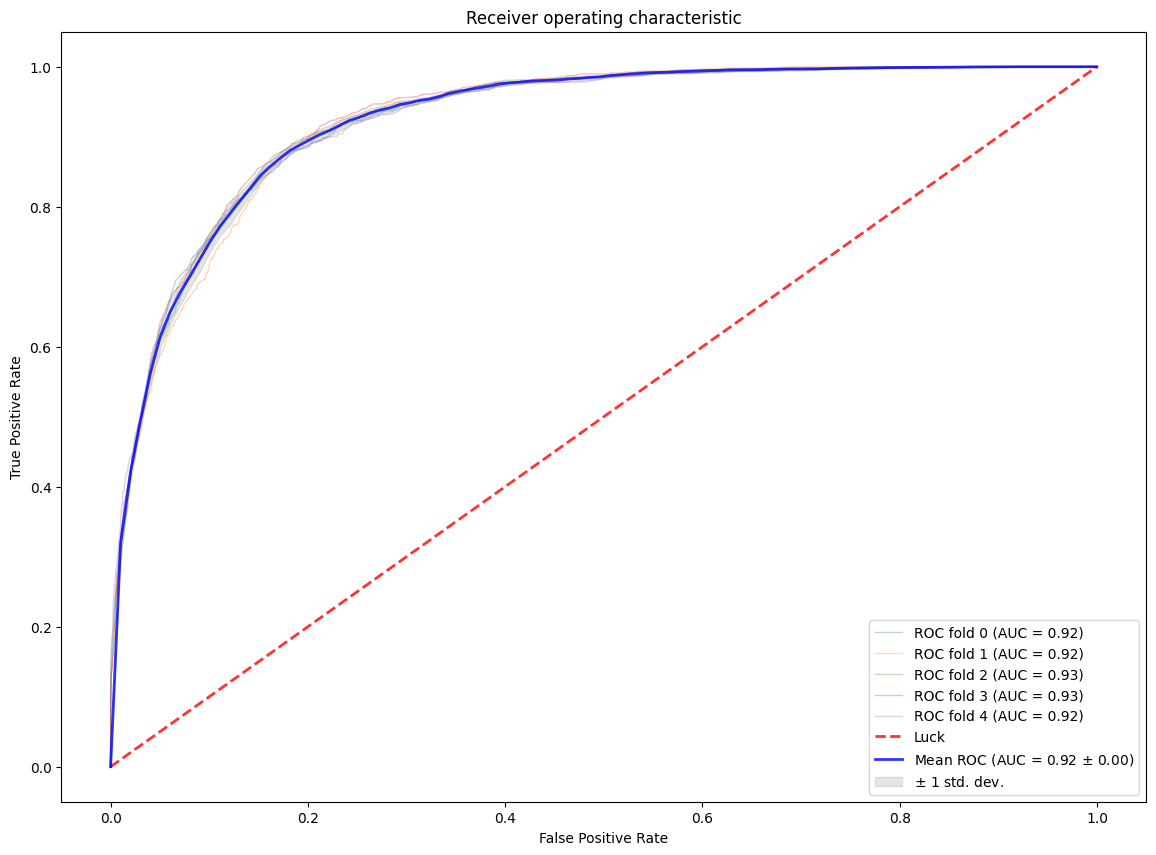

Accaracy list :  [0.879783393501805, 0.8758122743682311, 0.8758122743682311, 0.8768953068592058, 0.8801444043321299]
equal opportunity for tpr :  [0.019462721631582913, 0.0010194171564618104, 0.01783462119193535, 0.0007842024910943435, 0.00818414322250638]
equal opportunity for fpr :  [0.06768792291755185, 0.06612381514402686, 0.06275645510064617, 0.0687669164779528, 0.06694006942224931]
odds difference list :  [0.04357532227456738, 0.033571616150244336, 0.04029553814629076, 0.03477555948452357, 0.037562106322377845]
The mean accuracy is  0.878 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.009 ± 0.008
The mean equal opportunity for fpr: (close to 0) 0.066 ± 0.002
The mean odds difference: (close to 0) 0.038 ± 0.004
The mean parity difference: (close to 0) 0.597 ± 0.019
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 28
---------------------------------------------------------------------------------------------------
Trial Number: 120
Values (Obj

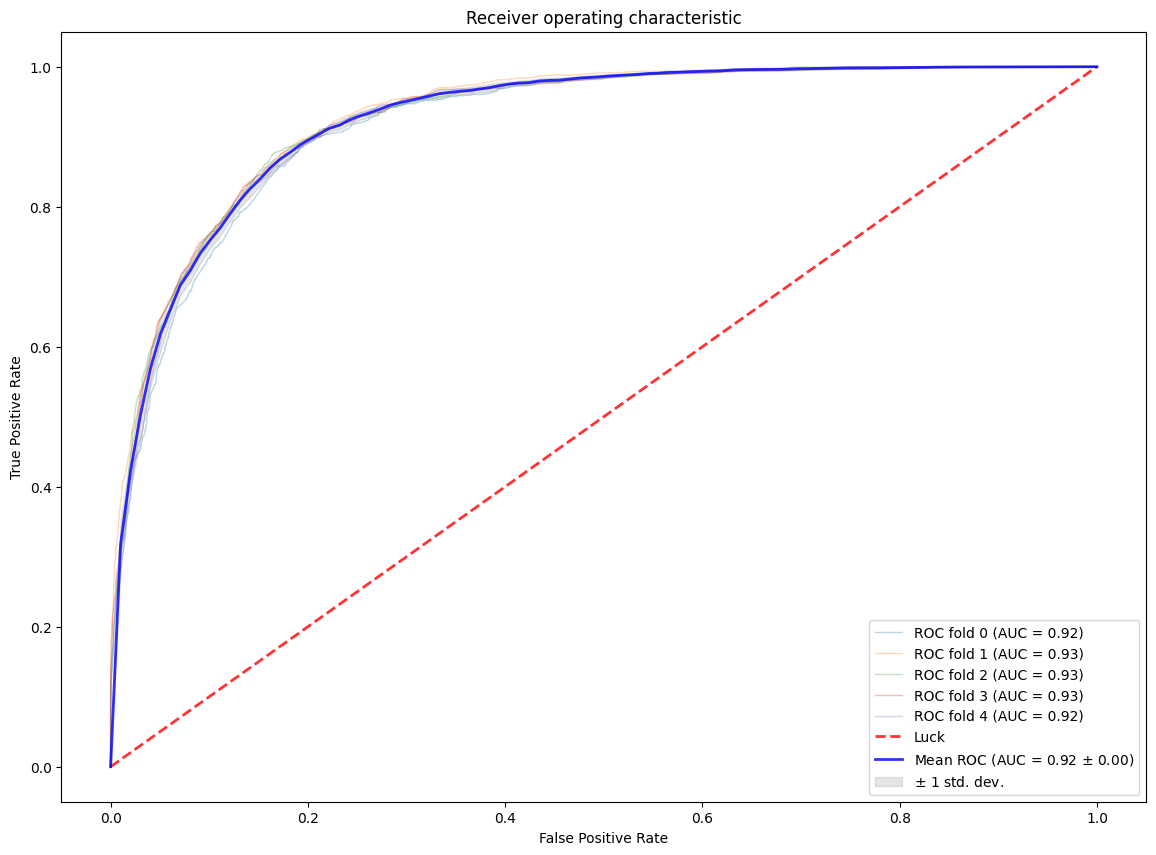

Accaracy list :  [0.8721126082771896, 0.8823387872954764, 0.8859480269489894, 0.8778873917228104, 0.8747593840230992]
equal opportunity for tpr :  [0.015449307488599073, 0.012644003908146684, 0.059080290672766766, 0.01605033934669431, 0.00575097043893702]
equal opportunity for fpr :  [0.07342190350473873, 0.06103457977249986, 0.07836164199517147, 0.058112894496298965, 0.0690491850890872]
odds difference list :  [0.0444356054966689, 0.03683929184032327, 0.06872096633396912, 0.03708161692149664, 0.03740007776401211]
The mean accuracy is  0.879 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.022 ± 0.019
The mean equal opportunity for fpr: (close to 0) 0.068 ± 0.008
The mean odds difference: (close to 0) 0.045 ± 0.012
The mean parity difference: (close to 0) 0.576 ± 0.023
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 120
---------------------------------------------------------------------------------------------------
Trial Number: 114
Values (Objec

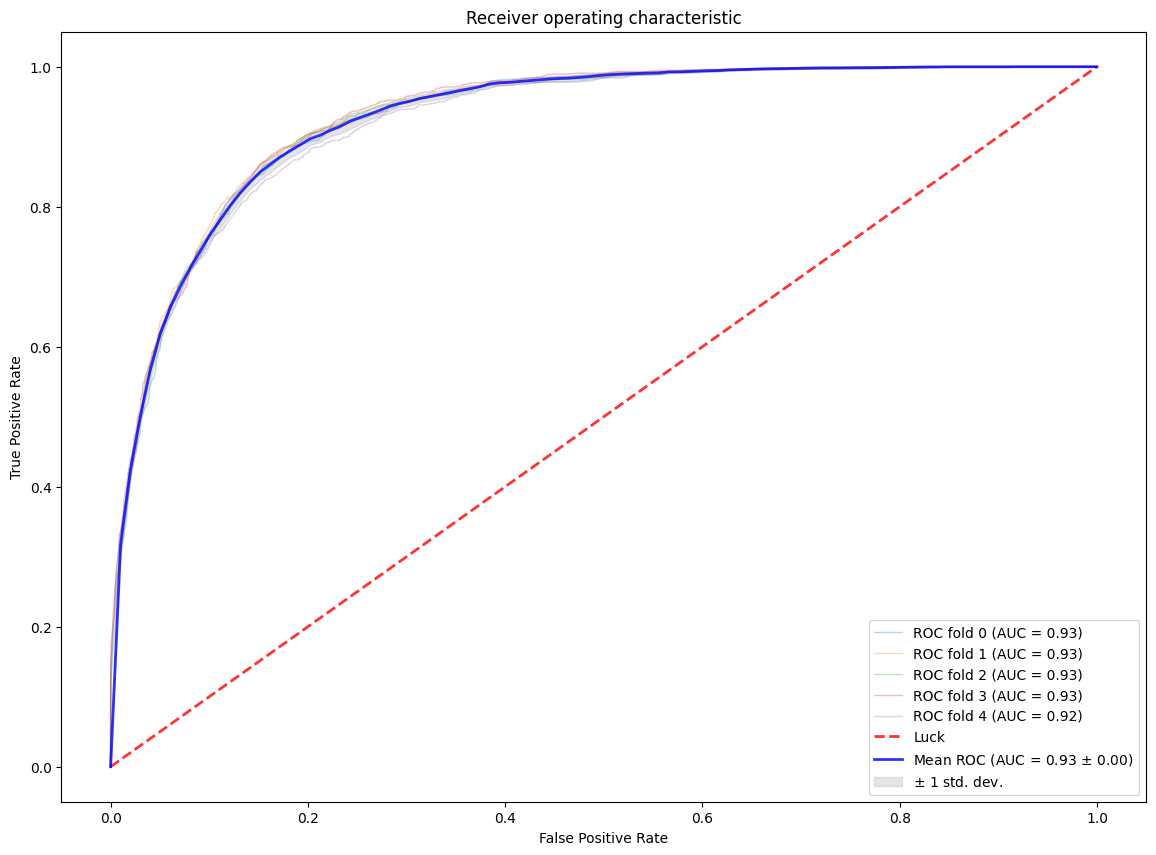

Accaracy list :  [0.8810444874274661, 0.8799564796905223, 0.8760730262362472, 0.8810301051867973, 0.8795792528110264]
equal opportunity for tpr :  [0.051176660781618144, 0.038996998476430234, 0.016996047430830052, 0.03784577734290551, 0.010345407971520726]
equal opportunity for fpr :  [0.06701632128626994, 0.0586619943450515, 0.06651760666660779, 0.06508656074101261, 0.056953453394832786]
odds difference list :  [0.05909649103394404, 0.04882949641074087, 0.04175682704871892, 0.05146616904195906, 0.03364943068317676]
The mean accuracy is  0.880 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.031 ± 0.015
The mean equal opportunity for fpr: (close to 0) 0.063 ± 0.004
The mean odds difference: (close to 0) 0.047 ± 0.009
The mean parity difference: (close to 0) 0.632 ± 0.020
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 114
---------------------------------------------------------------------------------------------------
Trial Number: 67
Values (Obje

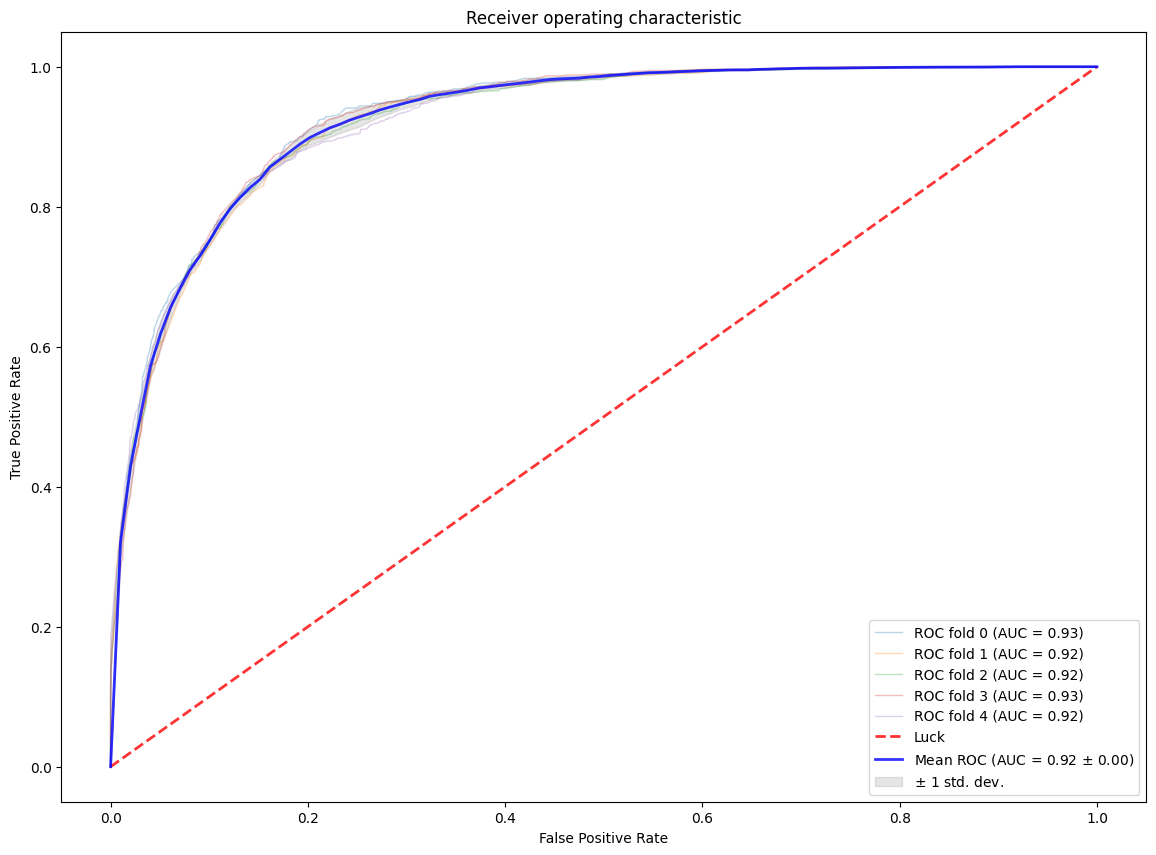

Accaracy list :  [0.8803511303511303, 0.8736171236171236, 0.8755261575466026, 0.8776909200240529, 0.8820204449789537]
equal opportunity for tpr :  [0.053429447852760714, 0.028043839390624326, 0.006201351152885892, 0.08075518035303142, 0.02029803956861509]
equal opportunity for fpr :  [0.055668029244820255, 0.06058960355425179, 0.072644737331993, 0.06821302273742524, 0.06223166934811107]
odds difference list :  [0.054548738548790485, 0.04431672147243806, 0.03942304424243945, 0.07448410154522833, 0.04126485445836308]
The mean accuracy is  0.878 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.038 ± 0.026
The mean equal opportunity for fpr: (close to 0) 0.064 ± 0.006
The mean odds difference: (close to 0) 0.051 ± 0.013
The mean parity difference: (close to 0) 0.560 ± 0.026
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 67
---------------------------------------------------------------------------------------------------
Trial Number: 33
Values (Object

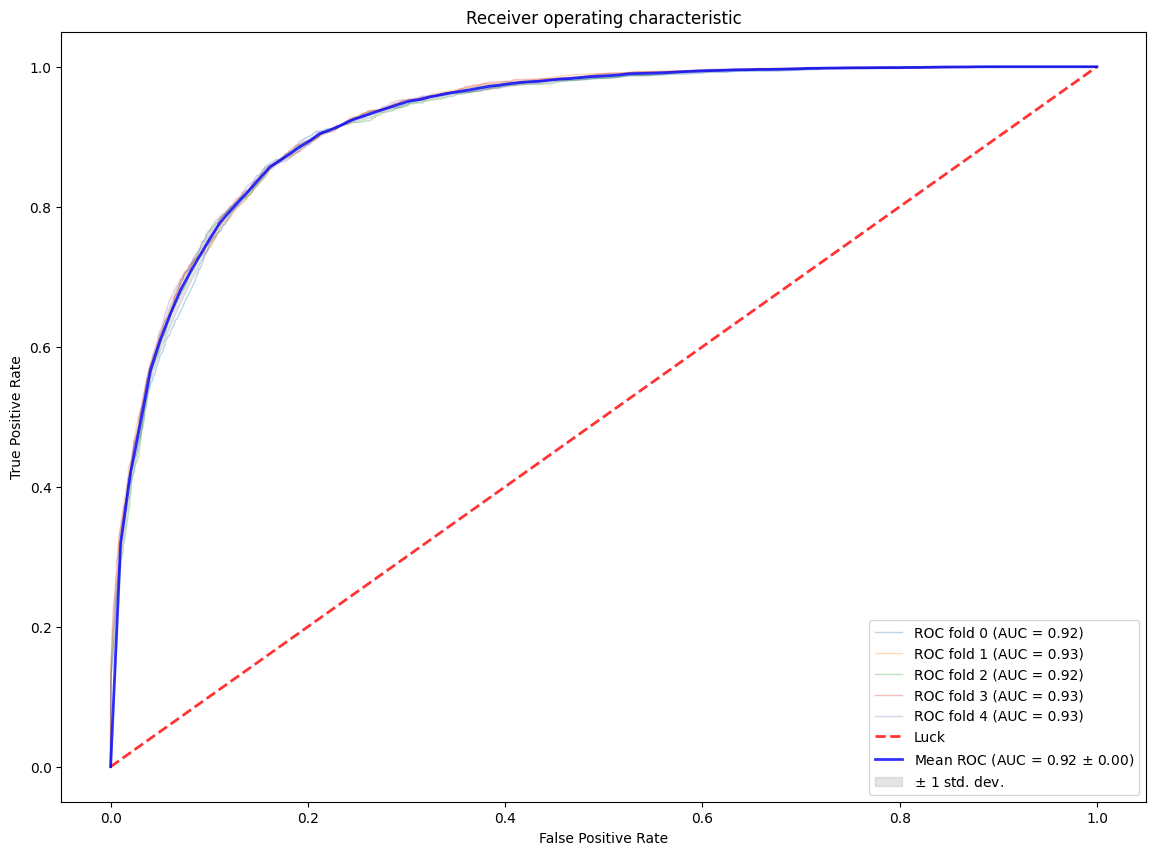

Accaracy list :  [0.874909354604786, 0.8821609862219, 0.8779161126556267, 0.8783996131995648, 0.8802127402393327]
equal opportunity for tpr :  [0.07076923076923075, 0.0368304692995679, 0.0006695851342864989, 0.027169316279150035, 0.1071373455089002]
equal opportunity for fpr :  [0.05916981449490604, 0.06606089575297559, 0.07024295762176311, 0.057677634475827466, 0.06693351735294355]
odds difference list :  [0.0649695226320684, 0.05144568252627175, 0.0354562713780248, 0.04242347537748875, 0.08703543143092188]
The mean accuracy is  0.879 ± 0.002
The mean equal opportunity for tpr: (close to 0) 0.049 ± 0.037
The mean equal opportunity for fpr: (close to 0) 0.064 ± 0.005
The mean odds difference: (close to 0) 0.056 ± 0.018
The mean parity difference: (close to 0) 0.639 ± 0.024
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 33
---------------------------------------------------------------------------------------------------
Trial Number: 69
Values (Objectives): 

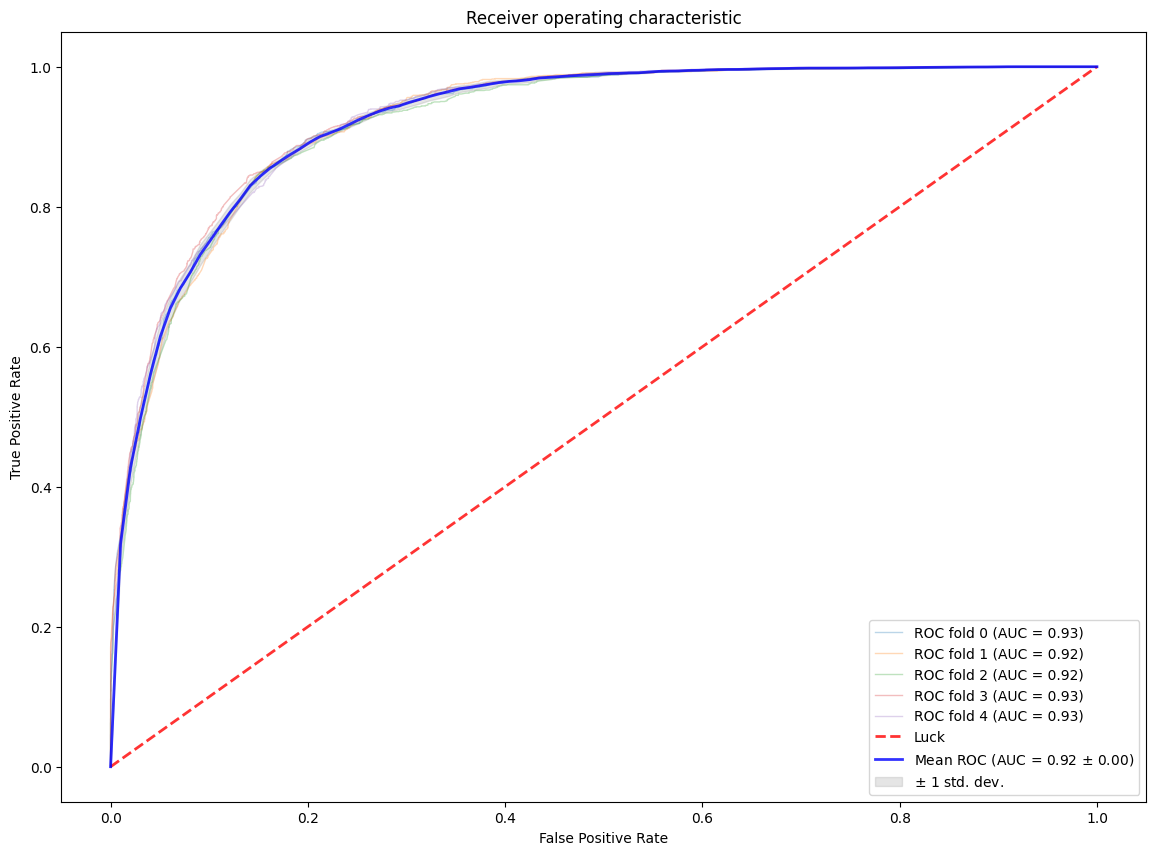

Accaracy list :  [0.8807818380478329, 0.875440087410465, 0.8760320543953375, 0.8818601262748907, 0.8862311801845556]
equal opportunity for tpr :  [0.14104053705138136, 0.10540540540540538, 0.033839403587792194, 0.04223615749009868, 0.0970834937293596]
equal opportunity for fpr :  [0.06635991511484148, 0.07203978159126365, 0.06330114899710132, 0.05958418715846995, 0.06421711659539082]
odds difference list :  [0.10370022608311141, 0.08872259349833451, 0.04857027629244676, 0.05091017232428431, 0.0806503051623752]
The mean accuracy is  0.880 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.084 ± 0.040
The mean equal opportunity for fpr: (close to 0) 0.065 ± 0.004
The mean odds difference: (close to 0) 0.075 ± 0.022
The mean parity difference: (close to 0) 0.685 ± 0.032
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 69
---------------------------------------------------------------------------------------------------
Trial Number: 32
Values (Objectives)

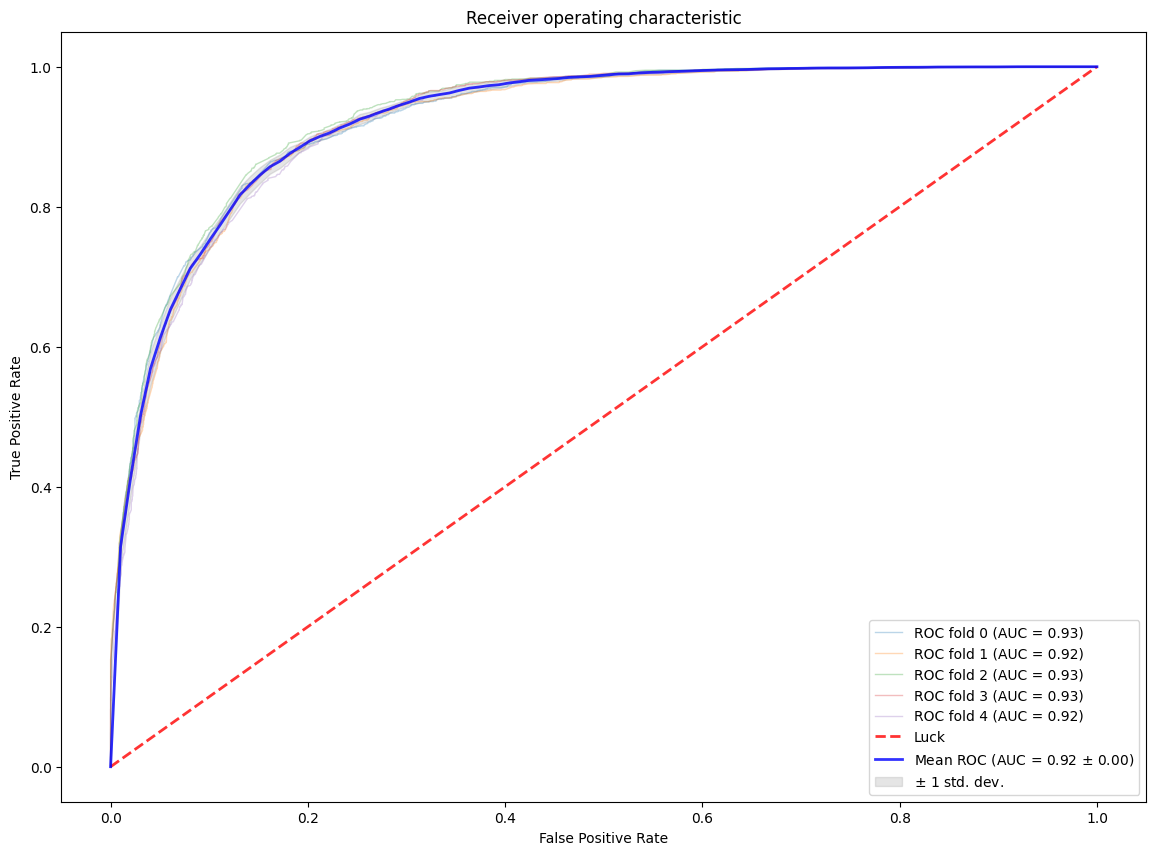

Accaracy list :  [0.8837124437416373, 0.8781170173944776, 0.8844282238442822, 0.8772506082725061, 0.8813868613138686]
equal opportunity for tpr :  [0.06992795044266614, 0.0861347649018882, 0.024605556988075428, 0.07089386036754453, 0.11224558864110884]
equal opportunity for fpr :  [0.05747013237774848, 0.07867167958782649, 0.058246051257872224, 0.0673583263515126, 0.0649879787035342]
odds difference list :  [0.06369904141020731, 0.08240322224485735, 0.04142580412297382, 0.06912609335952857, 0.08861678367232152]
The mean accuracy is  0.881 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.073 ± 0.029
The mean equal opportunity for fpr: (close to 0) 0.065 ± 0.008
The mean odds difference: (close to 0) 0.069 ± 0.016
The mean parity difference: (close to 0) 0.682 ± 0.029
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 32
---------------------------------------------------------------------------------------------------
Trial Number: 149
Values (Objective

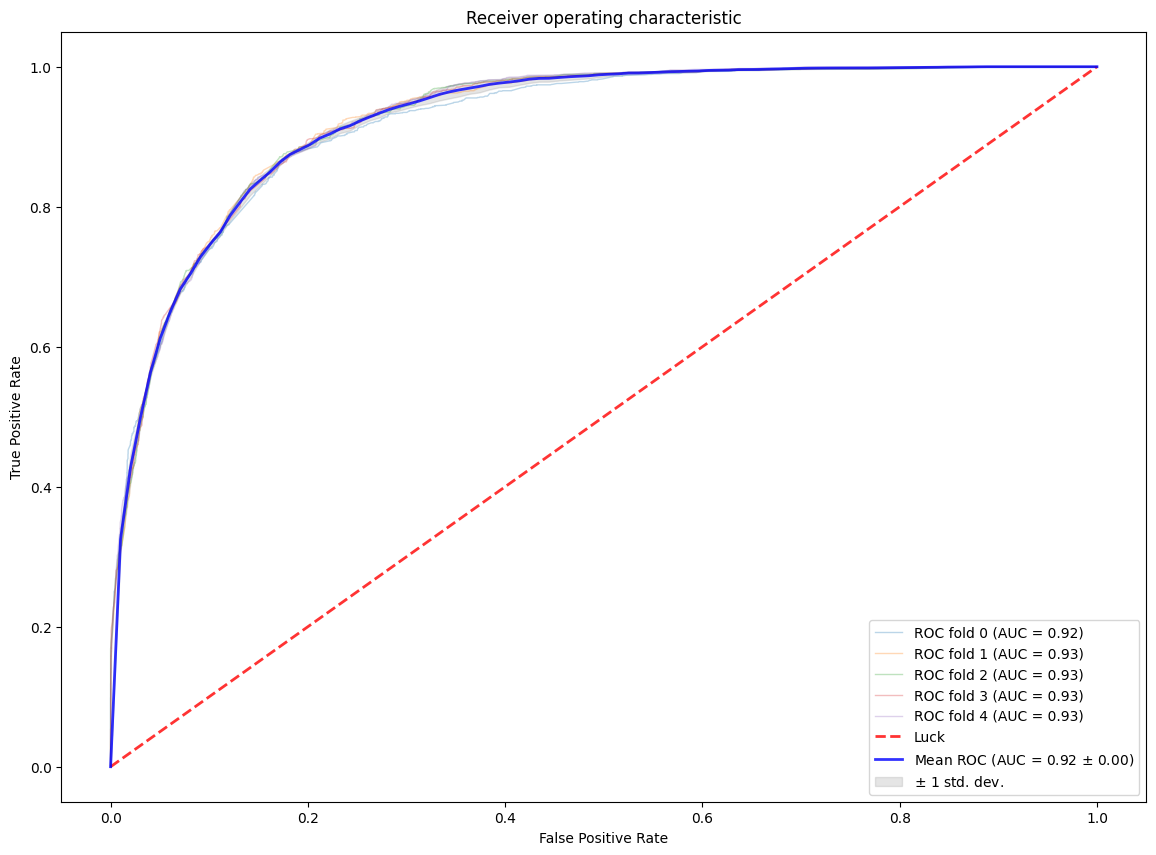

Accaracy list :  [0.8834086192162129, 0.8831644487852521, 0.8804639804639804, 0.8805860805860806, 0.8807081807081807]
equal opportunity for tpr :  [0.14460396183183966, 0.1366991704423578, 0.11544940888829253, 0.14527969826614312, 0.18165951385837126]
equal opportunity for fpr :  [0.05841703758117297, 0.059152735713360965, 0.07129112111802895, 0.06614514537600255, 0.055045759887308816]
odds difference list :  [0.10151049970650632, 0.09792595307785938, 0.09337026500316073, 0.10571242182107284, 0.11835263687284003]
The mean accuracy is  0.882 ± 0.001
The mean equal opportunity for tpr: (close to 0) 0.145 ± 0.021
The mean equal opportunity for fpr: (close to 0) 0.062 ± 0.006
The mean odds difference: (close to 0) 0.103 ± 0.009
The mean parity difference: (close to 0) 0.748 ± 0.017
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 149
---------------------------------------------------------------------------------------------------
Trial Number: 162
Values (Object

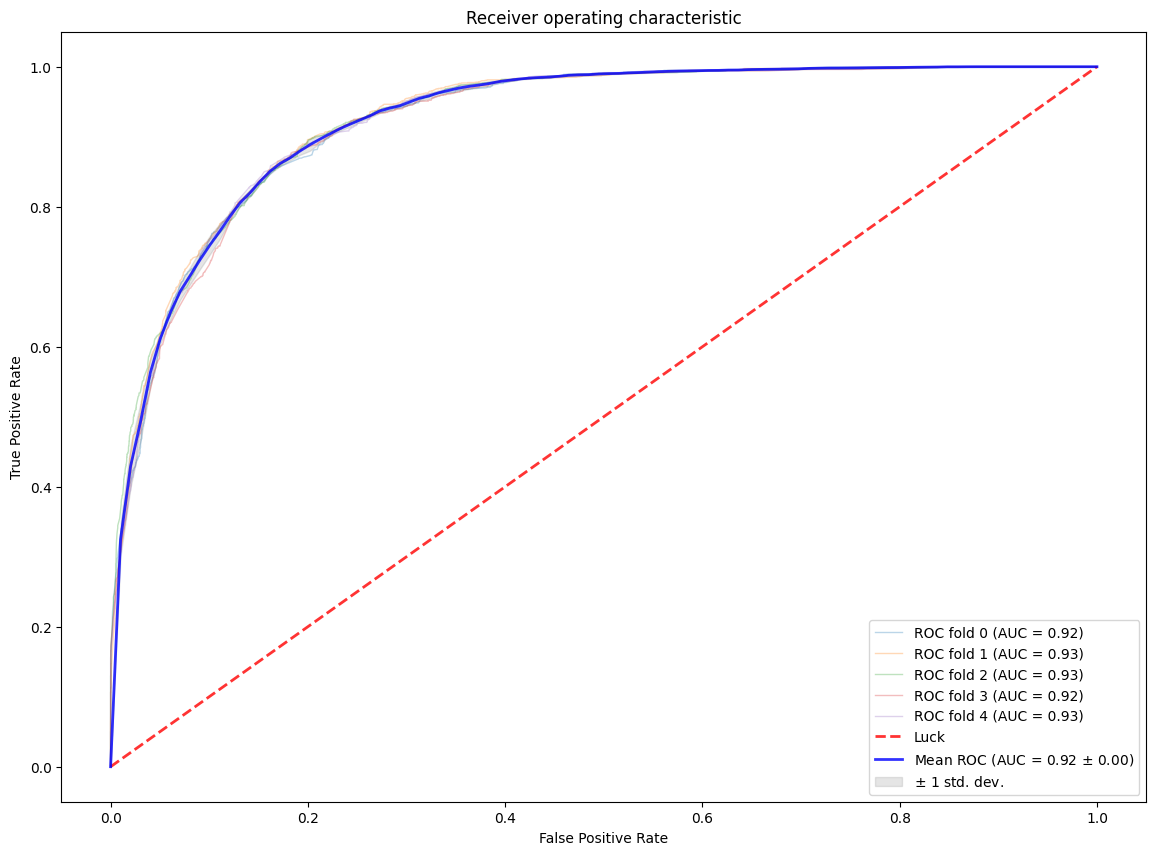

Accaracy list :  [0.8768062698995837, 0.8825618417830027, 0.8864666258420085, 0.8785058175137783, 0.8782608695652174]
equal opportunity for tpr :  [0.1452012383900929, 0.17067852980471304, 0.11951580570547415, 0.19134012905639208, 0.11858611555202869]
equal opportunity for fpr :  [0.0662679573167318, 0.0559875145270991, 0.047826262513316994, 0.06778397102289355, 0.05952228101355354]
odds difference list :  [0.10573459785341235, 0.11333302216590607, 0.08367103410939558, 0.12956205003964283, 0.08905419828279111]
The mean accuracy is  0.881 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.149 ± 0.029
The mean equal opportunity for fpr: (close to 0) 0.059 ± 0.007
The mean odds difference: (close to 0) 0.104 ± 0.017
The mean parity difference: (close to 0) 0.751 ± 0.010
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 162
---------------------------------------------------------------------------------------------------
Trial Number: 92
Values (Objectives

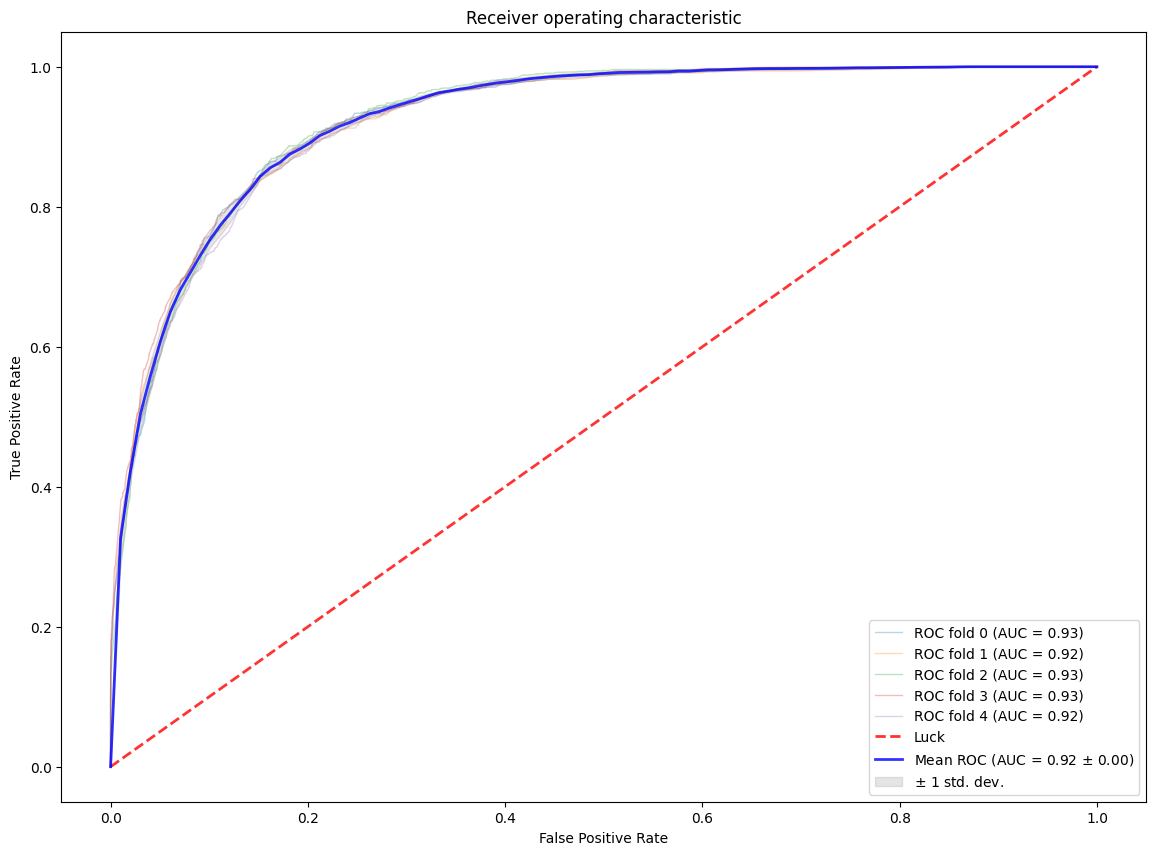

Accaracy list :  [0.8785758133824432, 0.8860650705954574, 0.881890730509515, 0.8856827111984283, 0.881139489194499]
equal opportunity for tpr :  [0.15246658103800964, 0.19076065053756447, 0.16963336493980397, 0.07425057428624421, 0.17252842895258752]
equal opportunity for fpr :  [0.06946020804481606, 0.05695808159997634, 0.07351329906407102, 0.048294389528062726, 0.0682291945053183]
odds difference list :  [0.11096339454141285, 0.1238593660687704, 0.12157333200193748, 0.06127248190715347, 0.1203788117289529]
The mean accuracy is  0.883 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.152 ± 0.041
The mean equal opportunity for fpr: (close to 0) 0.063 ± 0.009
The mean odds difference: (close to 0) 0.108 ± 0.024
The mean parity difference: (close to 0) 0.785 ± 0.021
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 92
---------------------------------------------------------------------------------------------------
Trial Number: 130
Values (Objectives):

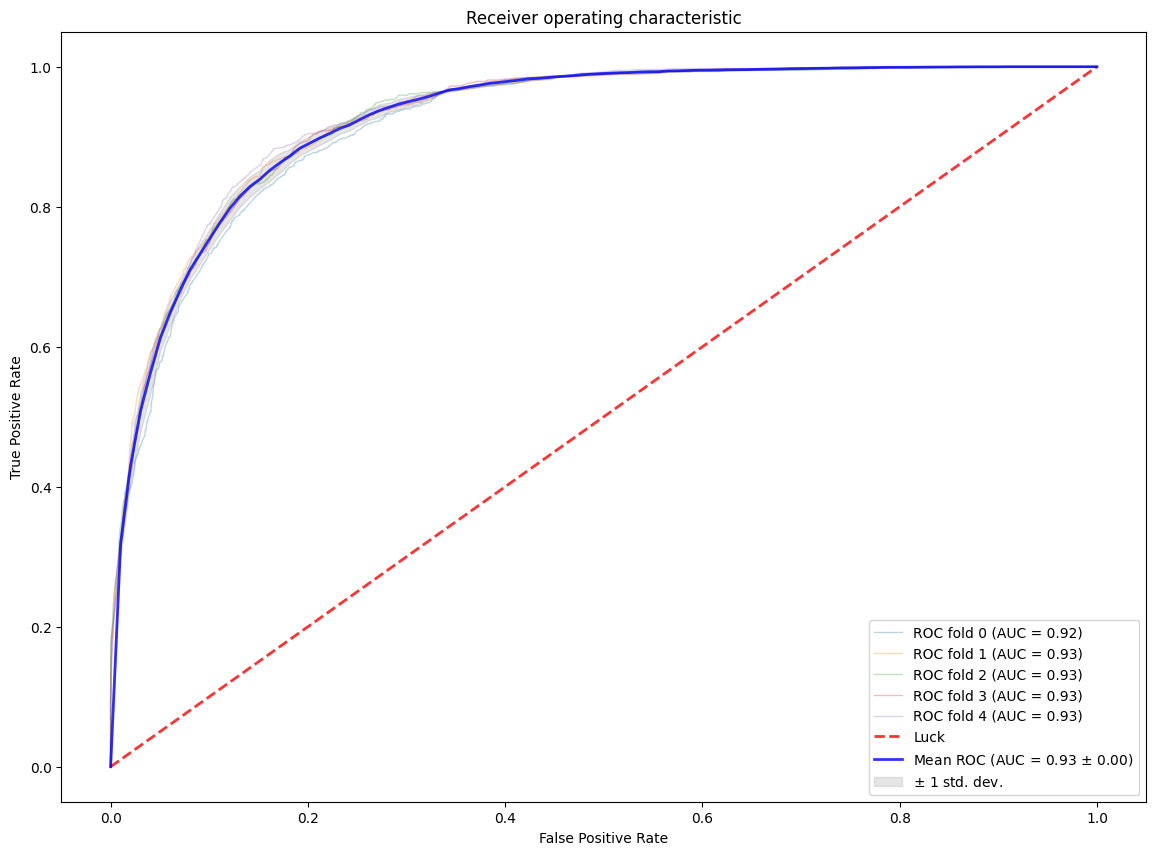

Accaracy list :  [0.8751378507535841, 0.8906996691581914, 0.8846955030020831, 0.8834701629702242, 0.8850490196078431]
equal opportunity for tpr :  [0.11037943785634913, 0.19424345420550349, 0.15591114854195176, 0.1950925684987616, 0.2098940252146903]
equal opportunity for fpr :  [0.06959387420621171, 0.05905697679911471, 0.06029708606730018, 0.06234969344048352, 0.05145362423956902]
odds difference list :  [0.08998665603128042, 0.1266502155023091, 0.10810411730462596, 0.12872113096962257, 0.13067382472712966]
The mean accuracy is  0.884 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.173 ± 0.036
The mean equal opportunity for fpr: (close to 0) 0.061 ± 0.006
The mean odds difference: (close to 0) 0.117 ± 0.016
The mean parity difference: (close to 0) 0.777 ± 0.026
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 130
---------------------------------------------------------------------------------------------------
Trial Number: 51
Values (Objectives)

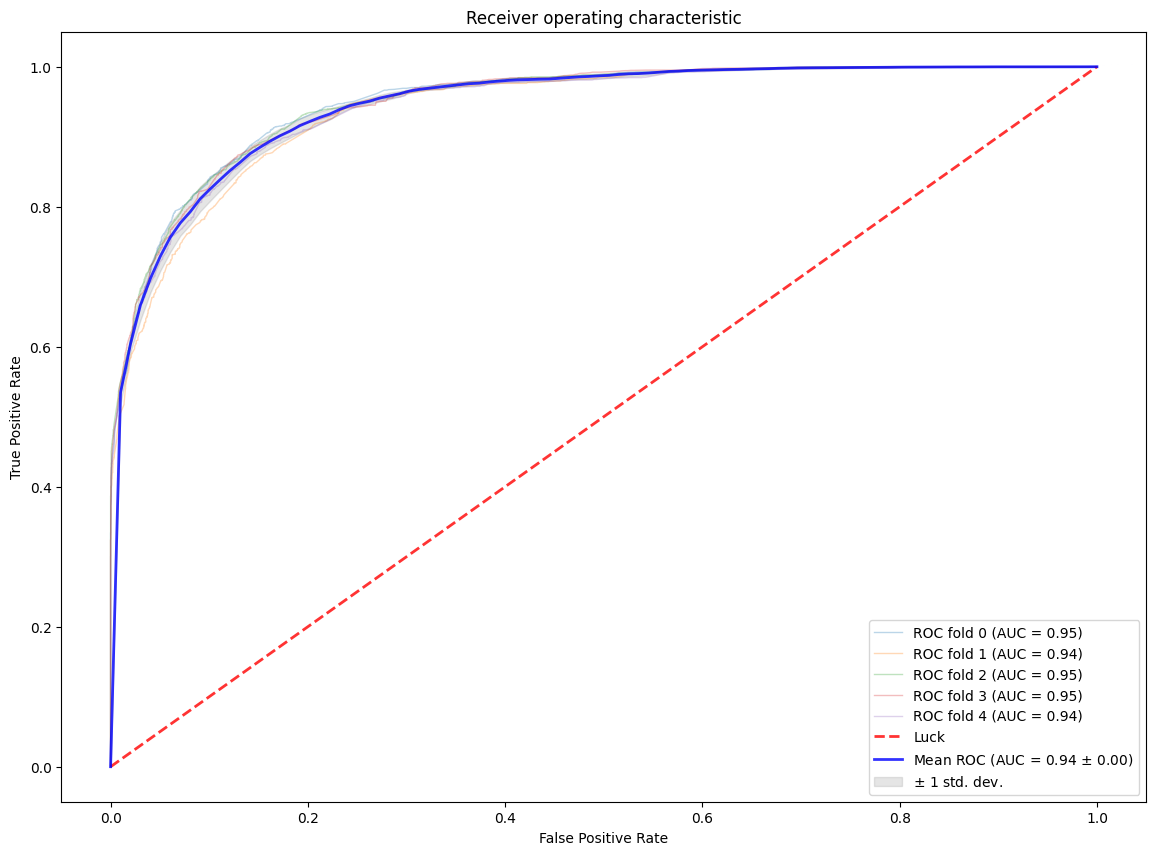

Accaracy list :  [0.8865460772771059, 0.8747725569945414, 0.8893289093438939, 0.8886867173284813, 0.8820507331692176]
equal opportunity for tpr :  [0.3373456790123457, 0.3863927239662437, 0.31838789259992706, 0.3216775134250862, 0.374402072814244]
equal opportunity for fpr :  [0.07143700124160243, 0.07137838301154001, 0.07617037942305065, 0.0840737006474838, 0.07559506628274537]
odds difference list :  [0.20439134012697407, 0.22888555348889184, 0.19727913601148886, 0.20287560703628502, 0.22499856954849468]
The mean accuracy is  0.884 ± 0.005
The mean equal opportunity for tpr: (close to 0) 0.348 ± 0.028
The mean equal opportunity for fpr: (close to 0) 0.076 ± 0.005
The mean odds difference: (close to 0) 0.212 ± 0.013
The mean parity difference: (close to 0) 0.165 ± 0.020
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 51
---------------------------------------------------------------------------------------------------
Trial Number: 35
Values (Objectives): [0

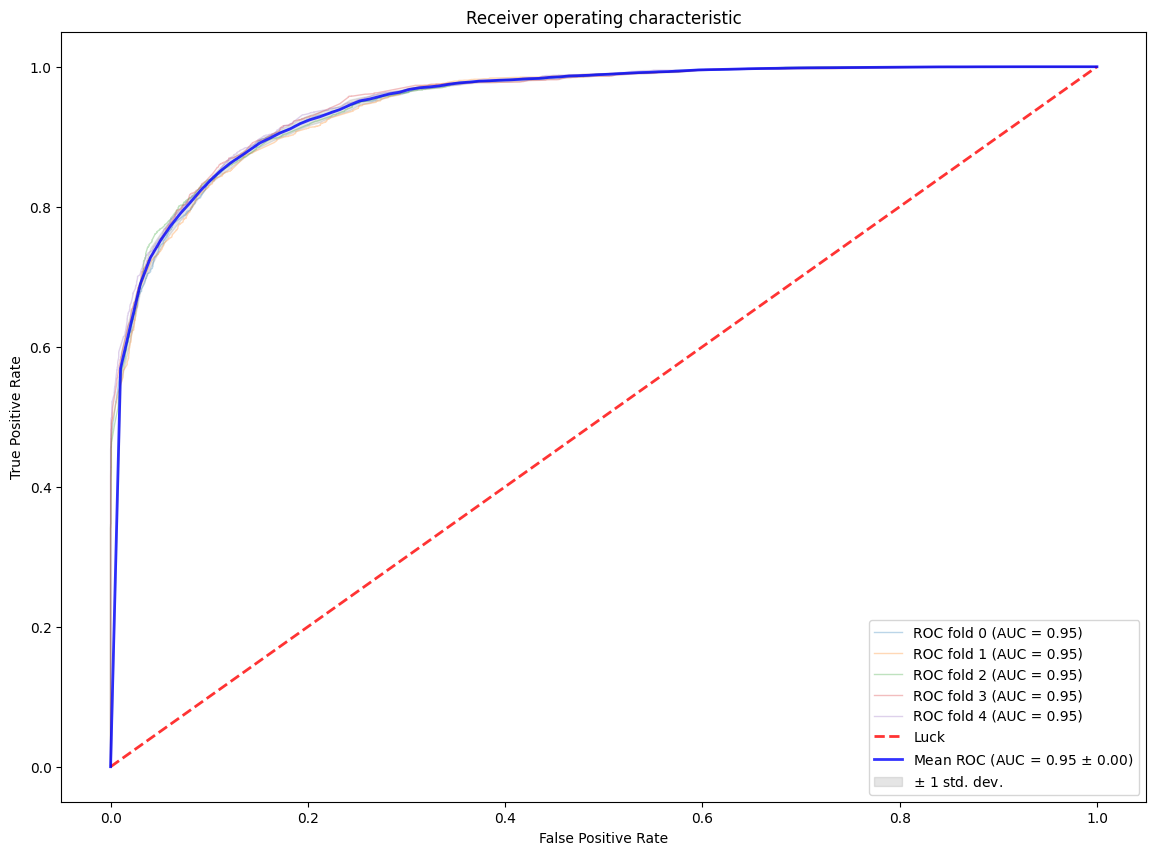

Accaracy list :  [0.8828263823560155, 0.8823037524824919, 0.8853230190257161, 0.8867865356470834, 0.889190884382187]
equal opportunity for tpr :  [0.37789571223991236, 0.33853360194411575, 0.3983126525009254, 0.41028672357210144, 0.3187177821331456]
equal opportunity for fpr :  [0.07689713577970862, 0.09203668284019263, 0.05631678295749486, 0.06629593887323008, 0.1049868023311526]
odds difference list :  [0.2273964240098105, 0.21528514239215418, 0.22731471772921014, 0.23829133122266577, 0.2118522922321491]
The mean accuracy is  0.885 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.369 ± 0.035
The mean equal opportunity for fpr: (close to 0) 0.079 ± 0.017
The mean odds difference: (close to 0) 0.224 ± 0.009
The mean parity difference: (close to 0) 0.266 ± 0.048
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 35
---------------------------------------------------------------------------------------------------
Trial Number: 142
Values (Objectives): [

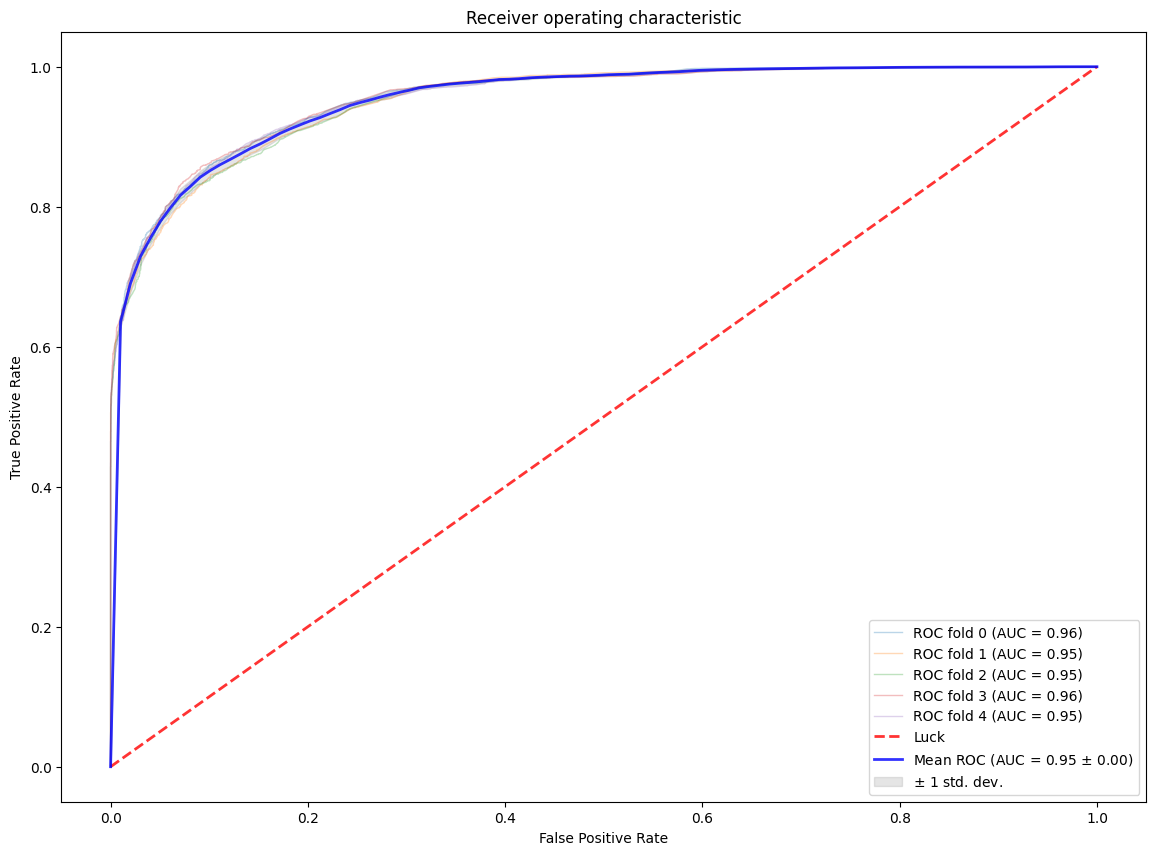

Accaracy list :  [0.8881200766446669, 0.8776748642606196, 0.8848078356222719, 0.8866176940274673, 0.8873629298413712]
equal opportunity for tpr :  [0.43098038970215935, 0.47379688961755345, 0.437854064683486, 0.4222788554035234, 0.4020038504297839]
equal opportunity for fpr :  [0.04653764618653164, 0.06026736795967565, 0.05686463036248444, 0.06401115373475402, 0.0536213180779353]
odds difference list :  [0.2387590179443455, 0.26703212878861454, 0.24735934752298522, 0.2431450045691387, 0.2278125842538596]
The mean accuracy is  0.885 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.433 ± 0.024
The mean equal opportunity for fpr: (close to 0) 0.056 ± 0.006
The mean odds difference: (close to 0) 0.245 ± 0.013
The mean parity difference: (close to 0) 0.436 ± 0.015
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 142
---------------------------------------------------------------------------------------------------
Trial Number: 24
Values (Objectives): [0.

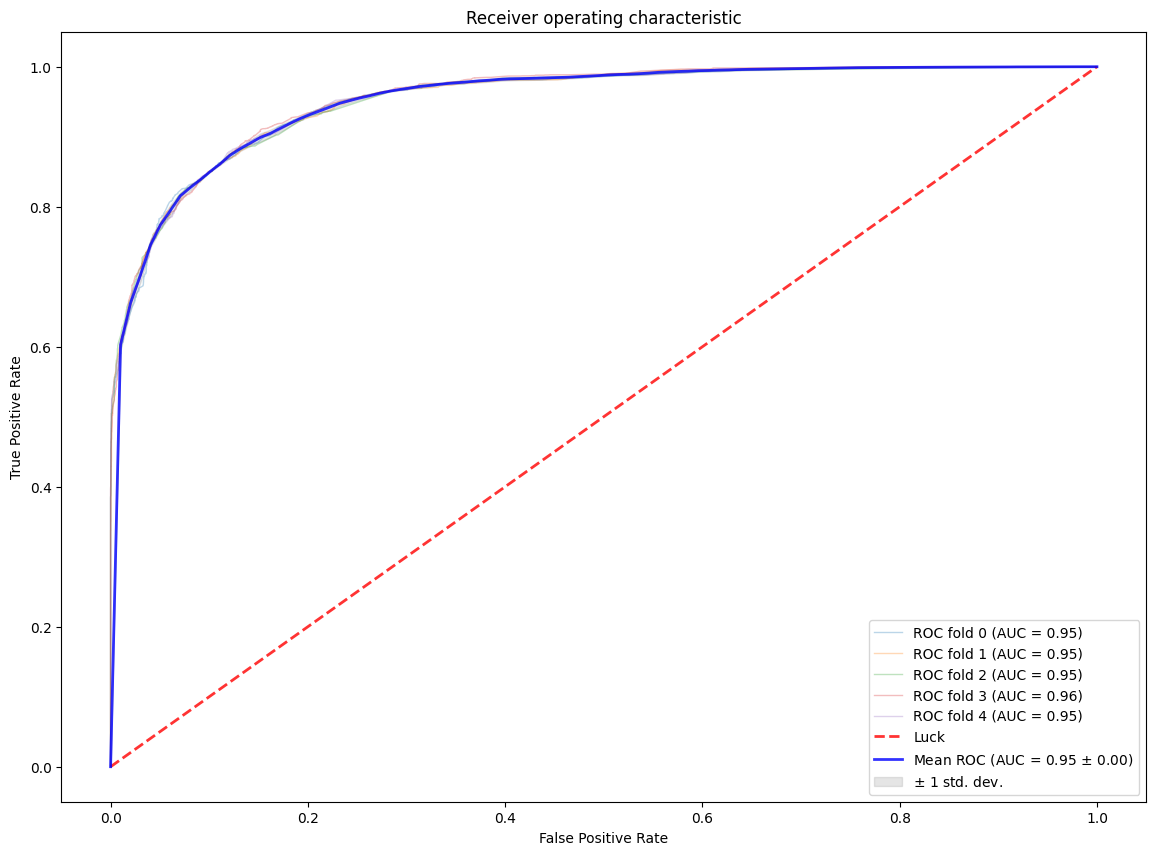

Accaracy list :  [0.8917823487688722, 0.8908704022697335, 0.8891478366602492, 0.8903637653257676, 0.8892491640490424]
equal opportunity for tpr :  [0.3960167890703312, 0.41463804532587, 0.40435418600632533, 0.37551221546828306, 0.4310383084252431]
equal opportunity for fpr :  [0.06678410990079059, 0.057076112790429526, 0.08367227025631363, 0.07053615545180449, 0.07245943220030043]
odds difference list :  [0.2314004494855609, 0.23585707905814976, 0.24401322813131948, 0.22302418546004377, 0.25174887031277177]
The mean accuracy is  0.890 ± 0.001
The mean equal opportunity for tpr: (close to 0) 0.404 ± 0.019
The mean equal opportunity for fpr: (close to 0) 0.070 ± 0.009
The mean odds difference: (close to 0) 0.237 ± 0.010
The mean parity difference: (close to 0) 0.347 ± 0.022
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 24
---------------------------------------------------------------------------------------------------
Trial Number: 156
Values (Objectives): 

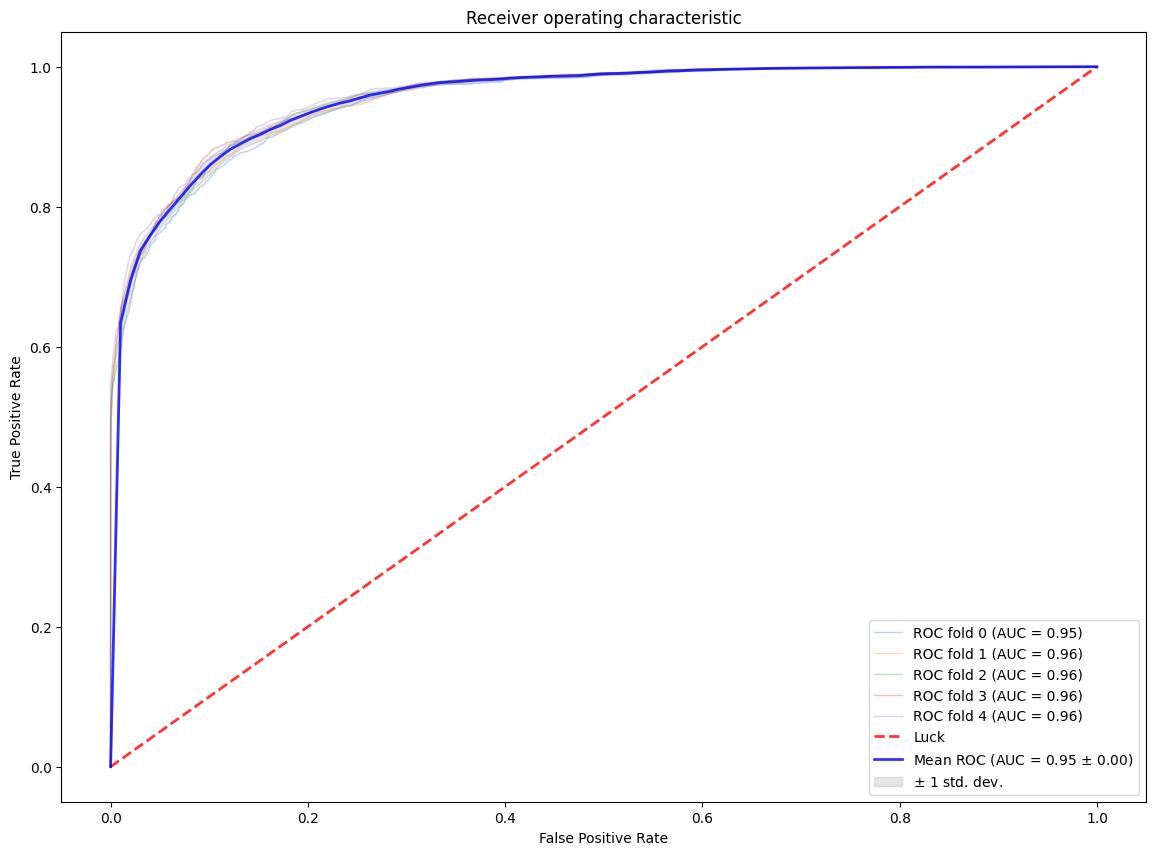

Accaracy list :  [0.8836342229199372, 0.8897174254317112, 0.8892268445839875, 0.8924646781789639, 0.8948091453243058]
equal opportunity for tpr :  [0.4028987290617273, 0.4366795185829743, 0.3877134249795162, 0.41086569014957763, 0.4026885565441759]
equal opportunity for fpr :  [0.09656133860203736, 0.056393264828659806, 0.08681429467922748, 0.06766812514984416, 0.08386577937427975]
odds difference list :  [0.24973003383188233, 0.24653639170581707, 0.23726385982937184, 0.2392669076497109, 0.24327716795922782]
The mean accuracy is  0.890 ± 0.004
The mean equal opportunity for tpr: (close to 0) 0.408 ± 0.016
The mean equal opportunity for fpr: (close to 0) 0.078 ± 0.014
The mean odds difference: (close to 0) 0.243 ± 0.005
The mean parity difference: (close to 0) 0.404 ± 0.032
The mean disperate impact: (close to 1) 1.000 ± 0.000
End Of Trial Number: 156
---------------------------------------------------------------------------------------------------


In [39]:
# Record the end time
end_time = time.time()
# Calculate the elapsed time in minutes
elapsed_time_minutes = (end_time - start_time) / 60

pareto_front_trials = study.best_trials
pareto_front_trials = sorted(pareto_front_trials, key=lambda trial: trial.values[0])


trail_list = []
fairness_values_list = []

acc_values_list = []
growth_list = []

# Process each trial in the Pareto front
for trial in pareto_front_trials:
   trail_list.append(trial.number)
   fairness_values_list.append(trial.values[0])
   acc_values_list.append(trial.values[1])

   lambda1 = trial.params['lambda_0']
   lambda2 = trial.params['lambda_1']
   upsampled_df = Upsampling_Dataset(lambda1,lambda2)
   growth_list.append((len(upsampled_df) - len(orig_data))/ len(orig_data) * 100 )

   print("Trial Number:", trial.number)
   print("Values (Objectives):", trial.values)
   print("Parameters:", trial.params)
   print("Dataset Growth Percent :", (len(upsampled_df) - len(orig_data))/ len(orig_data) * 100)
   print('---------------------------------------------------------------------------------------------------')
   y_debias = upsampled_df[TARGET_COL]
   upsampled_df_features = upsampled_df.loc[:, feature_columns]
   upsampled_acc ,upsampled_op_diff, upsampled_op_diff_fpr, upsampled_od_diff, upsampled_par_diff , upsampled_dis_impact  = fairness_metrics_roc_auc_std(upsampled_df_features, y_debias )

   print("End Of Trial Number:", trial.number)
   print('---------------------------------------------------------------------------------------------------')




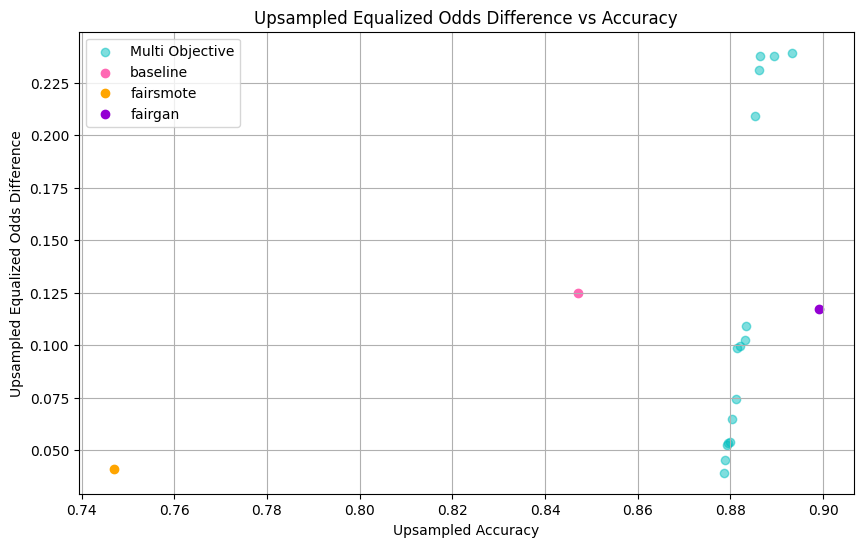

In [34]:
import matplotlib.pyplot as plt

# Plot upsampled_op_diff against upsampled_acc
plt.figure(figsize=(10, 6))
plt.scatter(acc_values_list,fairness_values_list, alpha=0.5,color = 'c', label = 'Multi Objective')

# Add the three additional points
plt.scatter(0.847, 0.125, color='hotpink', label='baseline')  # Baseline point
plt.scatter(0.747, 0.041, color='orange', label='fairsmote')  # Fairsmote point
plt.scatter(0.899, 0.117, color='darkviolet', label='fairgan')  # Fairgan point

plt.xlabel('Upsampled Accuracy')
plt.ylabel('Upsampled Equalized Odds Difference')
plt.title('Upsampled Equalized Odds Difference vs Accuracy')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()

conf matrix:
  [[4335  196]
 [ 718  784]] 
accuracy:  0.848499917122493 precision:  0.8 recall:  0.521970705725699 fpr:  0.043257559037740013 tpr:  0.521970705725699 fn+fp 914
conf matrix:
  [[1710   19]
 [ 134   95]] 
accuracy:  0.9218590398365679 precision:  0.8333333333333334 recall:  0.4148471615720524 fpr:  0.01098901098901099 tpr:  0.4148471615720524 fn+fp 153
conf matrix:
  [[2625  177]
 [ 584  689]] 
accuracy:  0.8132515337423313 precision:  0.7956120092378753 recall:  0.5412411626080126 fpr:  0.06316916488222699 tpr:  0.5412411626080126 fn+fp 761
conf matrix:
  [[4322  209]
 [ 763  739]] 
accuracy:  0.8388861263053208 precision:  0.7795358649789029 recall:  0.49201065246338216 fpr:  0.04612668285146767 tpr:  0.49201065246338216 fn+fp 972
conf matrix:
  [[1712   20]
 [ 142   68]] 
accuracy:  0.9165808444902163 precision:  0.7727272727272727 recall:  0.3238095238095238 fpr:  0.011547344110854504 tpr:  0.3238095238095238 fn+fp 162
conf matrix:
  [[2610  189]
 [ 621  671]] 
accura

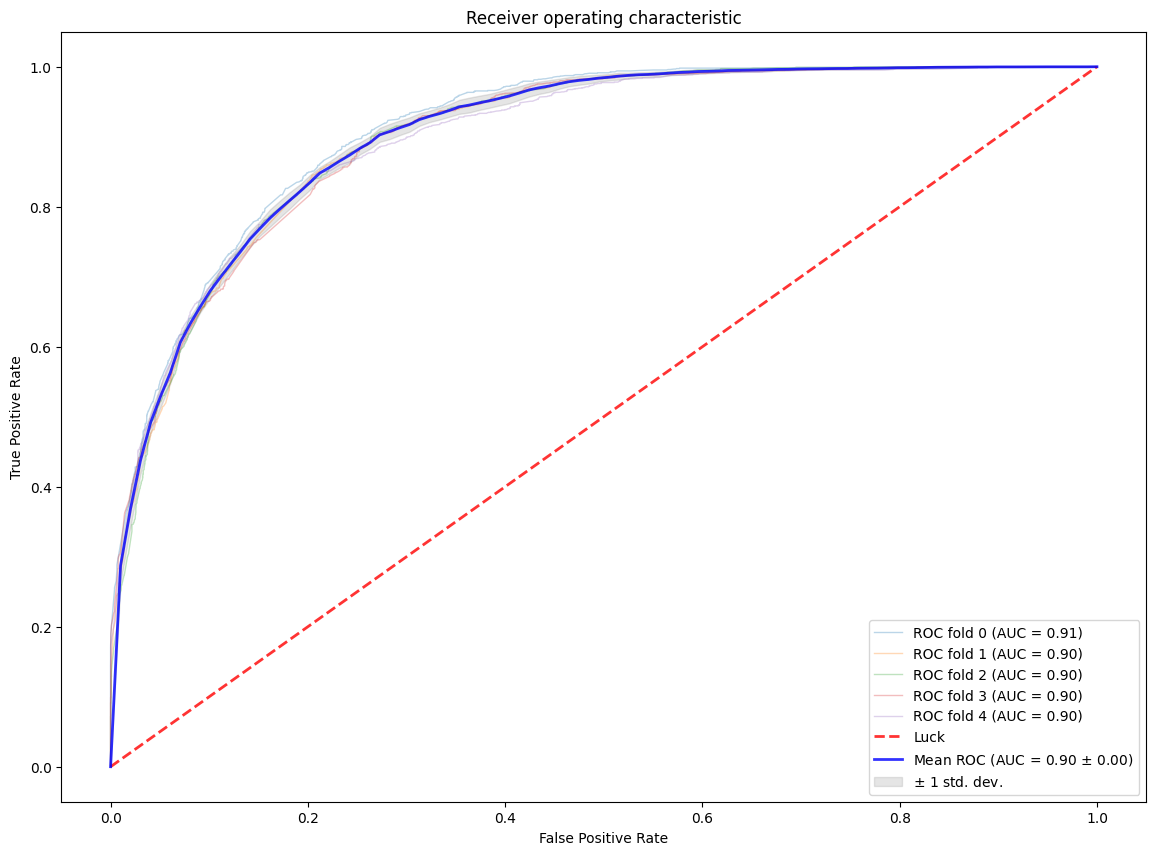

Accaracy list :  [0.848499917122493, 0.8388861263053208, 0.8420092838196287, 0.8446618037135278, 0.8444960212201591]
equal opportunity for tpr :  [0.12639400103596016, 0.19554032139171457, 0.1431478530513804, 0.09449612791121725, 0.09110068077864059]
equal opportunity for fpr :  [0.052180153893215994, 0.05597677164477251, 0.05420928658674141, 0.06033013214010466, 0.03765821608219208]
odds difference list :  [0.08928707746458808, 0.12575854651824353, 0.0986785698190609, 0.07741313002566096, 0.06437944843041633]
The mean accuracy is  0.844 ± 0.003
The mean equal opportunity for tpr: (close to 0) 0.130 ± 0.038
The mean equal opportunity for fpr: (close to 0) 0.052 ± 0.008
The mean odds difference: (close to 0) 0.091 ± 0.021
The mean parity difference: (close to 0) 0.773 ± 0.025
The mean disperate impact: (close to 1) 1.000 ± 0.000


In [35]:
orig_acc ,orig_op_diff, orig_op_diff_fpr, orig_od_diff, orig_par_diff , orig_dis_impact  = fairness_metrics_roc_auc(orig_data_encoded, y_orig )

In [36]:
print('Running time is: ',elapsed_time_minutes)

Running time is:  11.022199396292368
